Capstone Project 2:
Predicting Book Success:
Objective: Predict whether a book will be a bestseller based on features like genre, author, number of pages, and publication year.
Techniques: Logistic Regression, Random Forest, K-Nearest Neighbors.
Tools: Python, Scikit-Learn, Pandas, Seaborn/Matplotlib.
Dataset: Dataset can be created from book databases or Publicly available datasets (e.g., UCI, Kaggle).
General Project Execution Steps:
Data Collection: Source or create the dataset needed for the project.
Data Preprocessing: Clean, transform, and prepare the data for modeling.
EDA: Analyze the data to understand distributions and relationships.
Model Development: Train machine learning models to predict the target variable.
Model Evaluation: Use appropriate metrics to evaluate the performance of your model.
Optimization: Fine-tune the model through hyperparameter tuning.
API: Pickle the model file and Create user testing API using any web framework for demonstration

In [1]:
import numpy as np

In [55]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('books.csv',on_bad_lines='skip')

In [7]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [10]:
df['authors'] = df['authors'].apply(lambda x: x.split('/'))

In [11]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,"[J.K. Rowling, Mary GrandPré]",4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,"[J.K. Rowling, Mary GrandPré]",4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,[J.K. Rowling],4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"[J.K. Rowling, Mary GrandPré]",4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,"[J.K. Rowling, Mary GrandPré]",4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [20]:
df=df.drop('title',axis=1)

In [21]:
df.head()

,bookID,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,"[J.K. Rowling, Mary GrandPré]",4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,"[J.K. Rowling, Mary GrandPré]",4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,[J.K. Rowling],4.42,eng,352,6333,244,11/1/2003,Scholastic
3,5,"[J.K. Rowling, Mary GrandPré]",4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,"[J.K. Rowling, Mary GrandPré]",4.78,eng,2690,41428,164,9/13/2004,Scholastic


In [24]:
df=df.drop('bookID',axis=1)

In [25]:
df.head()

,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,"[J.K. Rowling, Mary GrandPré]",4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,"[J.K. Rowling, Mary GrandPré]",4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,[J.K. Rowling],4.42,eng,352,6333,244,11/1/2003,Scholastic
3,"[J.K. Rowling, Mary GrandPré]",4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,"[J.K. Rowling, Mary GrandPré]",4.78,eng,2690,41428,164,9/13/2004,Scholastic


In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder_authors = LabelEncoder()
label_encoder_language_code = LabelEncoder()
label_encoder_publisher = LabelEncoder()


In [27]:
df['authors_encoded'] = label_encoder_authors.fit_transform(df['authors'].astype(str))
df['language_code_encoded'] = label_encoder_language_code.fit_transform(df['language_code'].astype(str))
df['publisher_encoded'] = label_encoder_publisher.fit_transform(df['publisher'].astype(str))


In [28]:
df.head()

,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,authors_encoded,language_code_encoded,publisher_encoded
0,"[J.K. Rowling, Mary GrandPré]",4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2666,5,1778
1,"[J.K. Rowling, Mary GrandPré]",4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2666,5,1778
2,[J.K. Rowling],4.42,eng,352,6333,244,11/1/2003,Scholastic,2670,5,1773
3,"[J.K. Rowling, Mary GrandPré]",4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2666,5,1778
4,"[J.K. Rowling, Mary GrandPré]",4.78,eng,2690,41428,164,9/13/2004,Scholastic,2666,5,1773


In [29]:
df=df.drop(columns=['authors','language_code','publisher'],axis=1)

In [30]:
df.head()

,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,authors_encoded,language_code_encoded,publisher_encoded
0,4.57,652,2095690,27591,9/16/2006,2666,5,1778
1,4.49,870,2153167,29221,9/1/2004,2666,5,1778
2,4.42,352,6333,244,11/1/2003,2670,5,1773
3,4.56,435,2339585,36325,5/1/2004,2666,5,1778
4,4.78,2690,41428,164,9/13/2004,2666,5,1773


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   average_rating         11123 non-null  float64
 1     num_pages            11123 non-null  int64  
 2   ratings_count          11123 non-null  int64  
 3   text_reviews_count     11123 non-null  int64  
 4   publication_date       11123 non-null  object 
 5   authors_encoded        11123 non-null  int32  
 6   language_code_encoded  11123 non-null  int32  
 7   publisher_encoded      11123 non-null  int32  
dtypes: float64(1), int32(3), int64(3), object(1)
memory usage: 565.0+ KB


In [34]:
df.isna().sum()

average_rating           0
  num_pages              0
ratings_count            0
text_reviews_count       0
publication_date         0
authors_encoded          0
language_code_encoded    0
publisher_encoded        0
dtype: int64

In [41]:
df=df.drop_duplicates()

In [42]:
df.duplicated().sum()

0

In [47]:
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')


In [48]:
df['years'] = df['publication_date'].dt.year


In [49]:
df.head()

,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,authors_encoded,language_code_encoded,publisher_encoded,years
0,4.57,652,2095690,27591,2006-09-16,2666,5,1778,2006.0
1,4.49,870,2153167,29221,2004-09-01,2666,5,1778,2004.0
2,4.42,352,6333,244,2003-11-01,2670,5,1773,2003.0
3,4.56,435,2339585,36325,2004-05-01,2666,5,1778,2004.0
4,4.78,2690,41428,164,2004-09-13,2666,5,1773,2004.0


In [51]:
df=df.drop('publication_date',axis=1)

In [52]:
df.head()

,average_rating,num_pages,ratings_count,text_reviews_count,authors_encoded,language_code_encoded,publisher_encoded,years
0,4.57,652,2095690,27591,2666,5,1778,2006.0
1,4.49,870,2153167,29221,2666,5,1778,2004.0
2,4.42,352,6333,244,2670,5,1773,2003.0
3,4.56,435,2339585,36325,2666,5,1778,2004.0
4,4.78,2690,41428,164,2666,5,1773,2004.0


In [53]:
df.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,authors_encoded,language_code_encoded,publisher_encoded,years
count,11122.000000,11122.000000,1.112200e+04,11122.000000,11122.000000,11122.000000,11122.000000,11120.000000
mean,3.934069,336.432206,1.794446e+04,542.096835,3337.198885,5.316040,1183.341306,2000.170414
std,0.350501,241.147087,1.125041e+05,2576.730305,1908.646415,2.603804,678.234289,8.246495
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1900.000000
25%,3.770000,192.000000,1.040000e+02,9.000000,1673.250000,5.000000,575.250000,1998.000000
50%,3.960000,299.000000,7.455000e+02,47.000000,3334.500000,5.000000,1226.000000,2003.000000
75%,4.140000,416.000000,5.002750e+03,238.000000,4990.000000,5.000000,1786.000000,2005.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000,6638.000000,26.000000,2289.000000,2020.000000


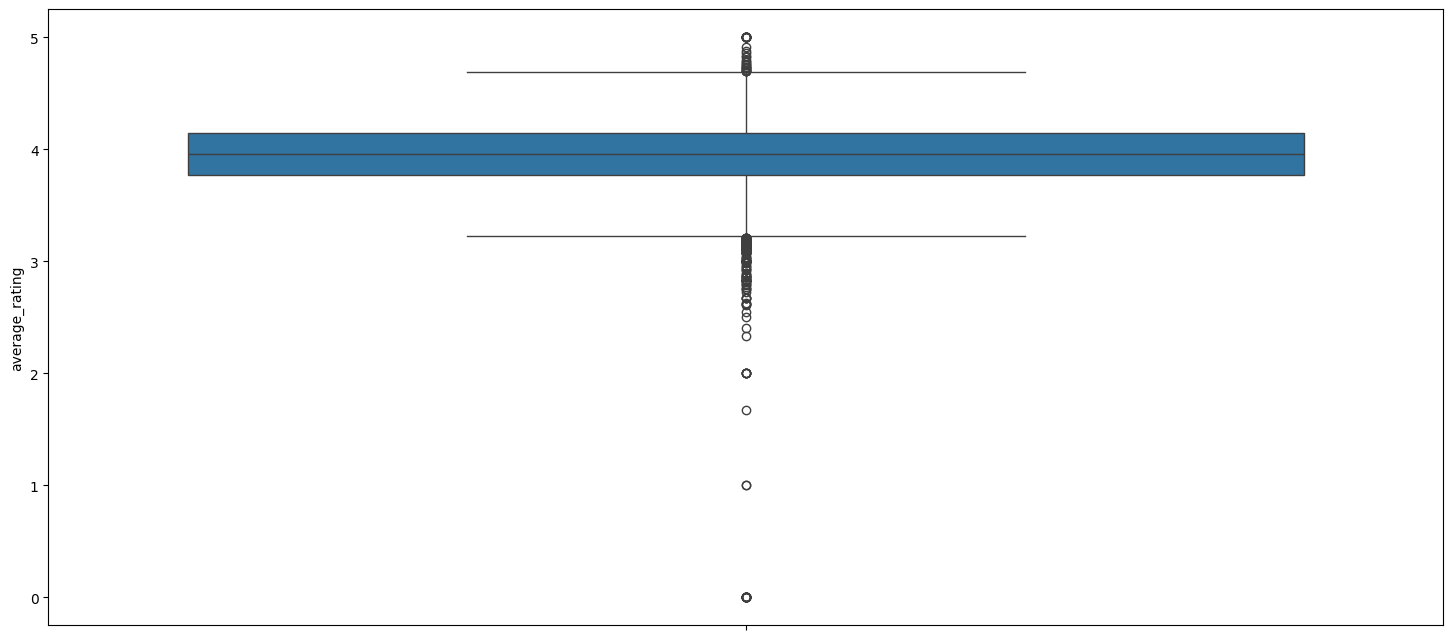

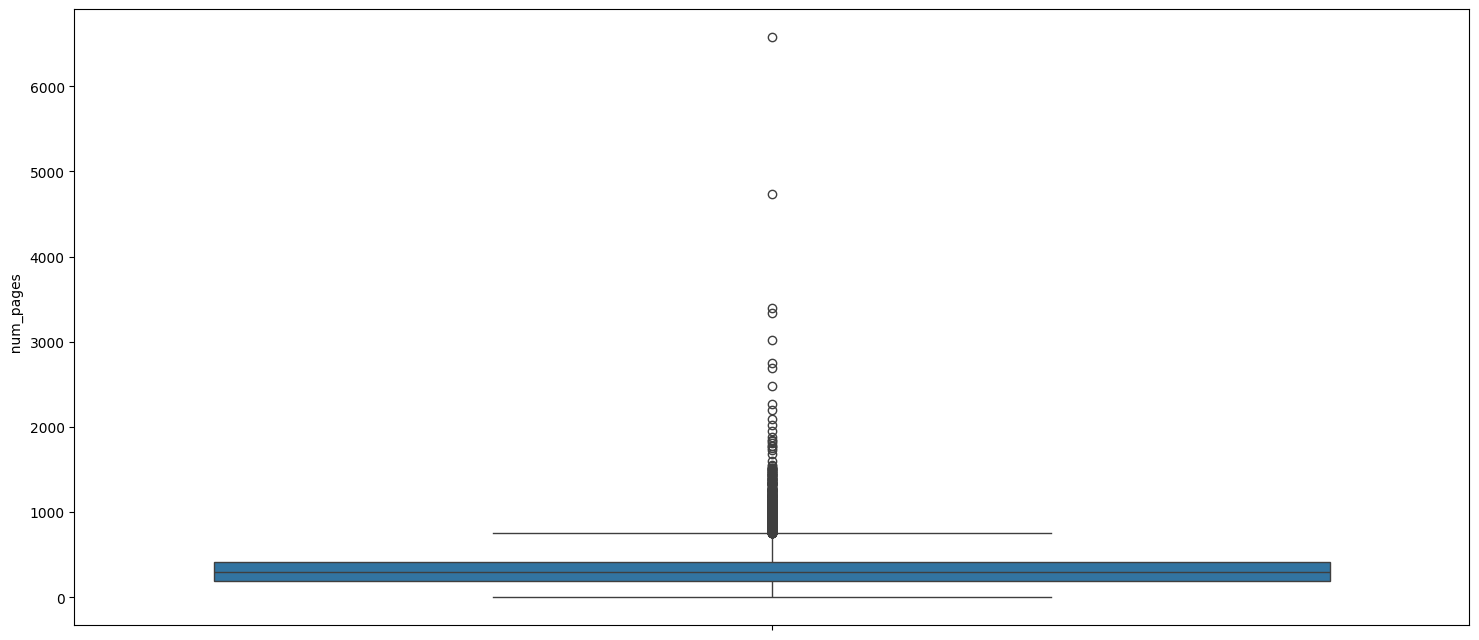

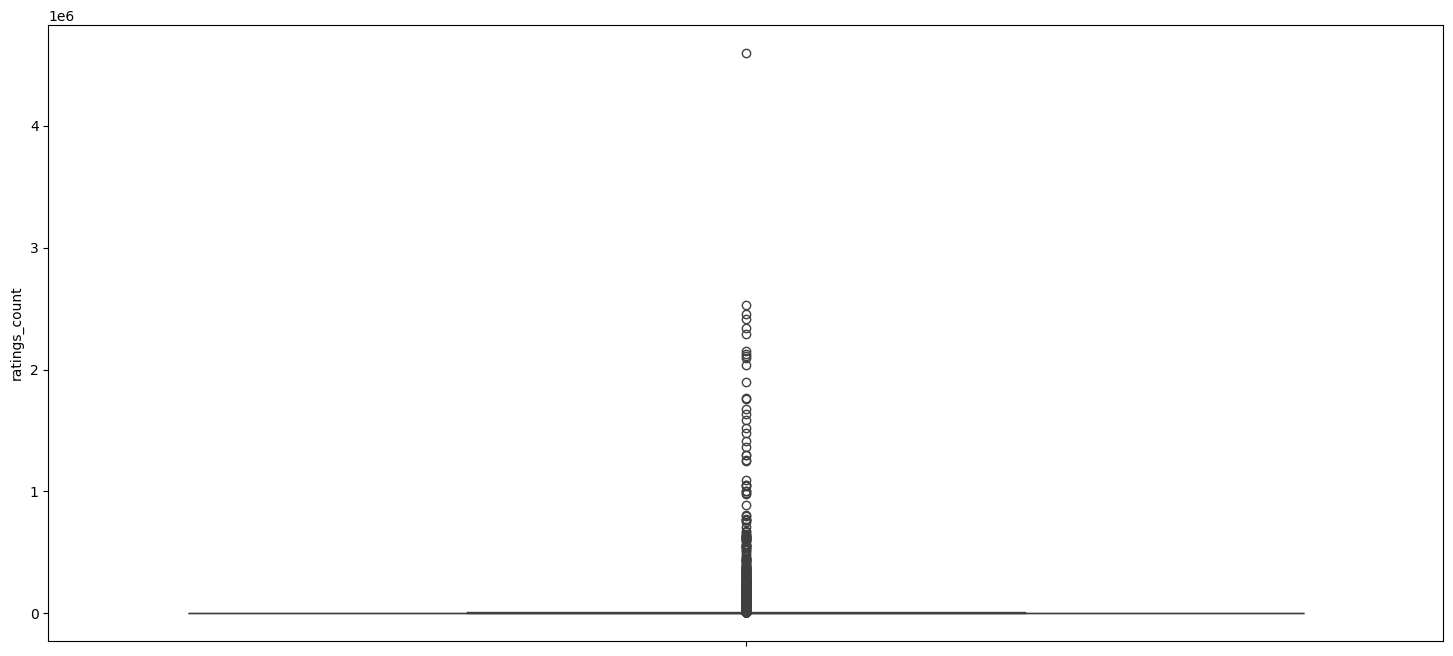

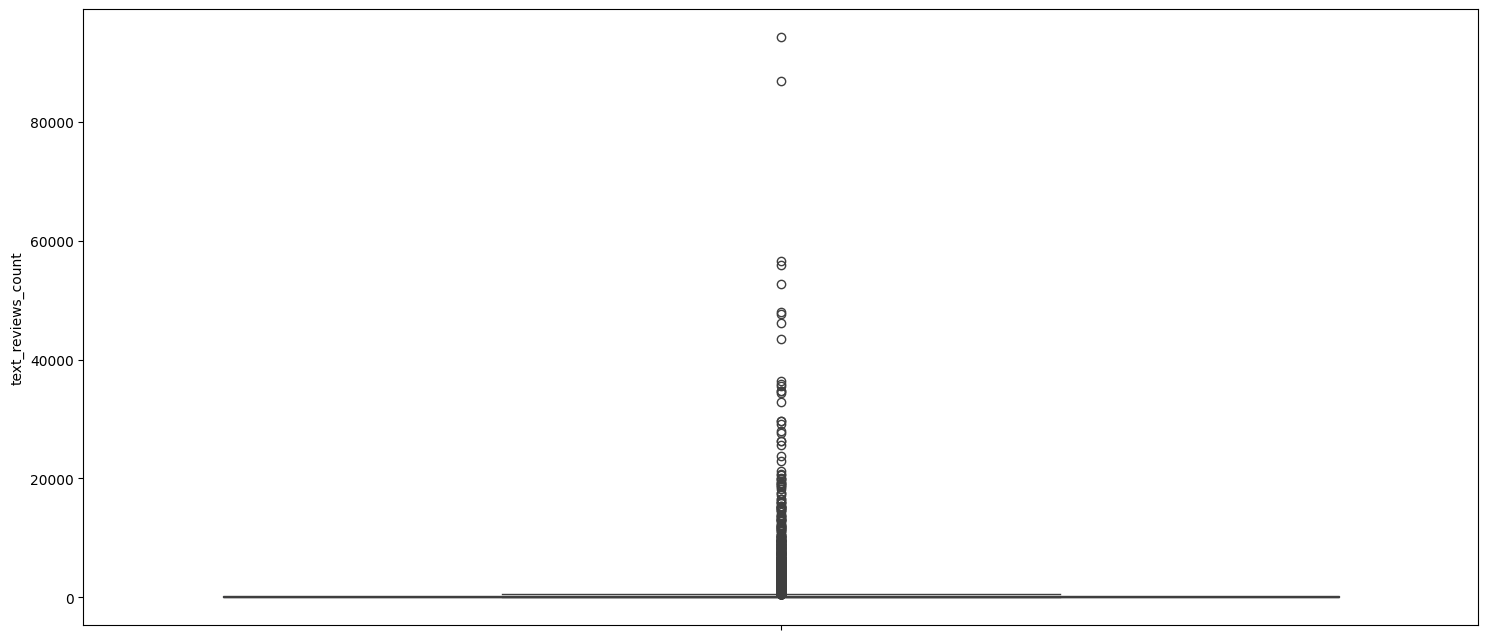

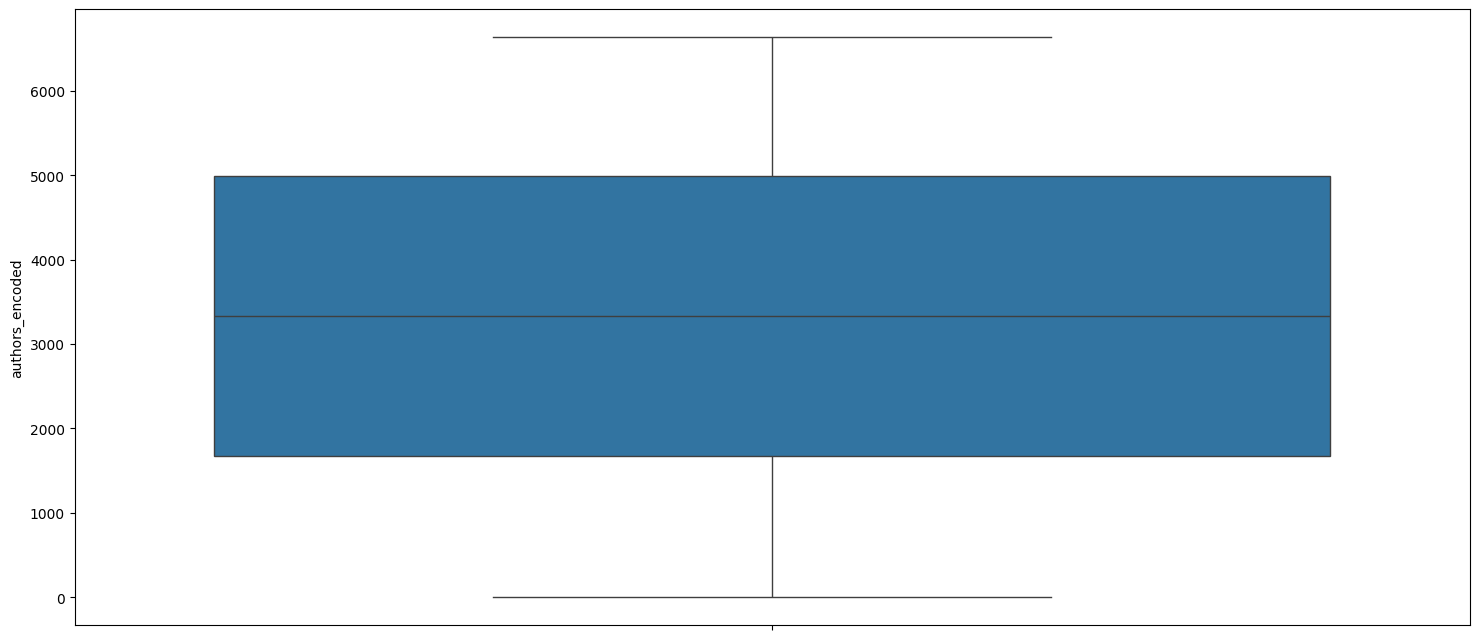

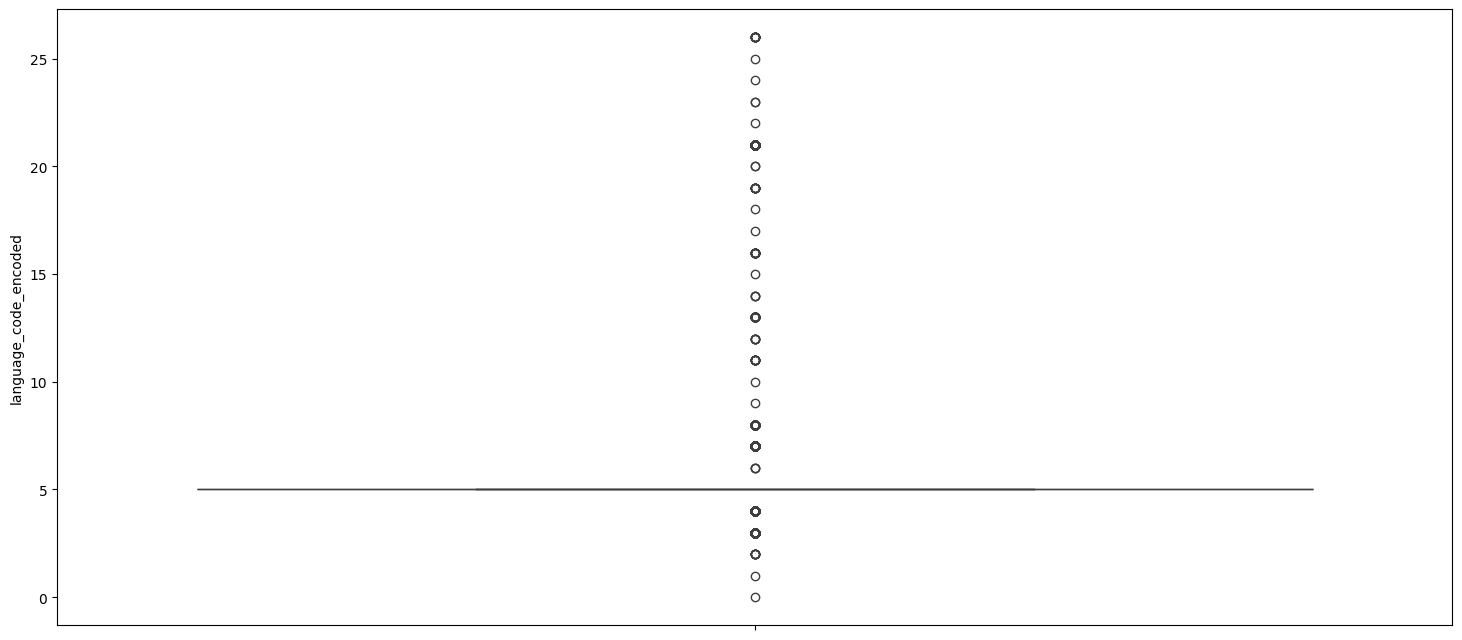

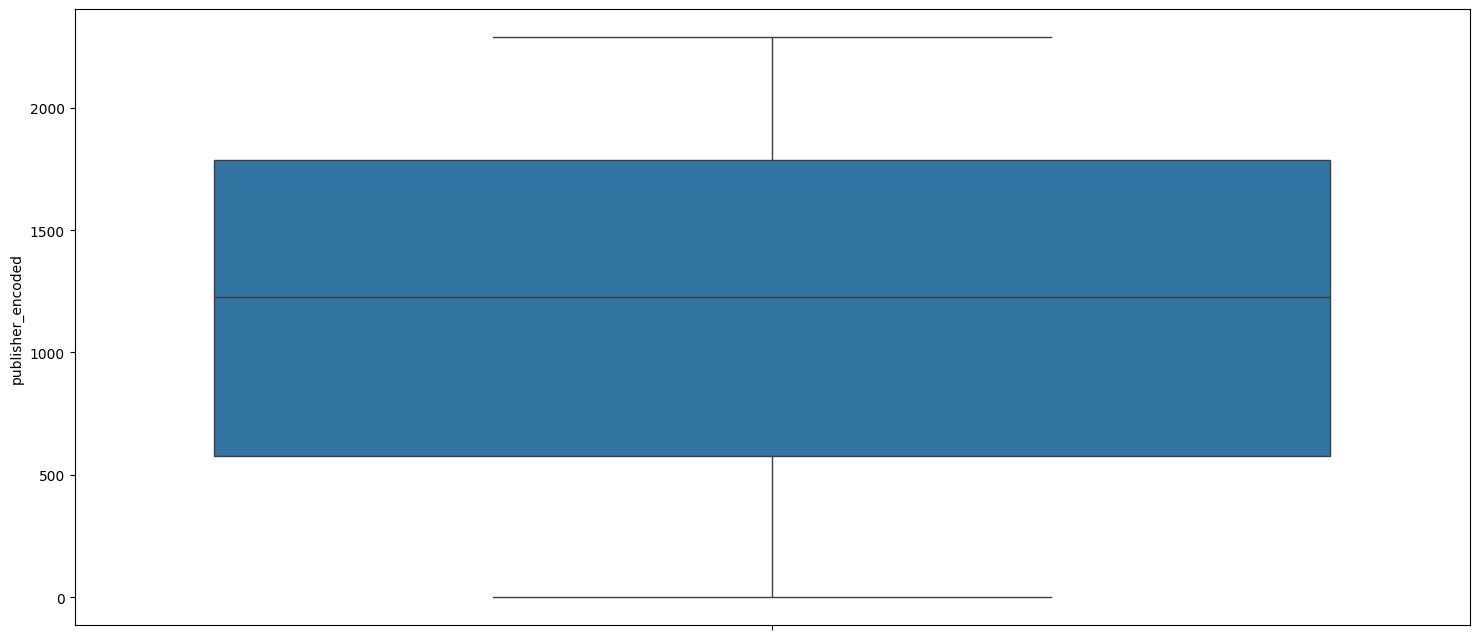

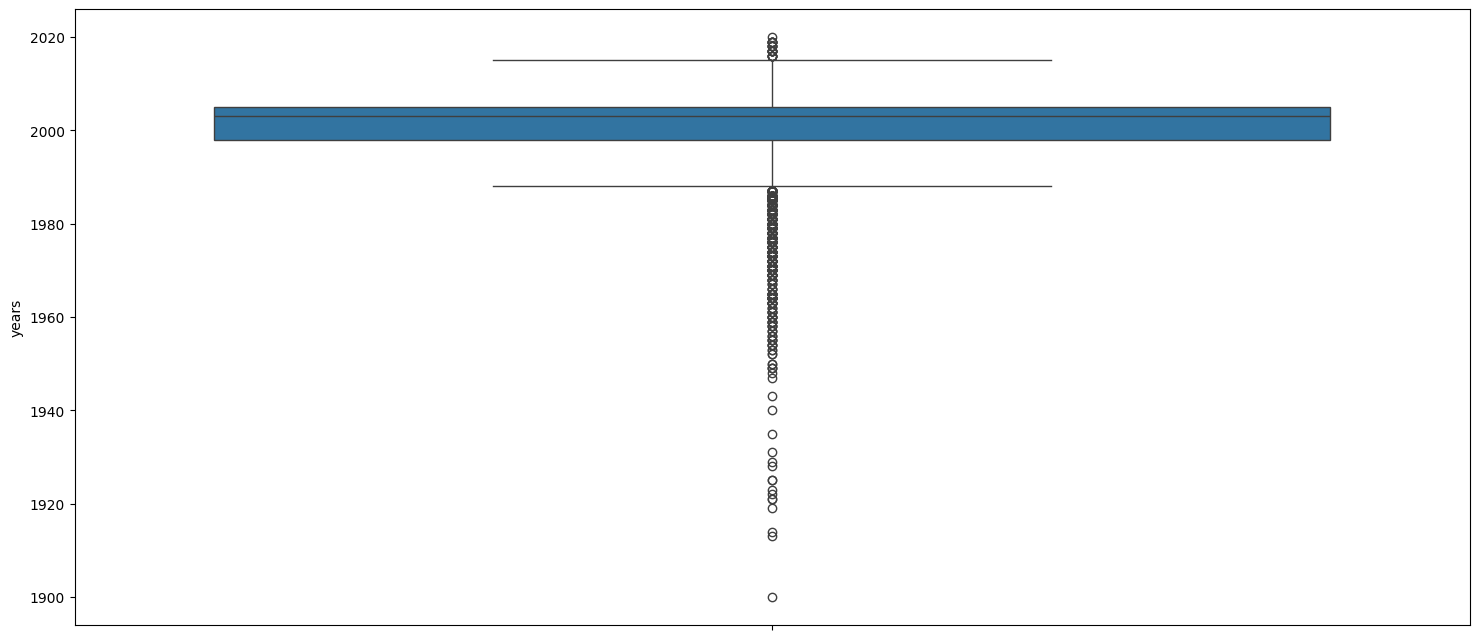

In [56]:
import seaborn as sns
for column in df:
    plt.figure(figsize=(18,8))
    sns.boxplot(df[column])
    plt.show()

In [57]:
def remove_outliers(df, columns):
    # Create a copy of the DataFrame to avoid modifying the original one
    df_new = df.copy()
    
    for column in columns:
        q1 = df_new[column].quantile(0.25)
        q3 = df_new[column].quantile(0.75)
        IQR = q3 - q1
        lower_limit = q1 - 1.5 * IQR
        upper_limit = q3 + 1.5 * IQR
        
        # Filter the DataFrame to include only the rows within the IQR range
        df_new = df_new[(df_new[column] >= lower_limit) & (df_new[column] <= upper_limit)]
    
    return df_new

df2=remove_outliers(df,['average_rating','  num_pages','ratings_count','text_reviews_count','authors_encoded','language_code_encoded','publisher_encoded','years'])

In [58]:
df2.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,authors_encoded,language_code_encoded,publisher_encoded,years
count,5617.000000,5617.00000,5617.000000,5617.000000,5617.000000,5617.0,5617.000000,5617.000000
mean,3.937394,286.65729,1208.432437,55.917750,3358.506498,5.0,1180.843511,2001.035250
std,0.267389,158.43526,1936.907191,65.709545,1908.701396,0.0,681.060656,5.418738
min,3.220000,0.00000,0.000000,0.000000,0.000000,5.0,2.000000,1985.000000
25%,3.770000,180.00000,79.000000,7.000000,1698.000000,5.0,547.000000,1998.000000
50%,3.940000,272.00000,391.000000,28.000000,3369.000000,5.0,1226.000000,2003.000000
75%,4.120000,380.00000,1471.000000,84.000000,4999.000000,5.0,1793.000000,2005.000000
max,4.690000,746.00000,12633.000000,269.000000,6637.000000,5.0,2270.000000,2017.000000


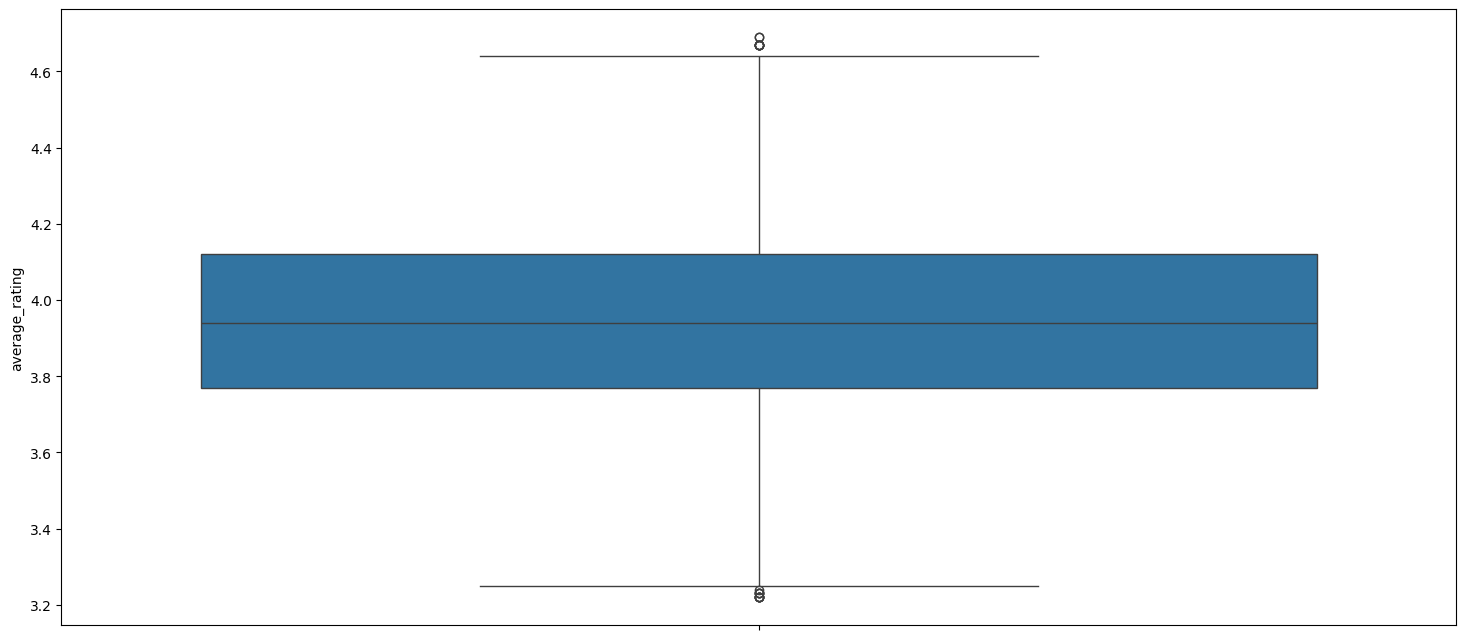

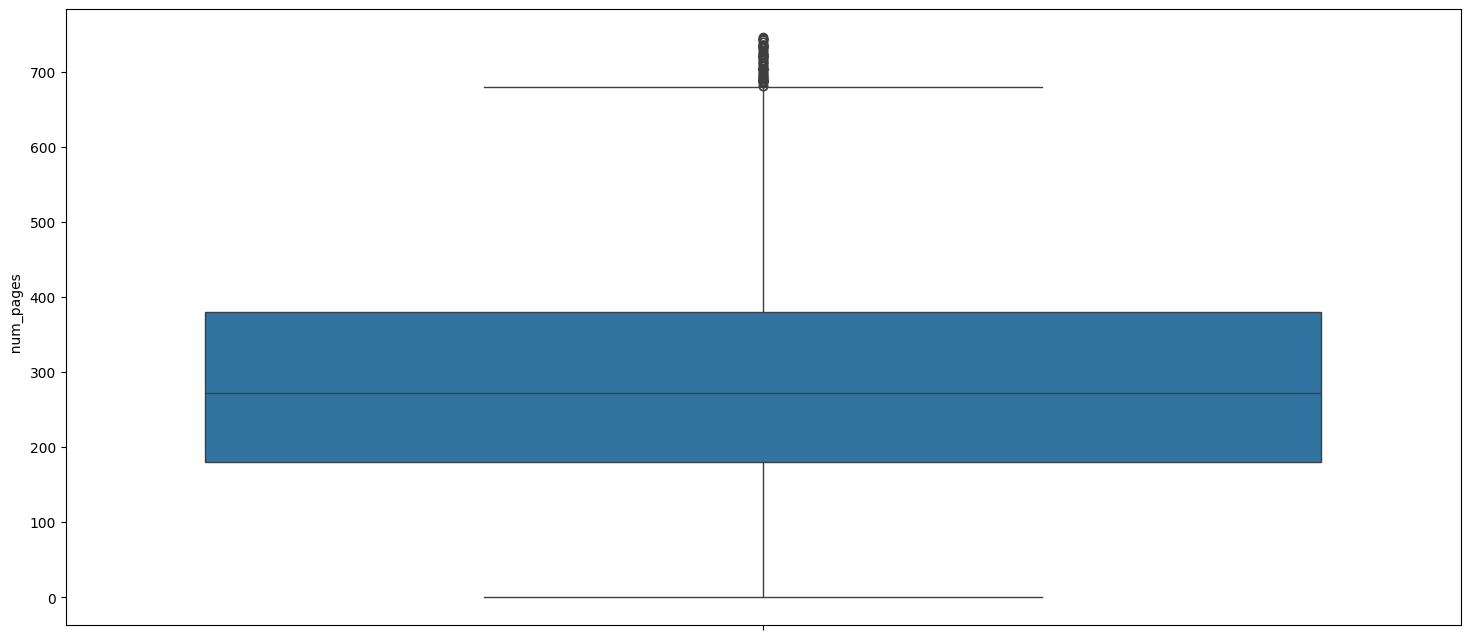

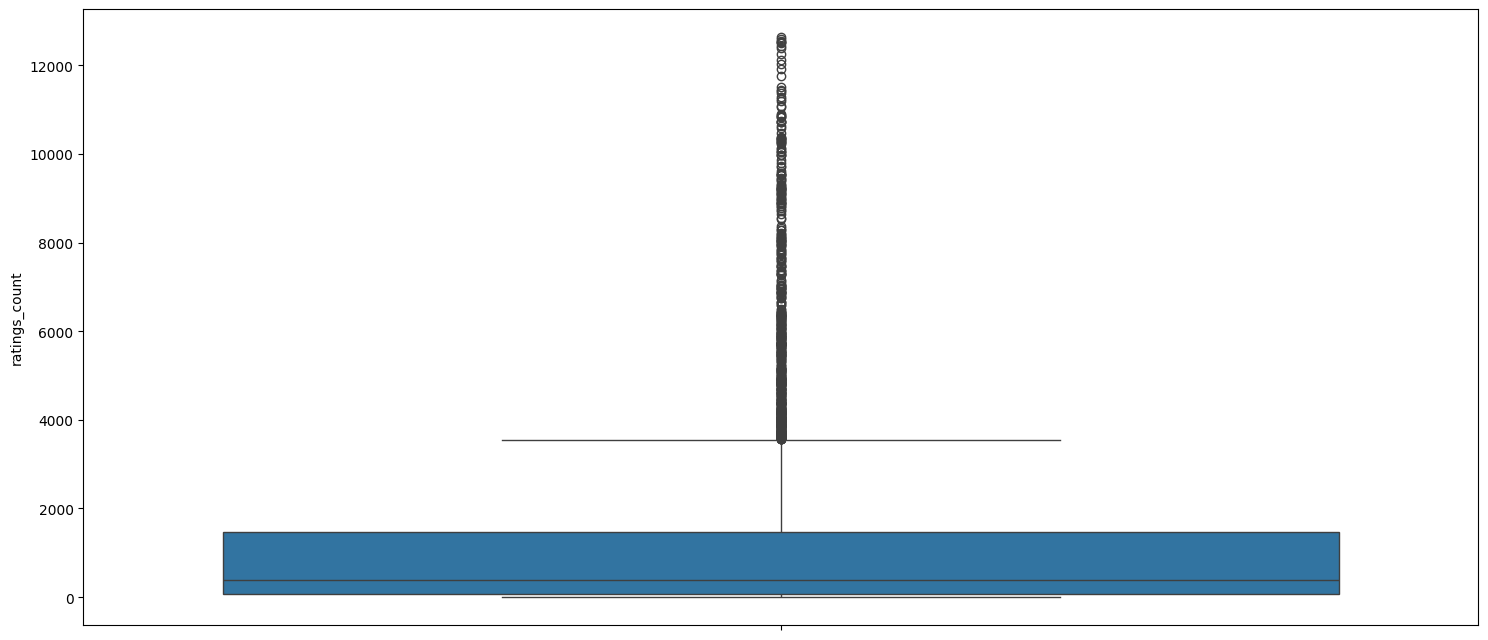

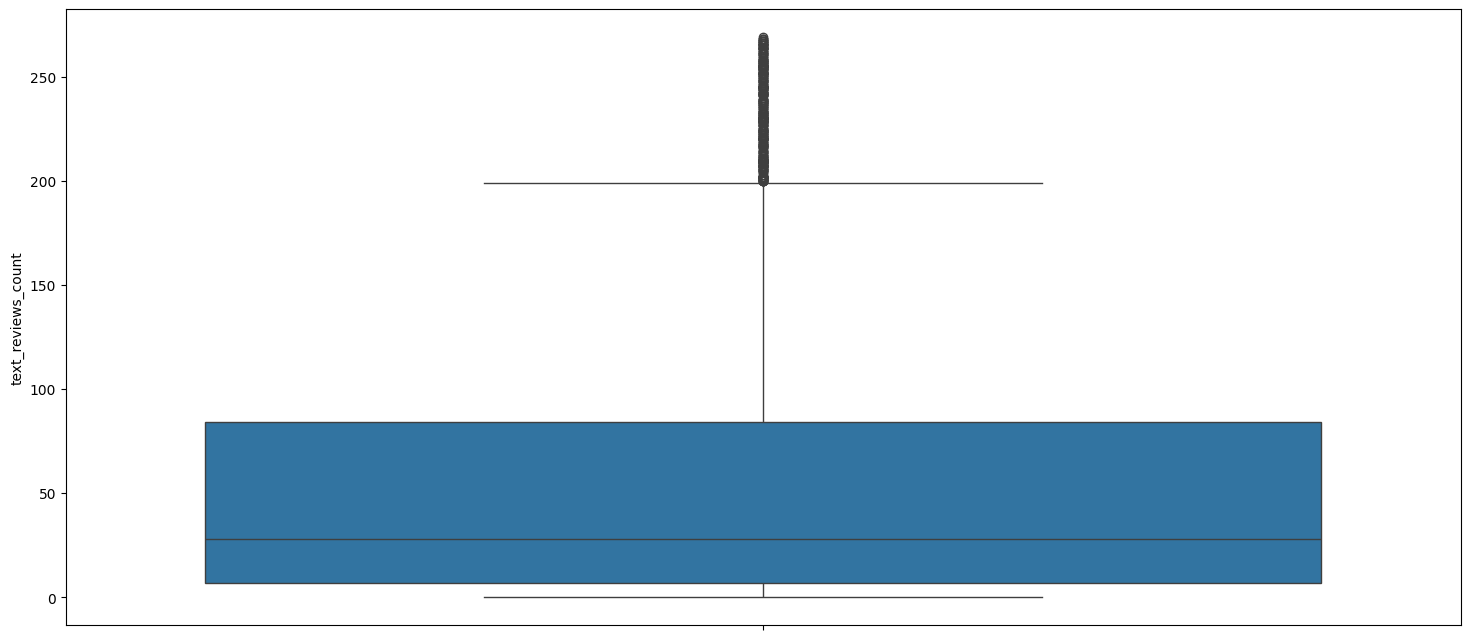

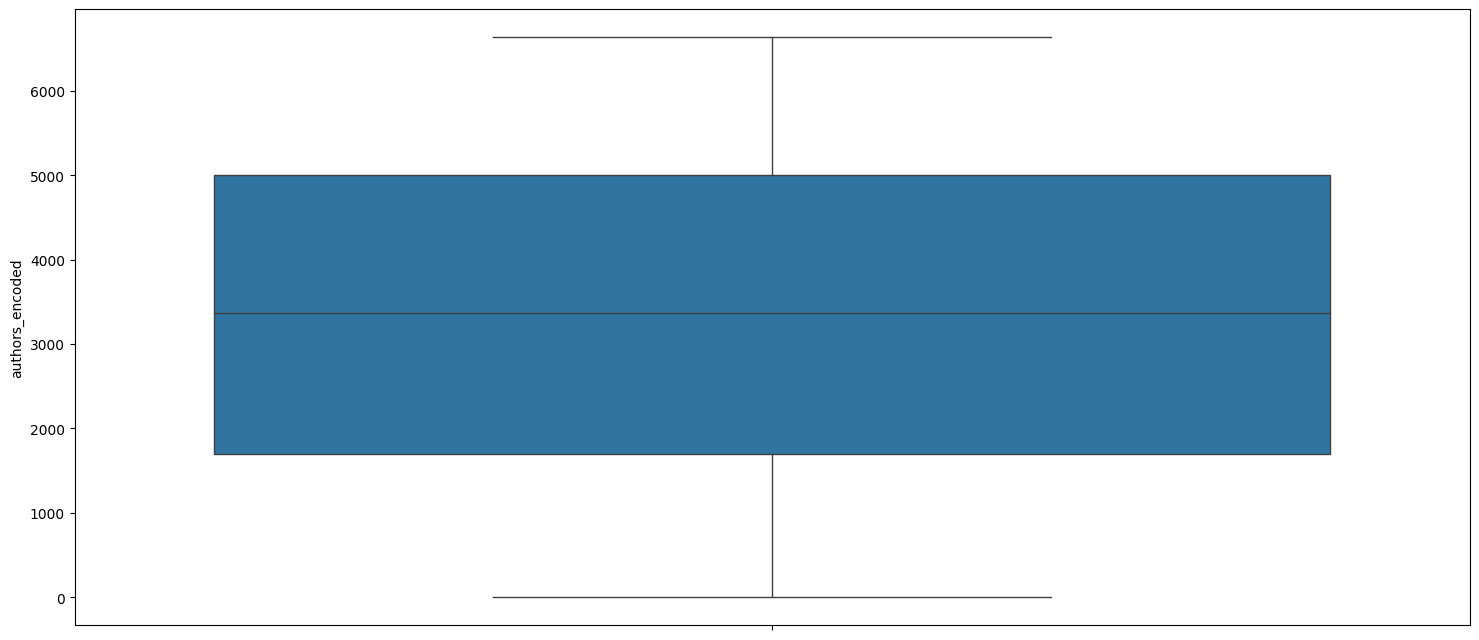

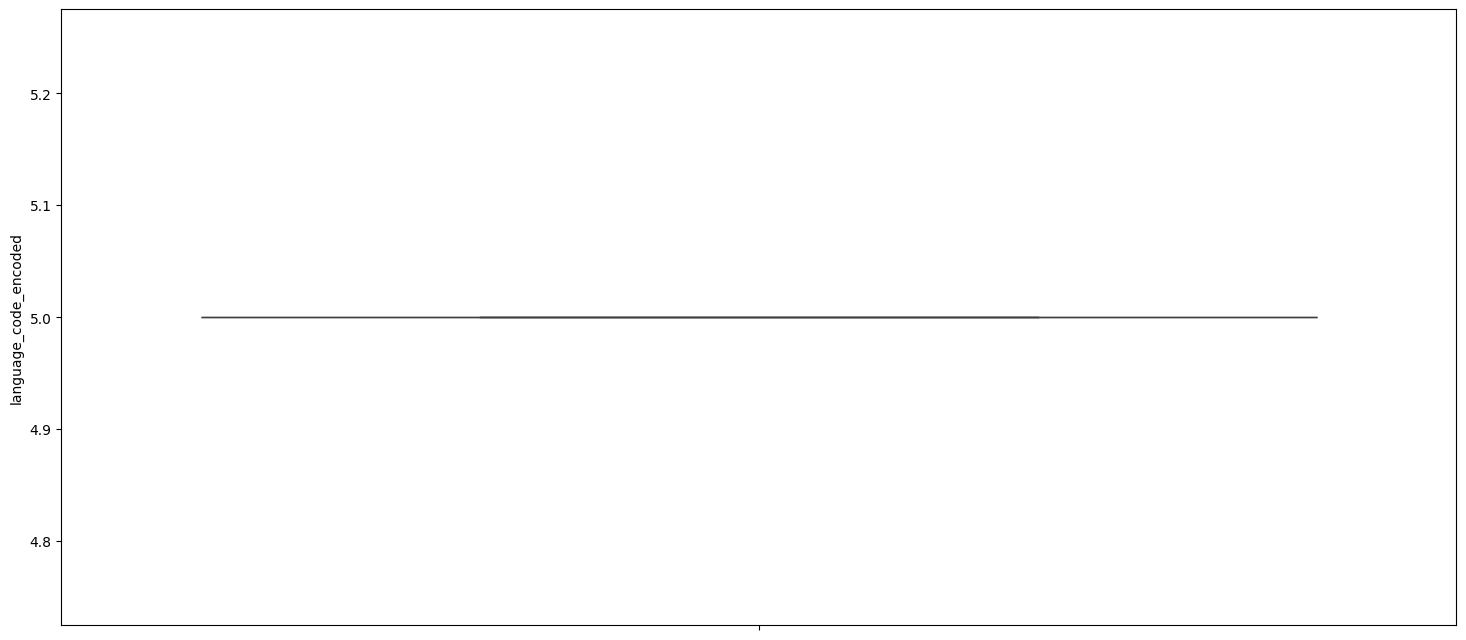

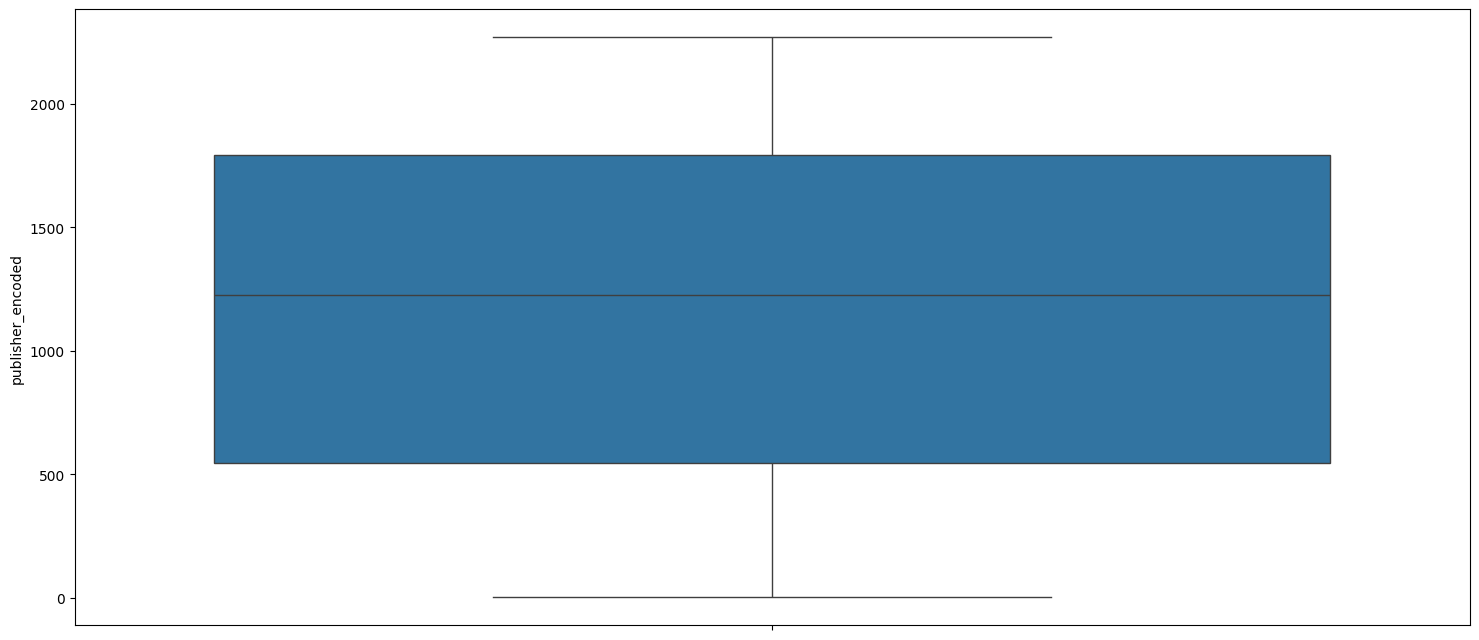

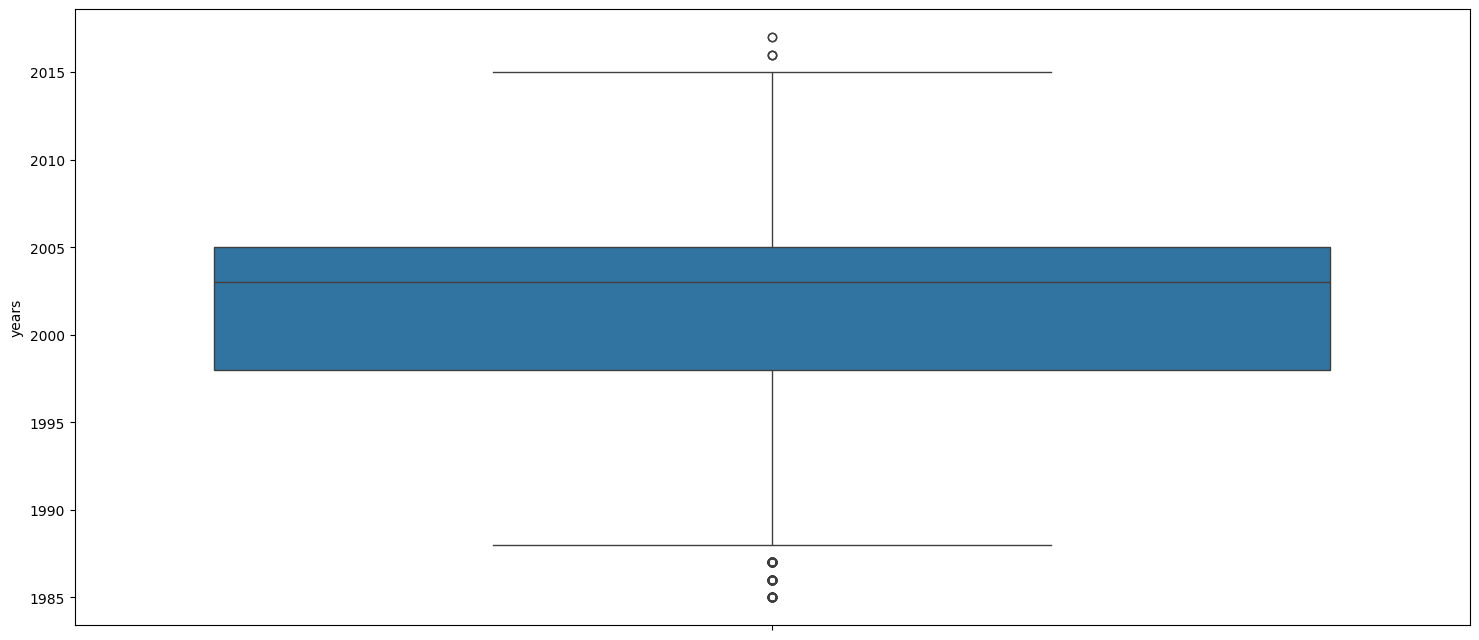

In [59]:
for column in df2:
    plt.figure(figsize=(18,8))
    sns.boxplot(df2[column])
    plt.show()

In [62]:
df3=remove_outliers(df2,['average_rating','  num_pages','ratings_count','text_reviews_count','years'])

In [63]:
df3.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,authors_encoded,language_code_encoded,publisher_encoded,years
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.0,4521.000000,4521.000000
mean,3.927848,275.276045,573.229374,33.998894,3344.472904,5.0,1180.221411,2001.345499
std,0.266558,151.497922,735.753639,37.153065,1909.727176,0.0,680.124061,4.902147
min,3.250000,0.000000,0.000000,0.000000,0.000000,5.0,2.000000,1988.000000
25%,3.750000,175.000000,59.000000,5.000000,1692.000000,5.0,550.000000,1999.000000
50%,3.940000,261.000000,258.000000,19.000000,3344.000000,5.0,1226.000000,2003.000000
75%,4.110000,368.000000,801.000000,51.000000,4994.000000,5.0,1791.000000,2005.000000
max,4.640000,686.000000,3560.000000,151.000000,6637.000000,5.0,2270.000000,2015.000000


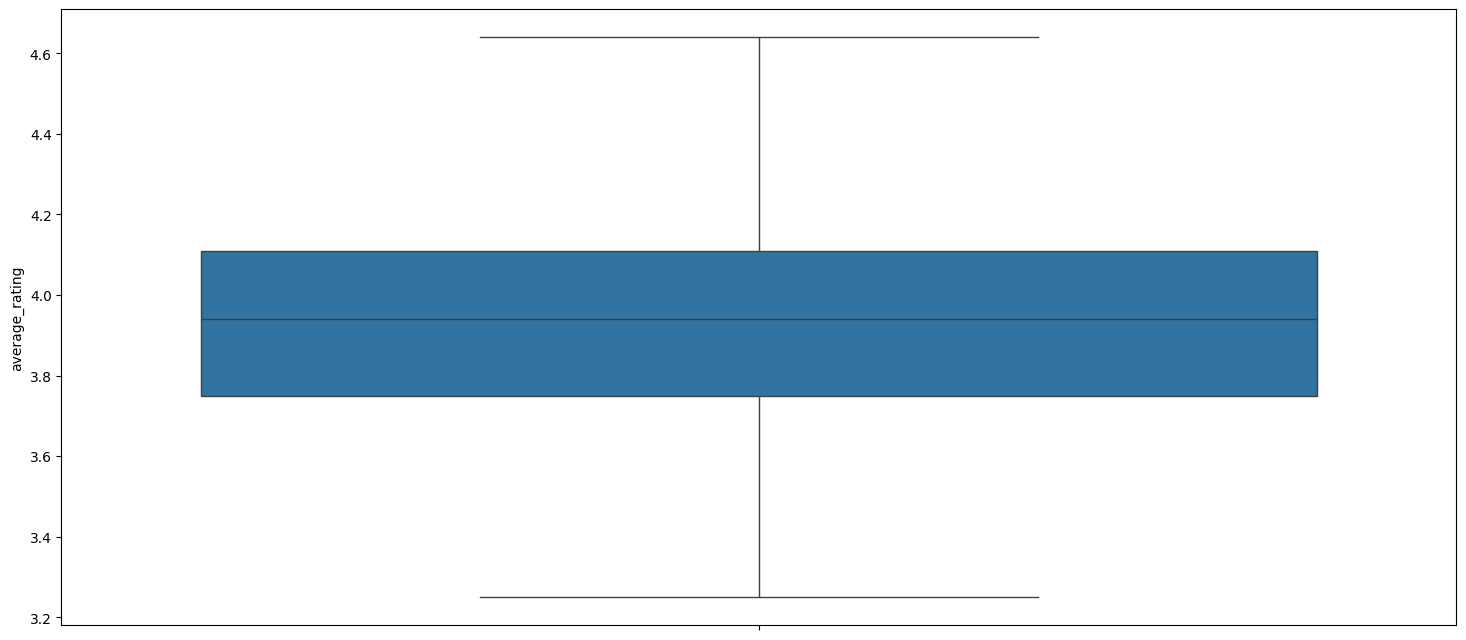

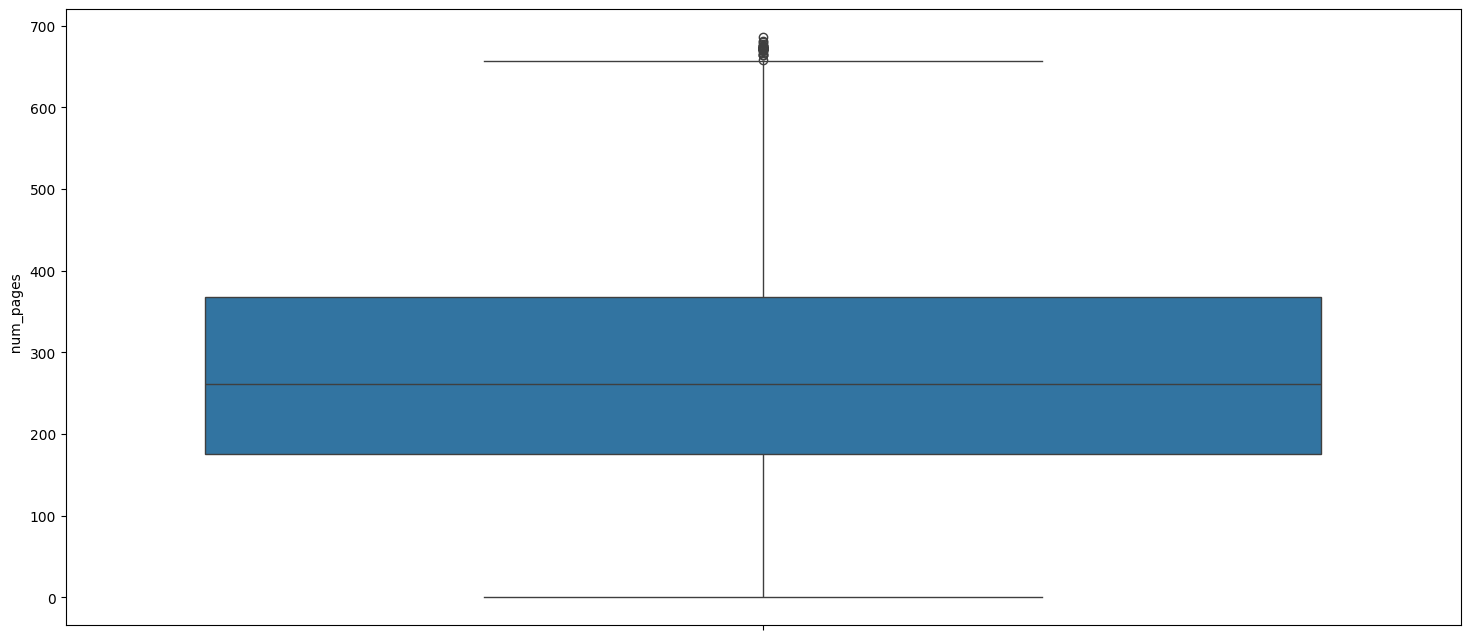

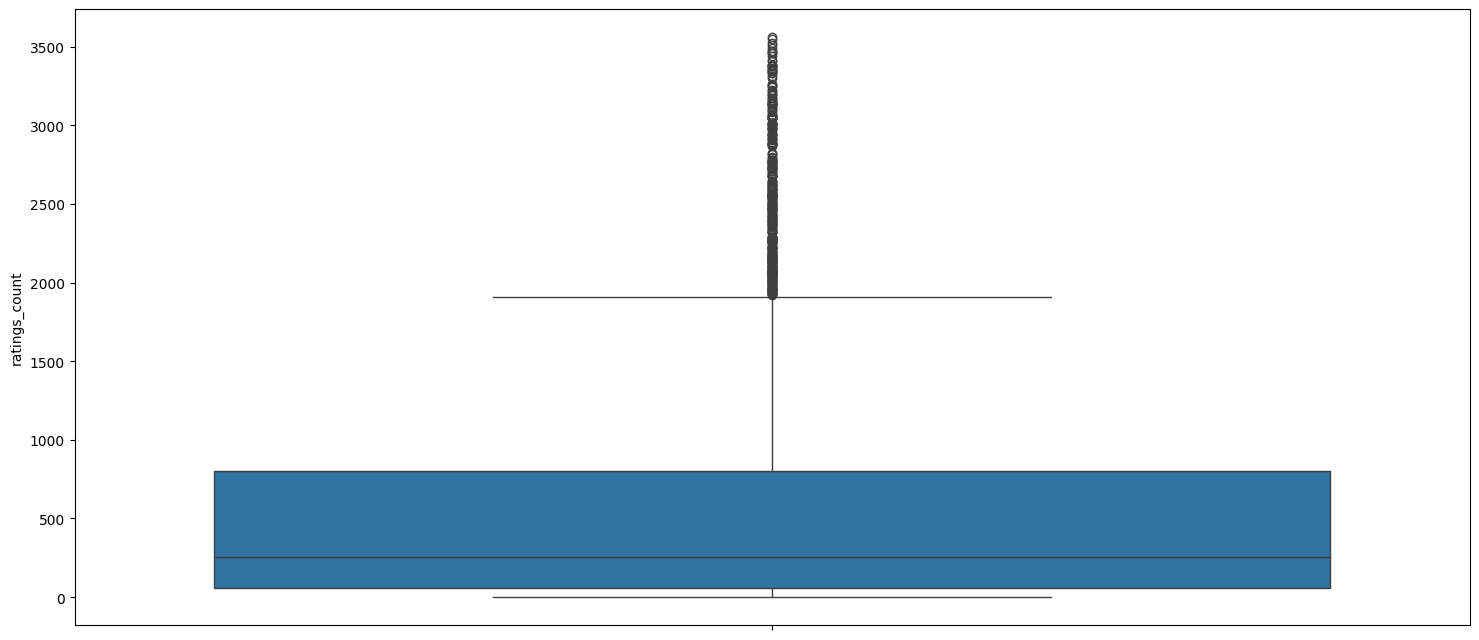

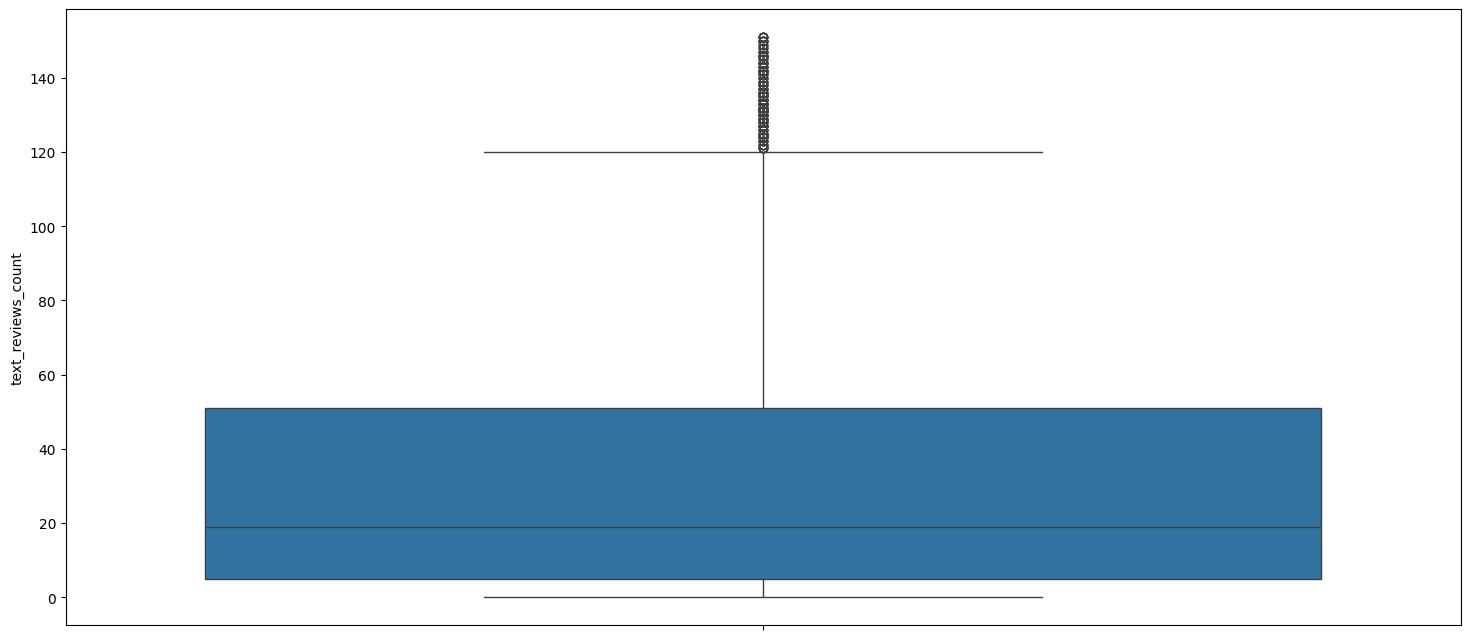

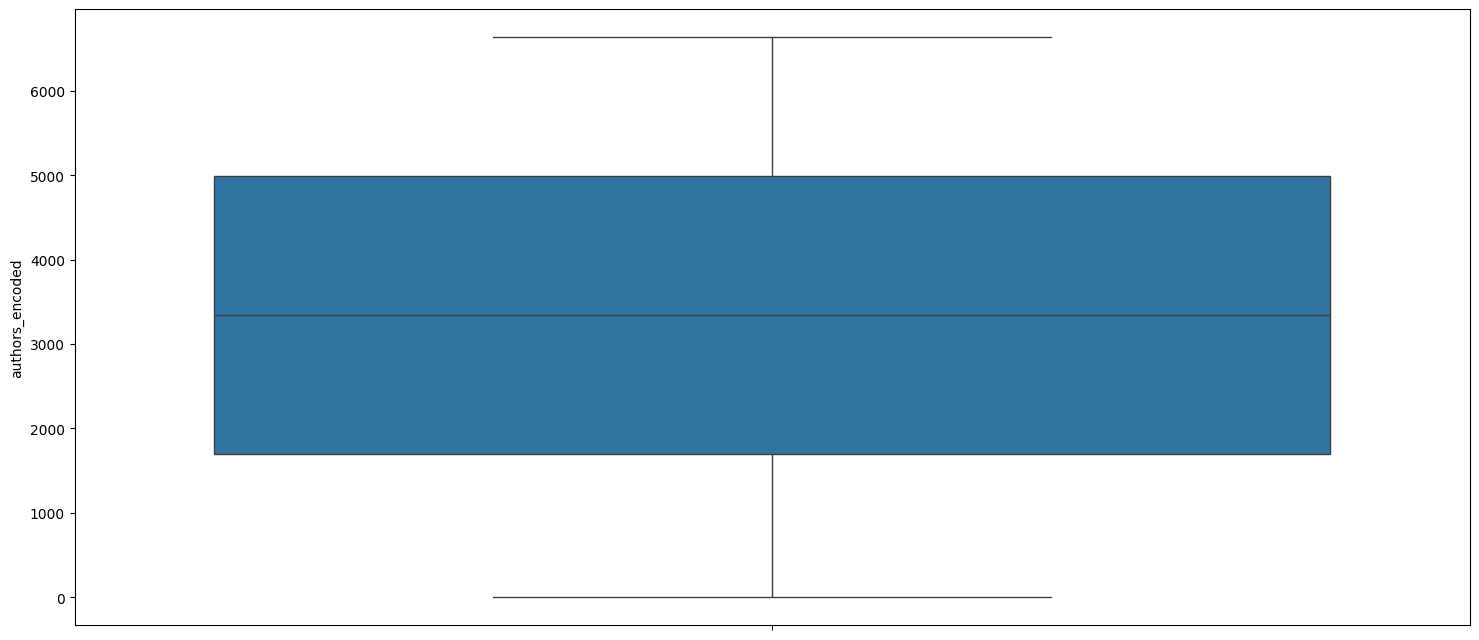

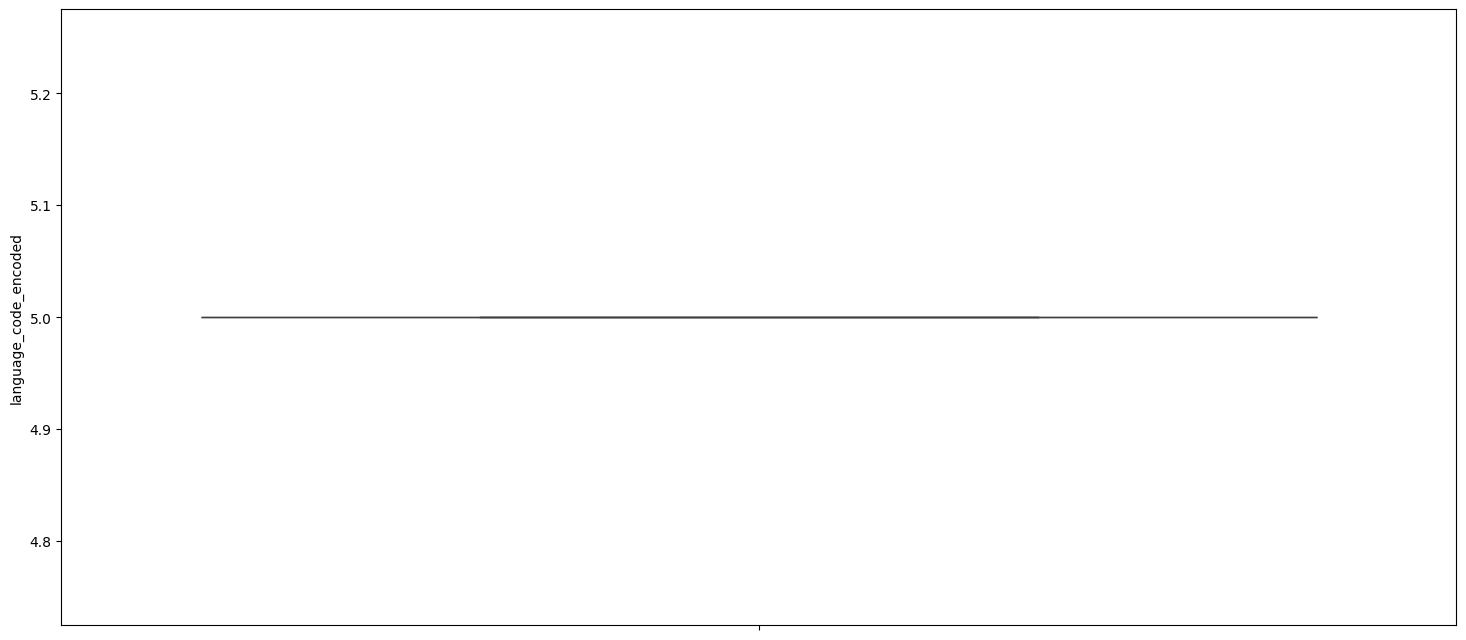

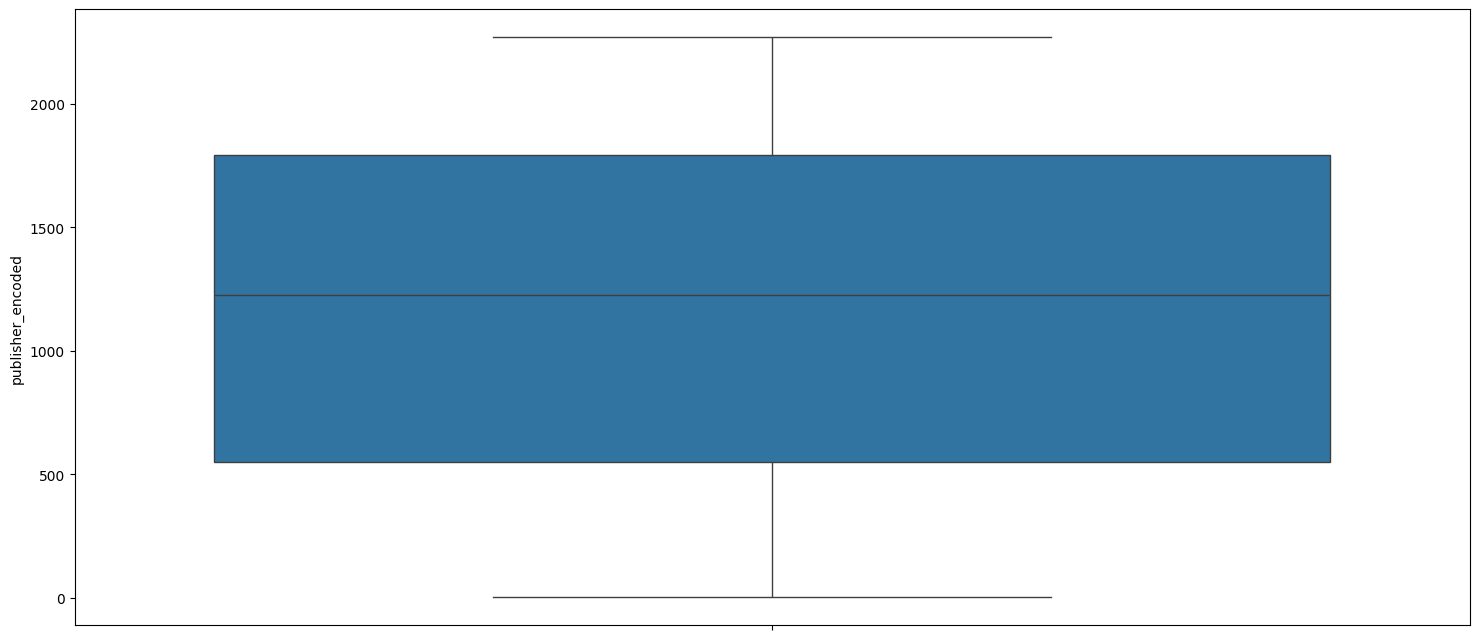

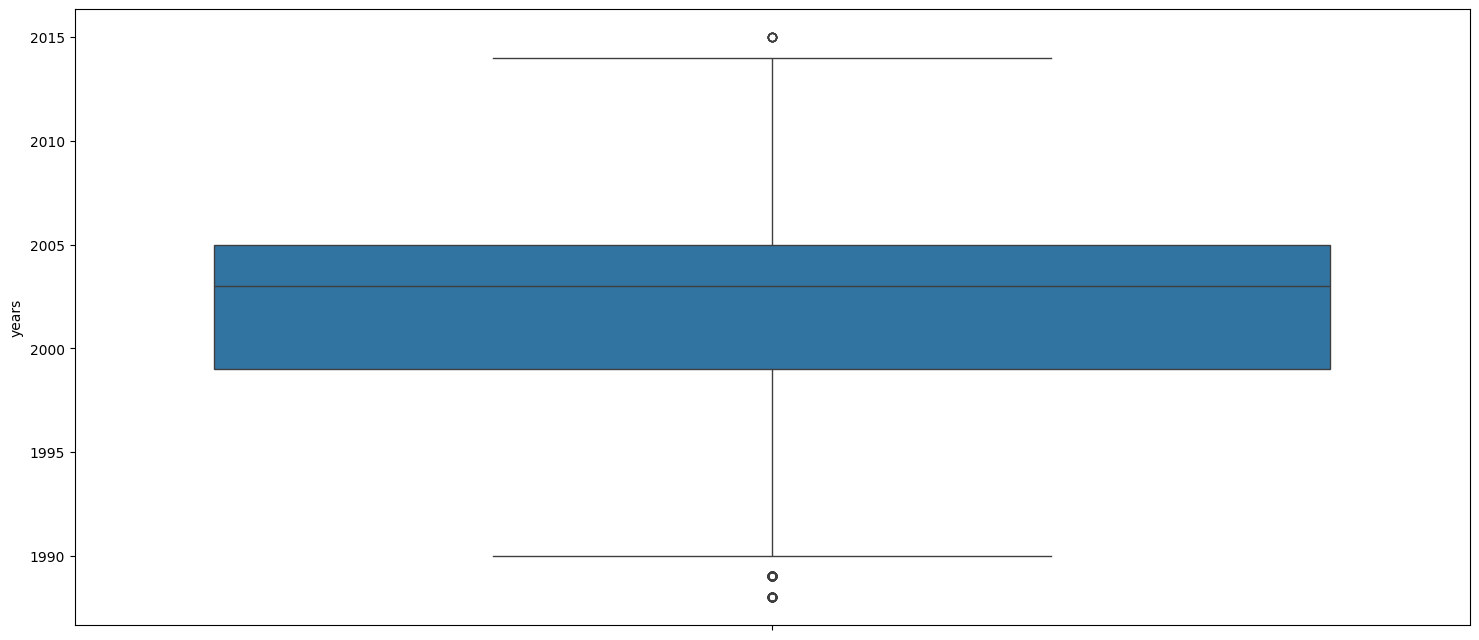

In [64]:
for column in df3:
    plt.figure(figsize=(18,8))
    sns.boxplot(df3[column])
    plt.show()

In [65]:
df4=remove_outliers(df3,['  num_pages','ratings_count','text_reviews_count','years'])

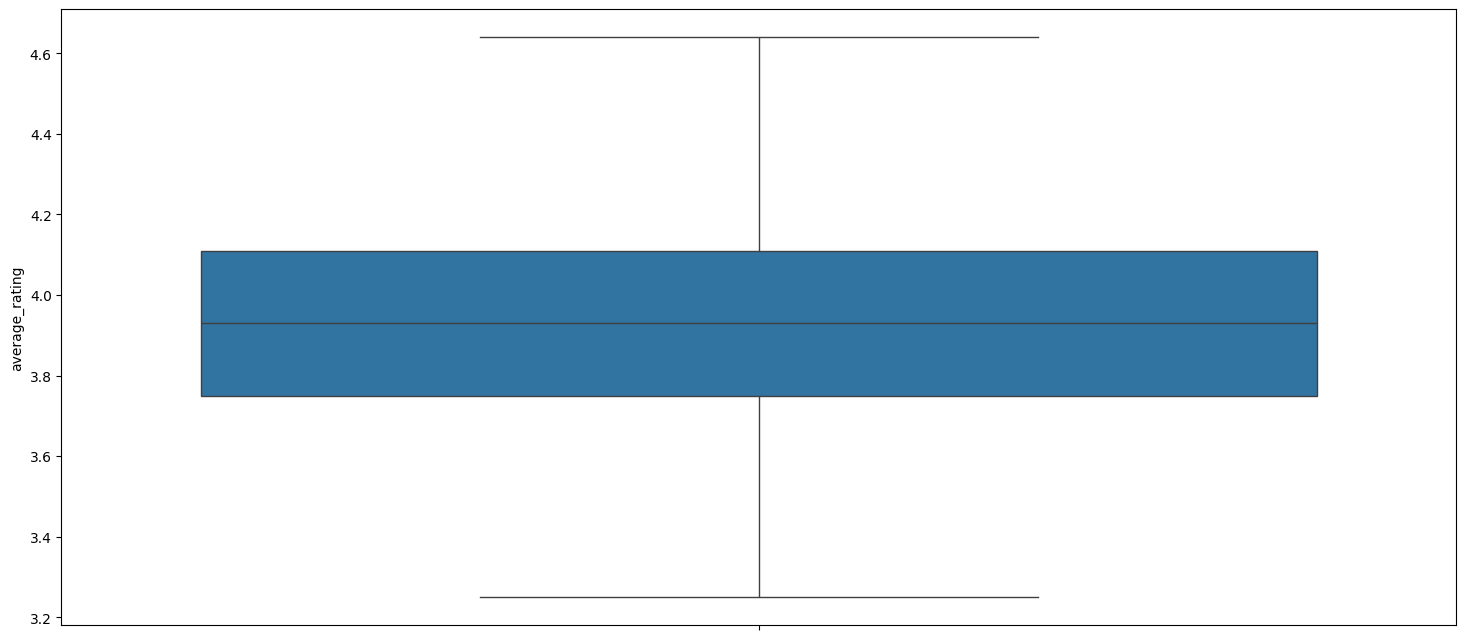

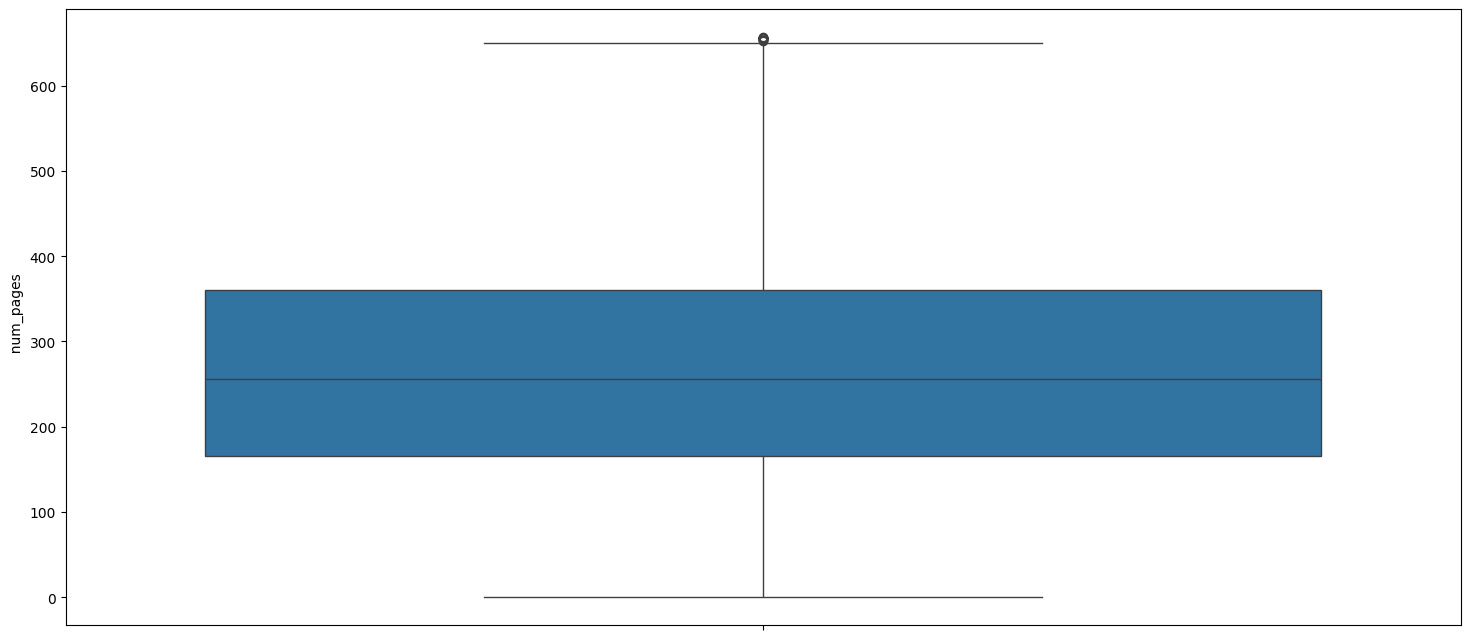

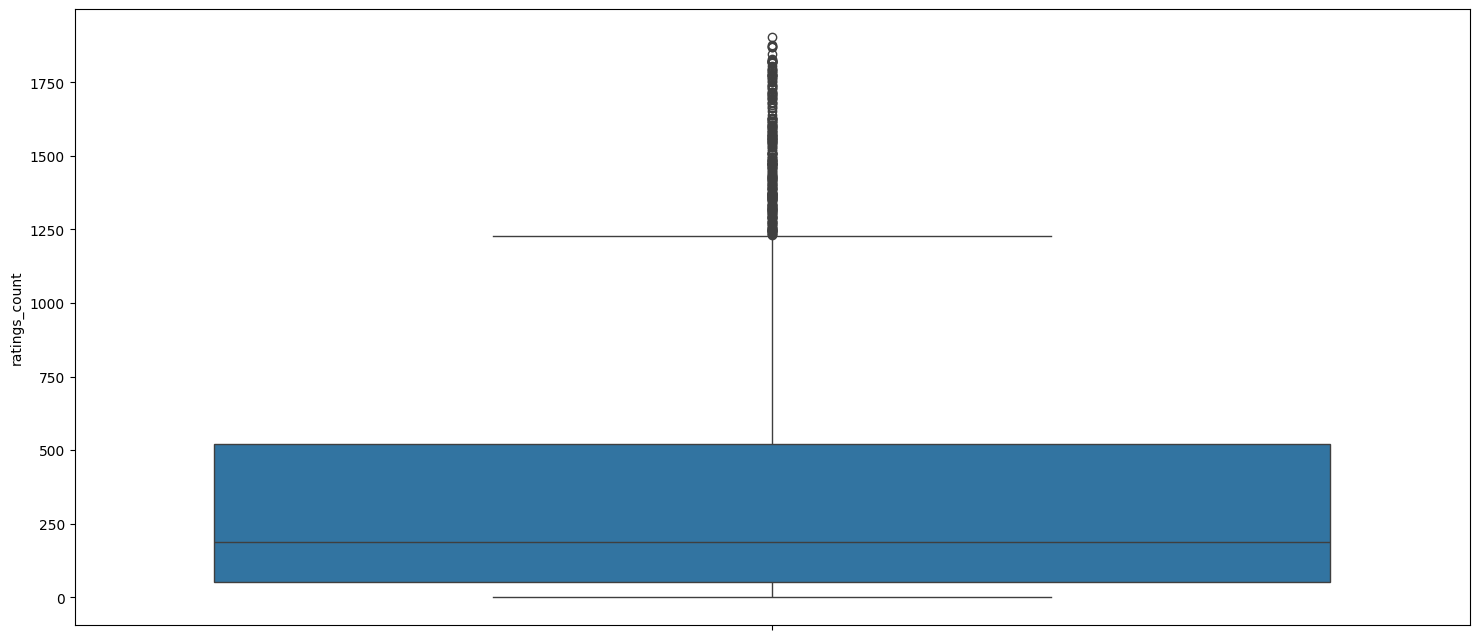

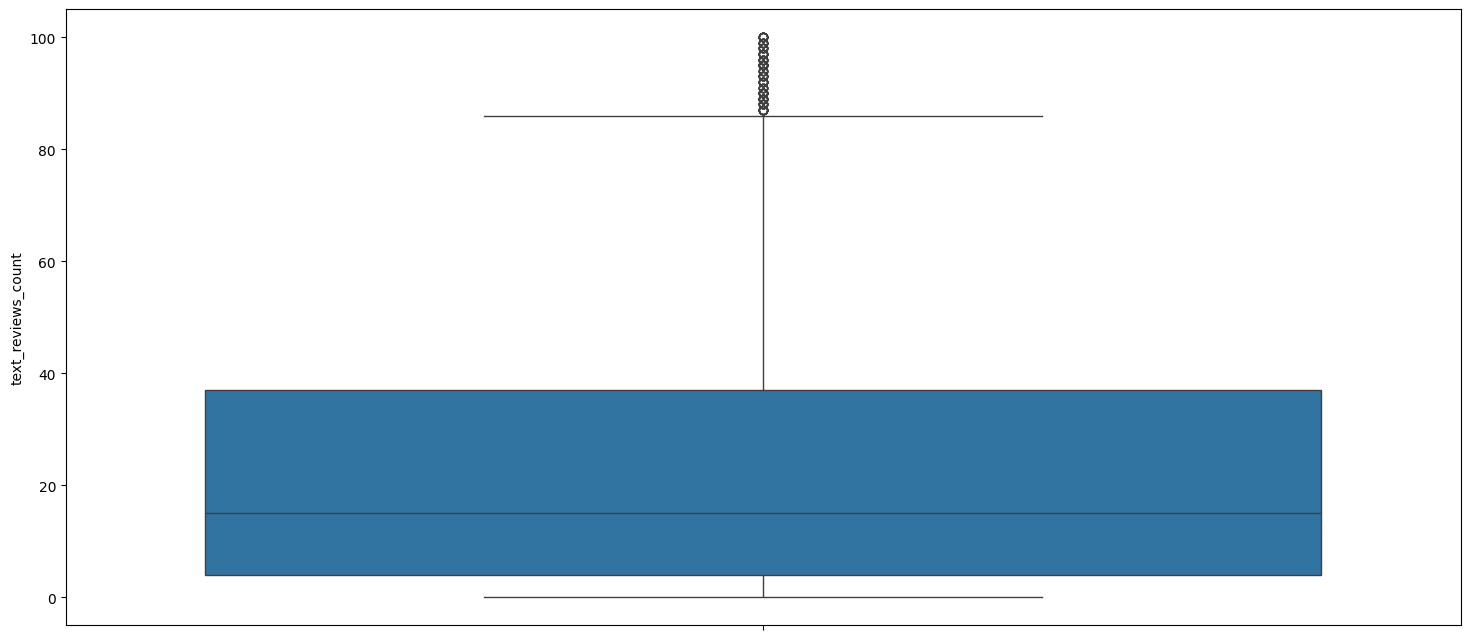

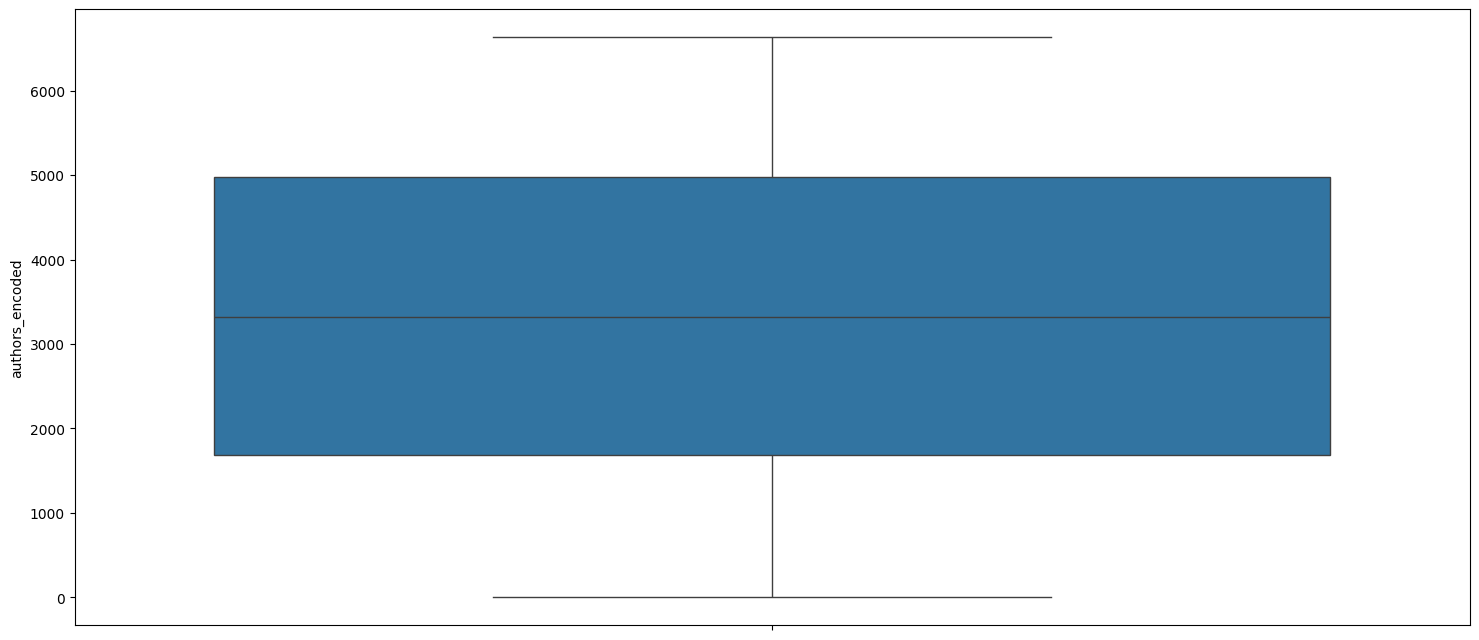

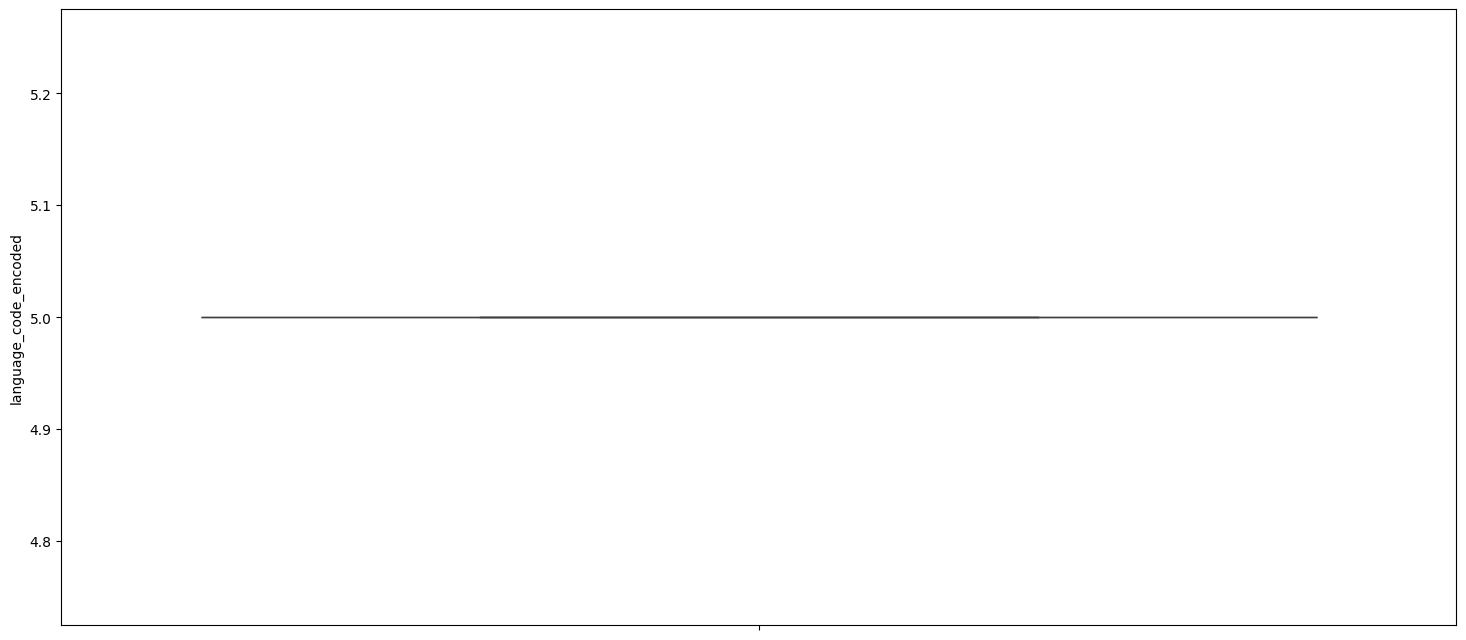

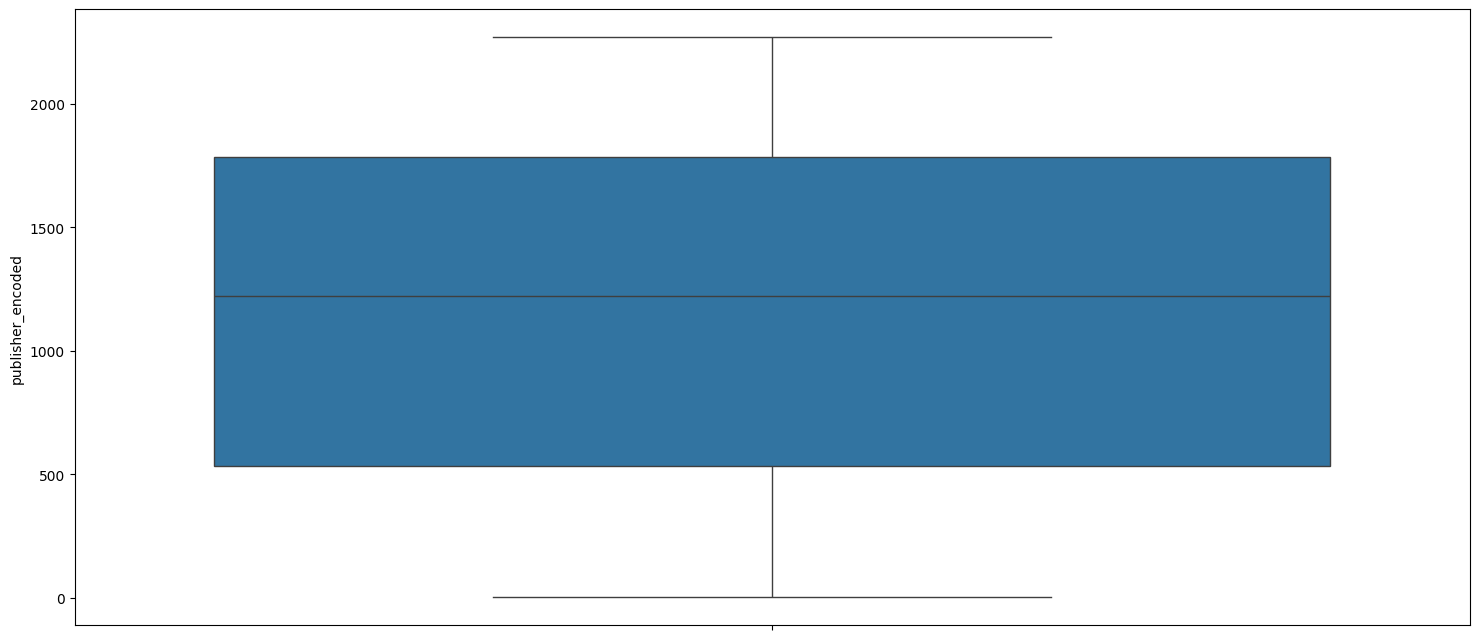

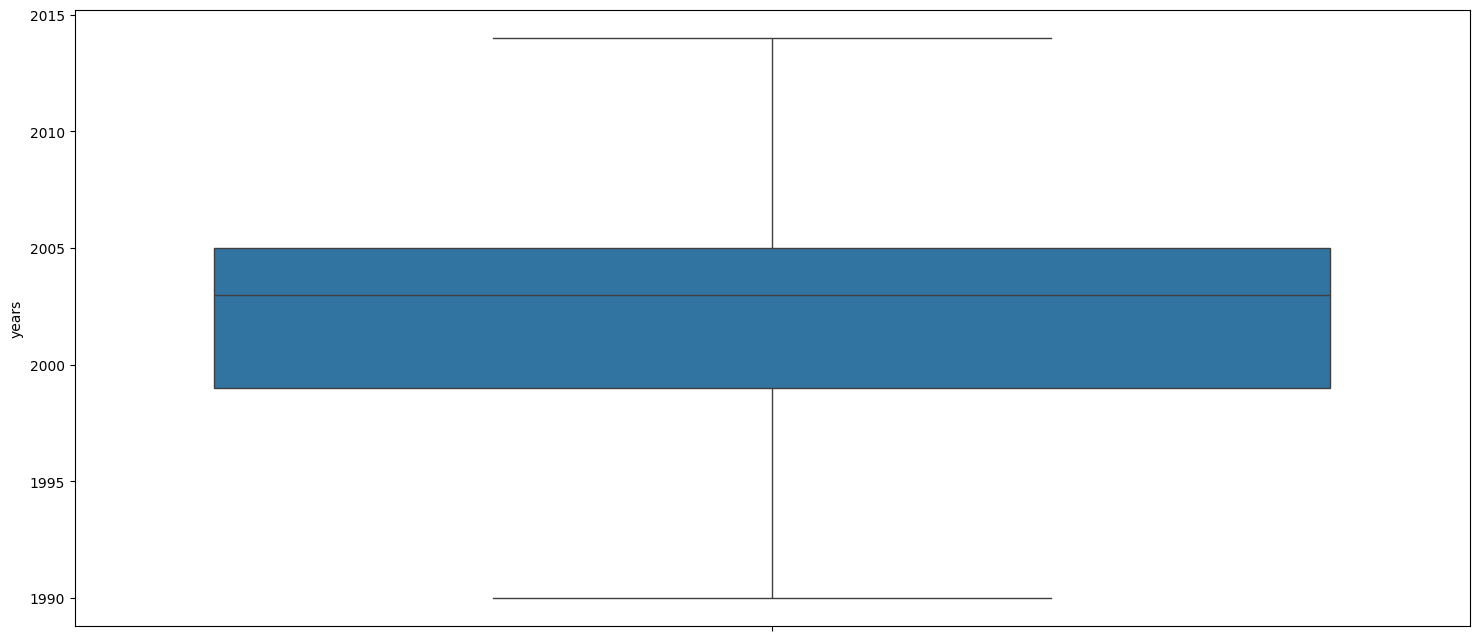

In [66]:
for column in df4:
    plt.figure(figsize=(18,8))
    sns.boxplot(df4[column])
    plt.show()

In [67]:
df5=remove_outliers(df4,['  num_pages','ratings_count','text_reviews_count','years'])

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11122 entries, 0 to 11122
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   average_rating         11122 non-null  float64
 1     num_pages            11122 non-null  int64  
 2   ratings_count          11122 non-null  int64  
 3   text_reviews_count     11122 non-null  int64  
 4   authors_encoded        11122 non-null  int32  
 5   language_code_encoded  11122 non-null  int32  
 6   publisher_encoded      11122 non-null  int32  
 7   years                  11120 non-null  float64
dtypes: float64(2), int32(3), int64(3)
memory usage: 909.7 KB


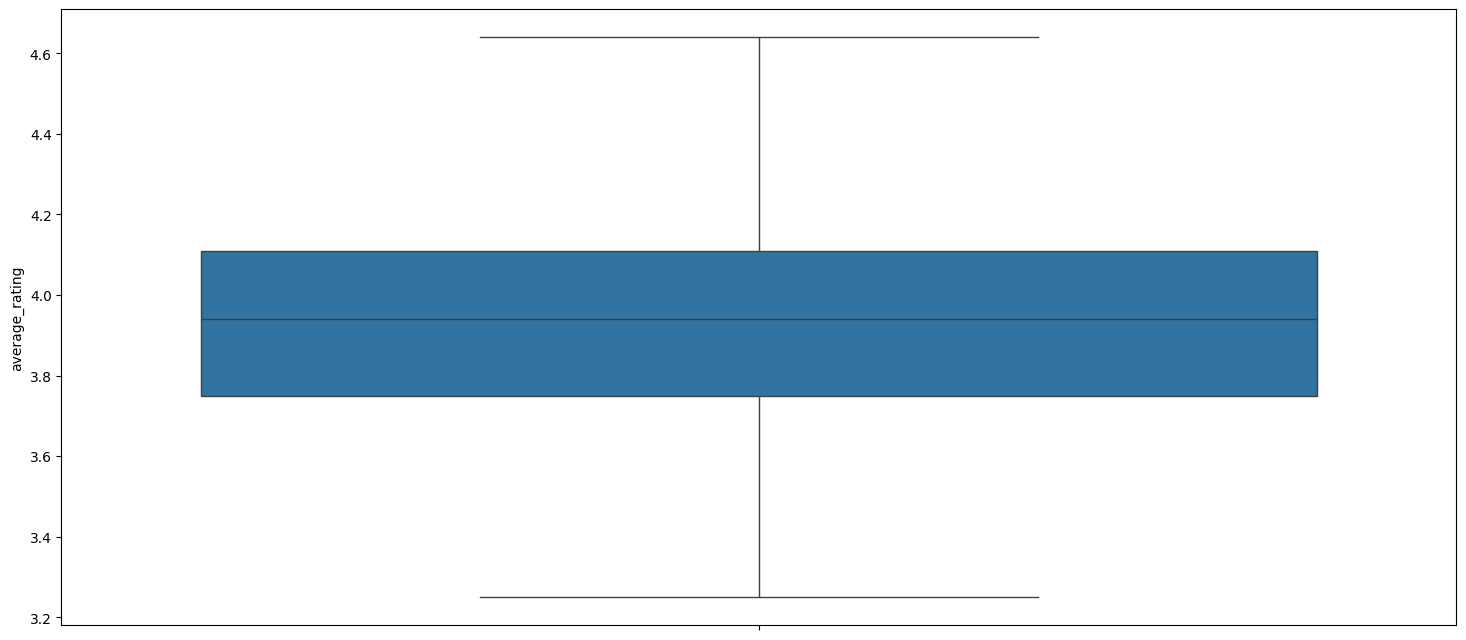

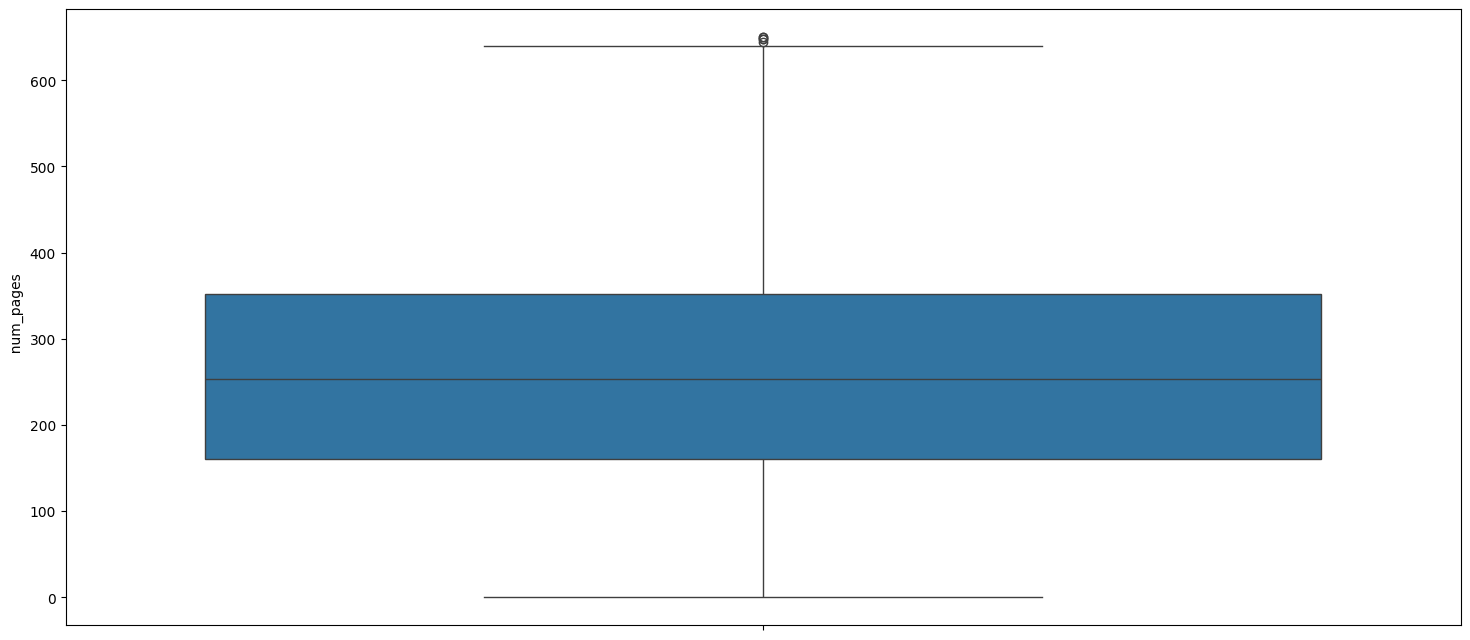

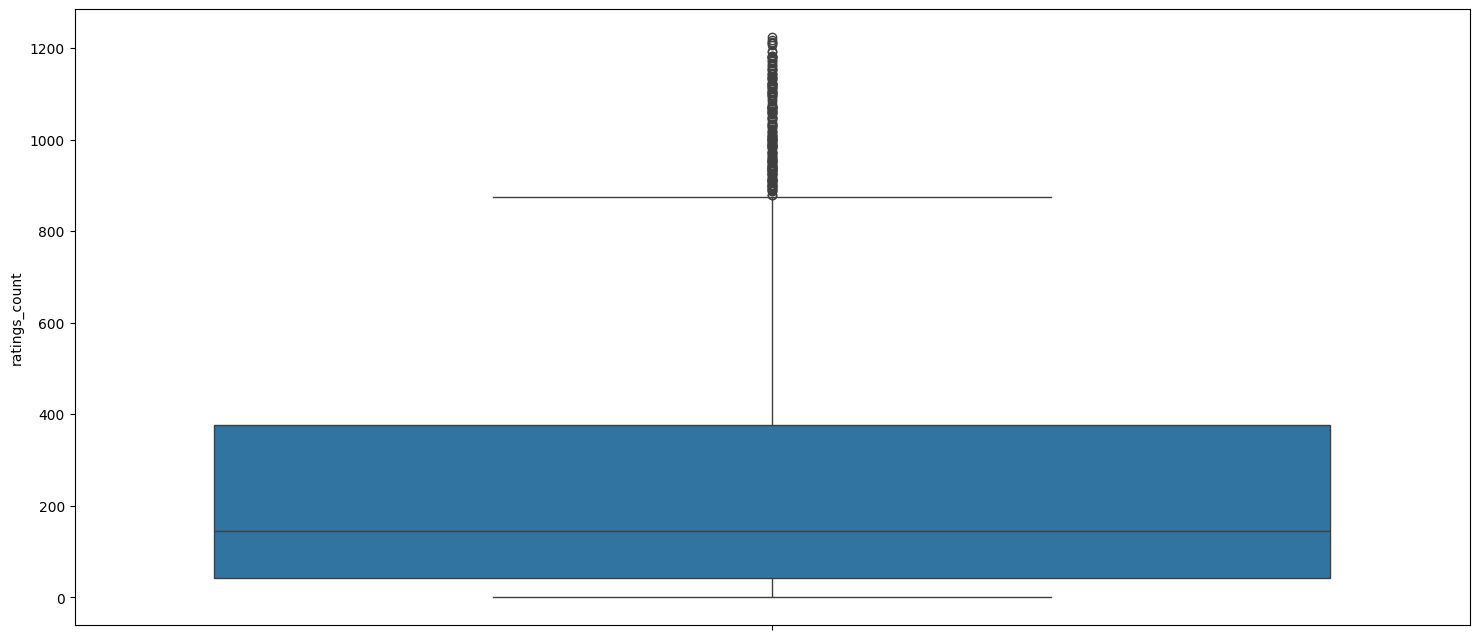

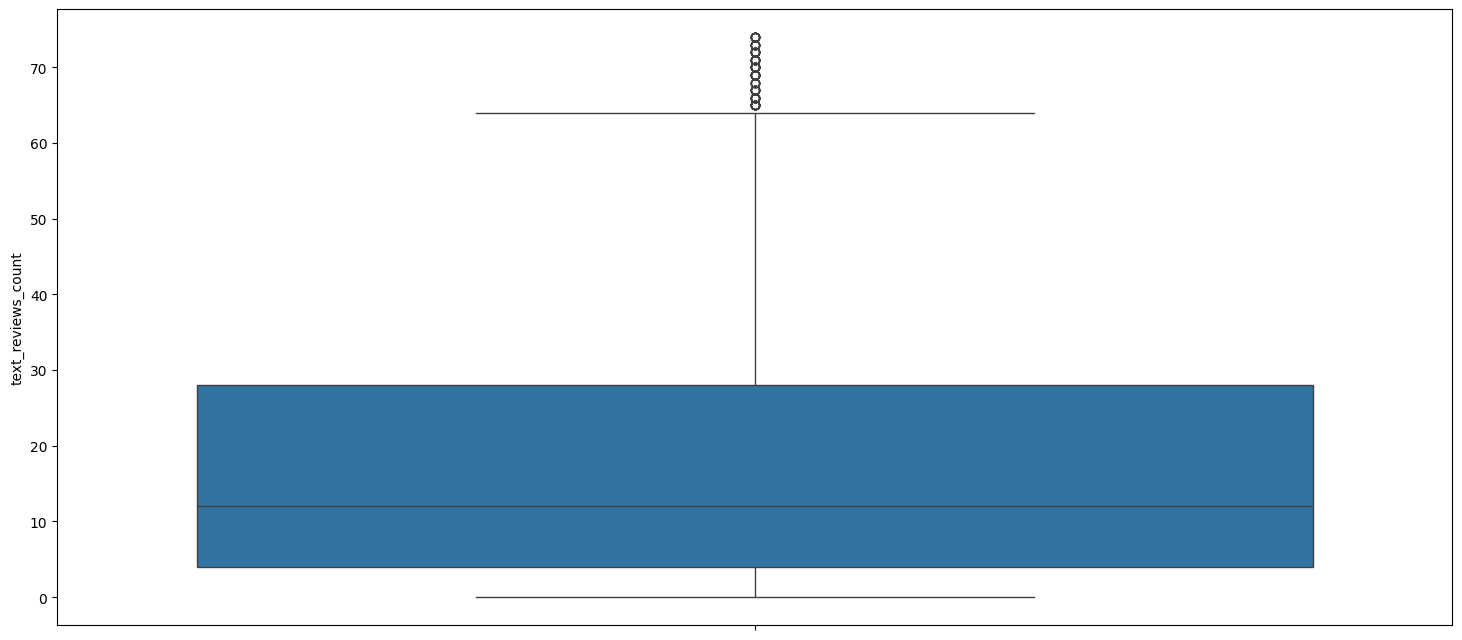

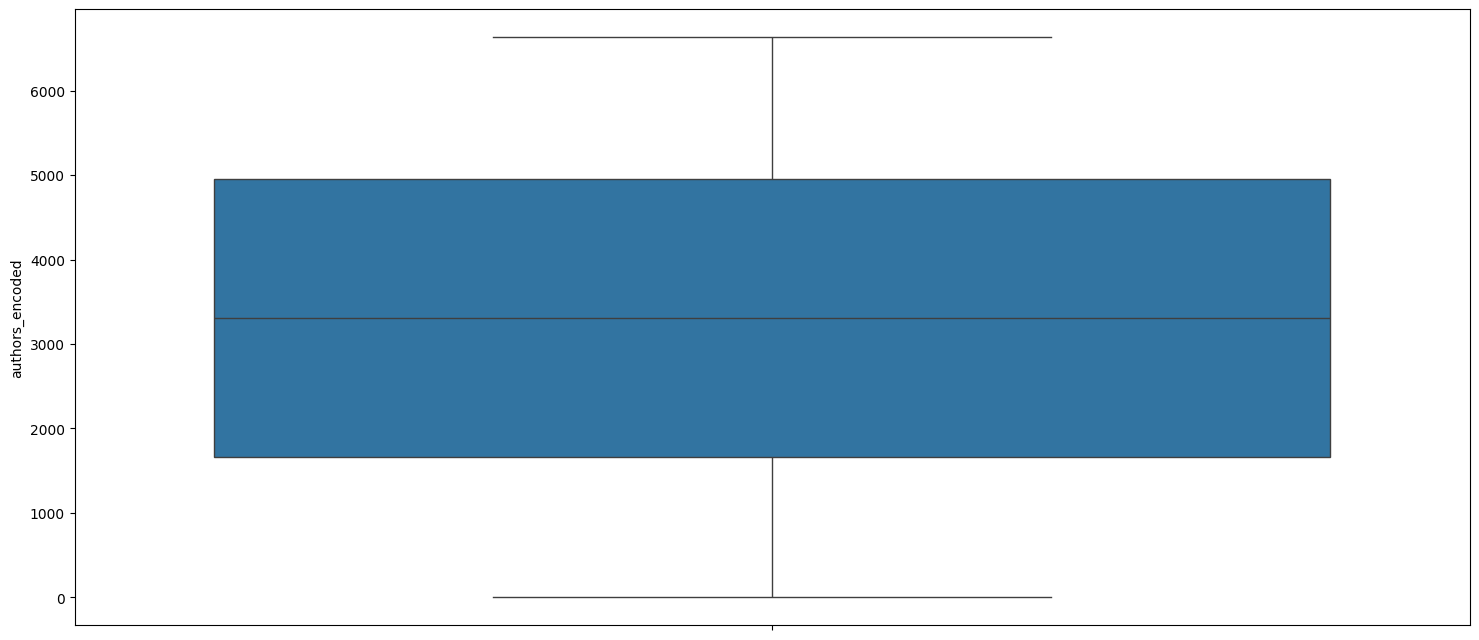

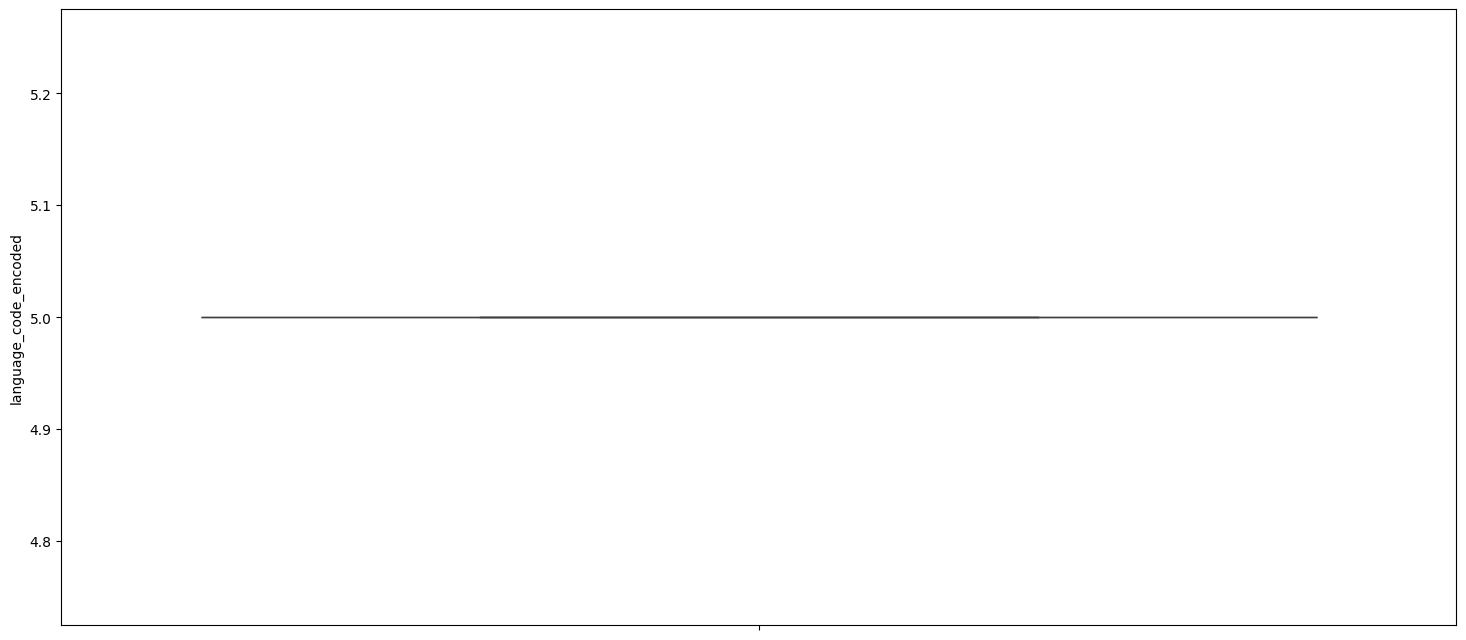

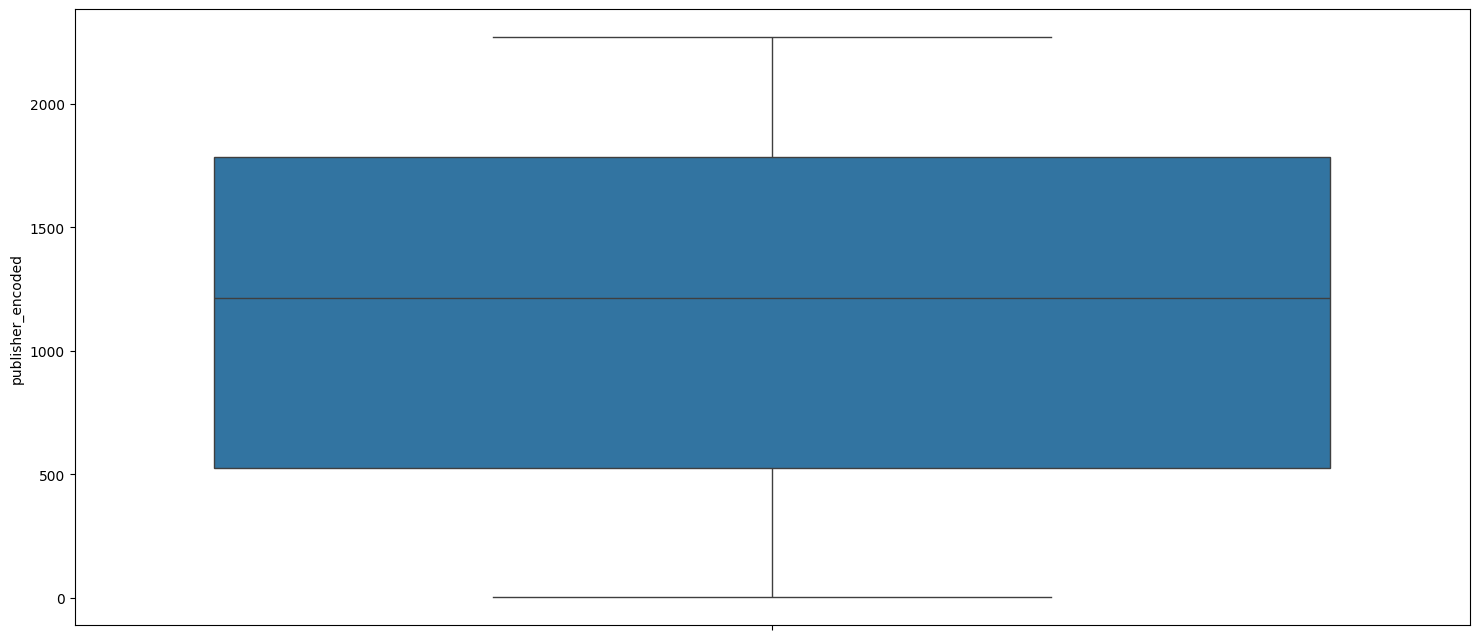

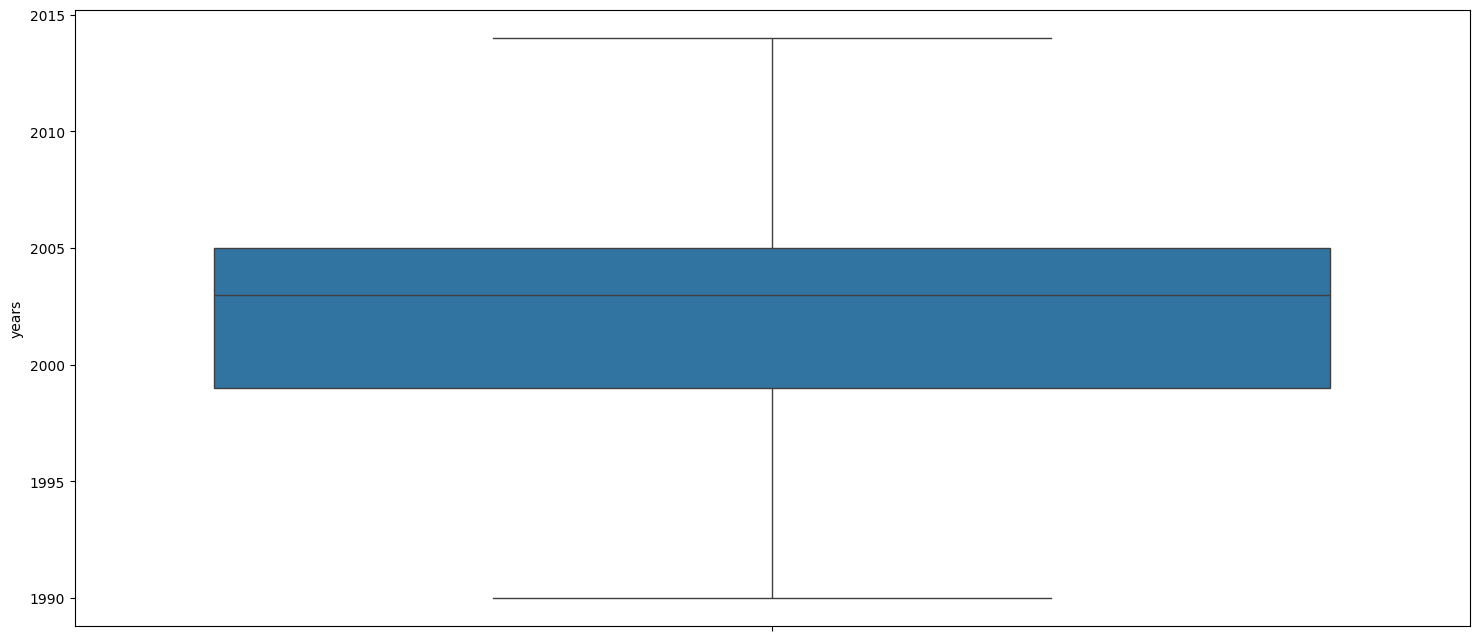

In [69]:
for column in df5:
    plt.figure(figsize=(18,8))
    sns.boxplot(df5[column])
    plt.show()

In [70]:
df6=remove_outliers(df5,['  num_pages','ratings_count','text_reviews_count'])

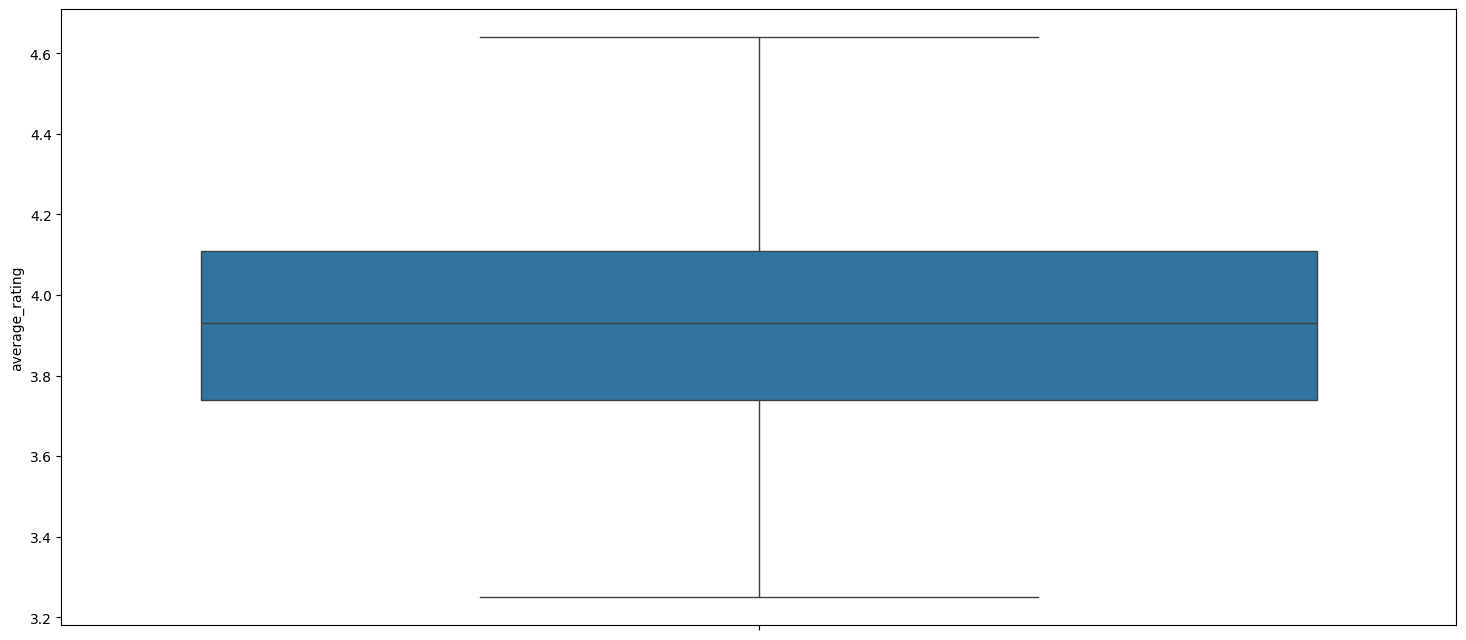

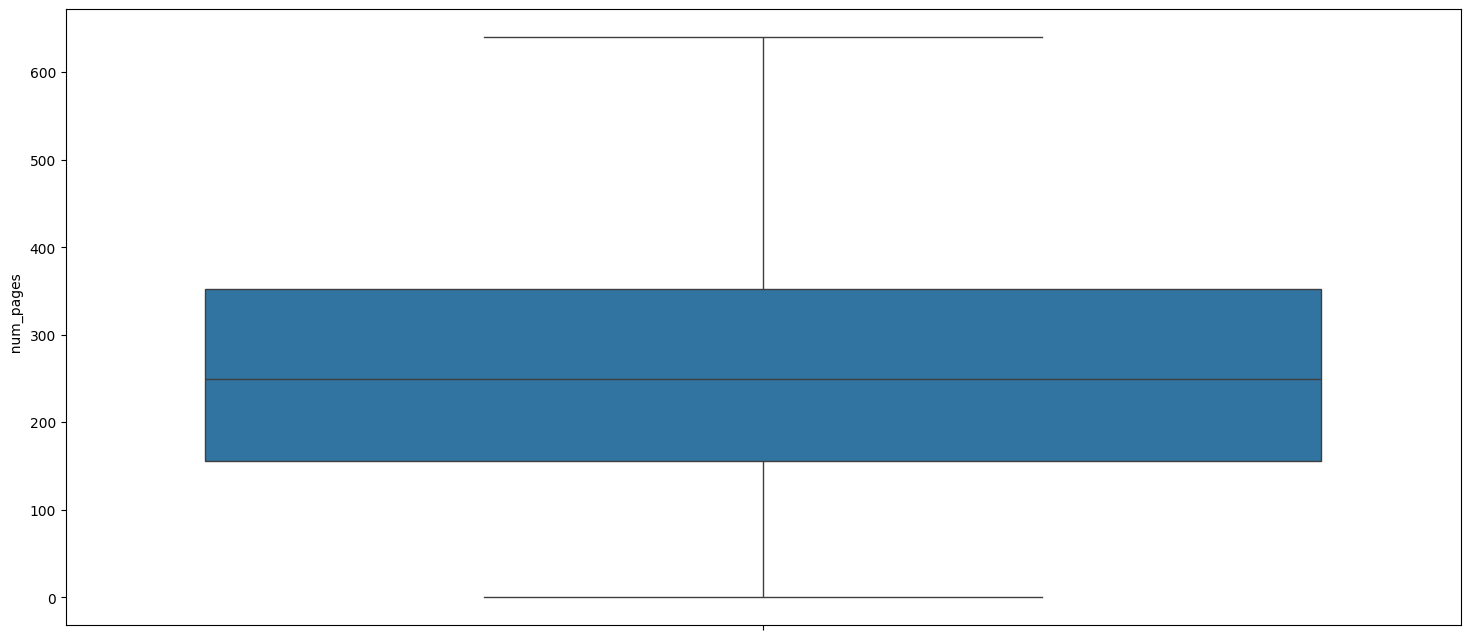

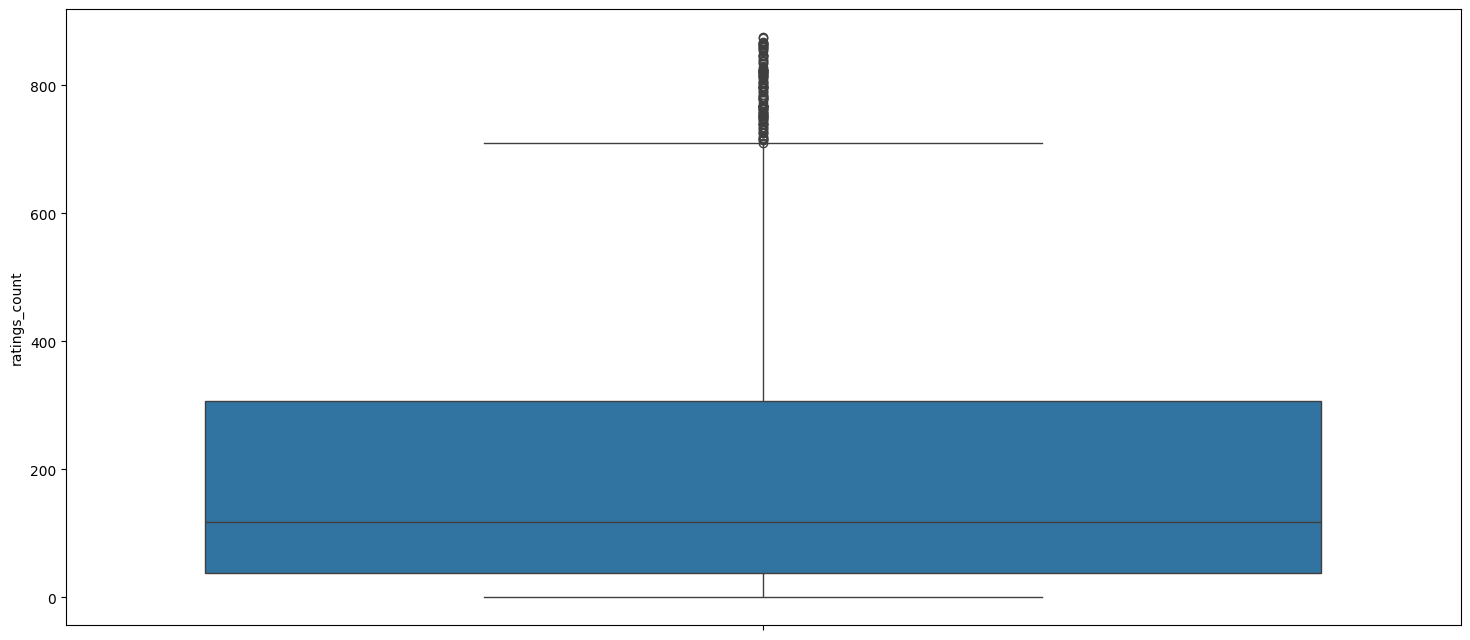

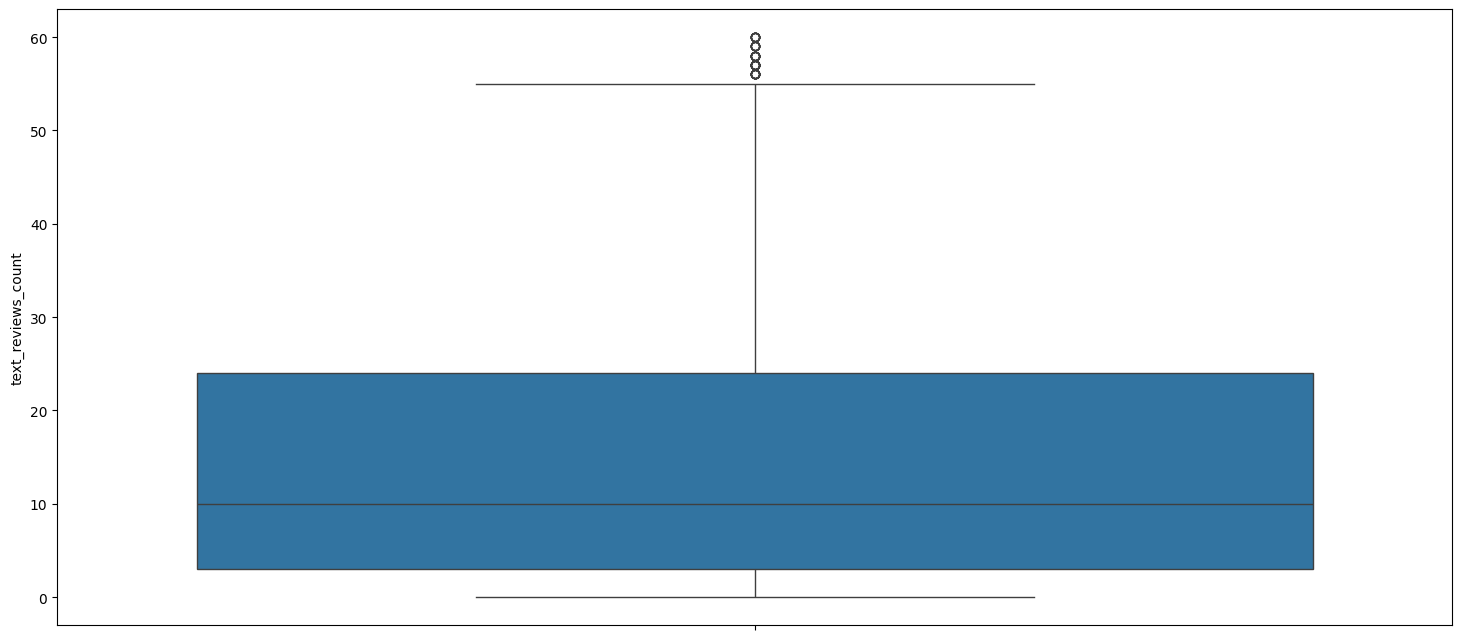

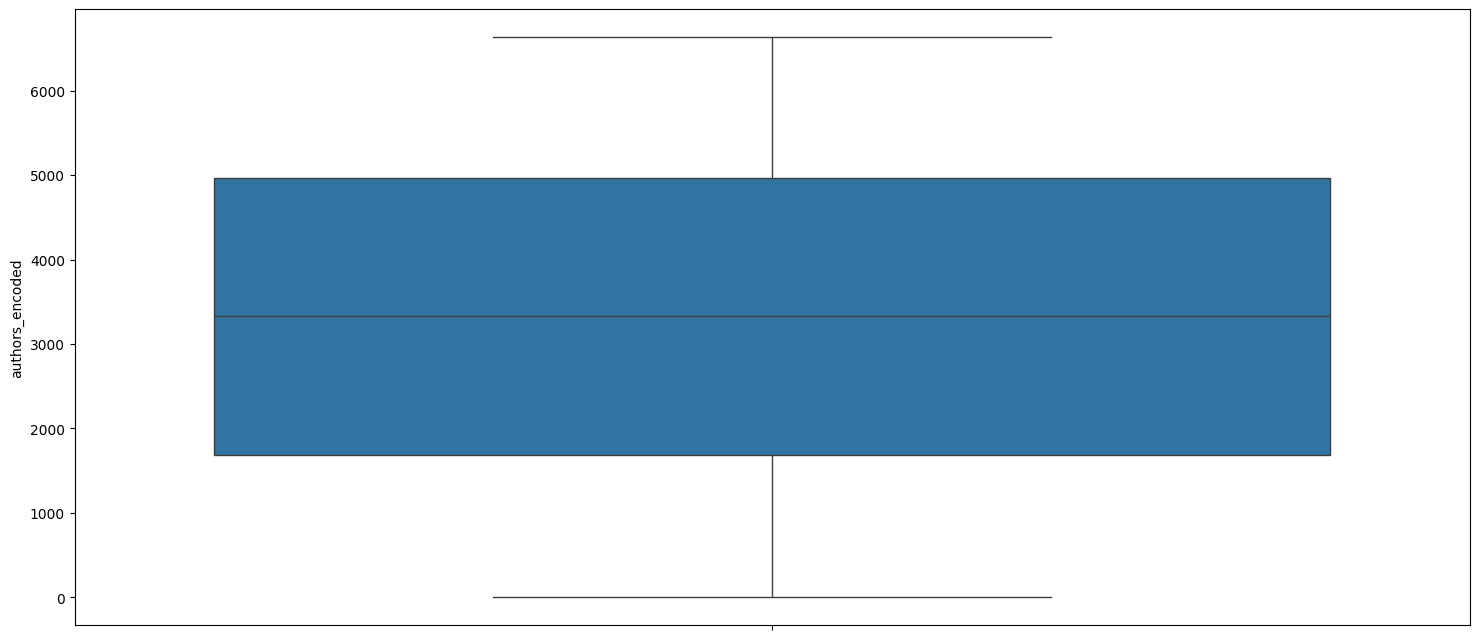

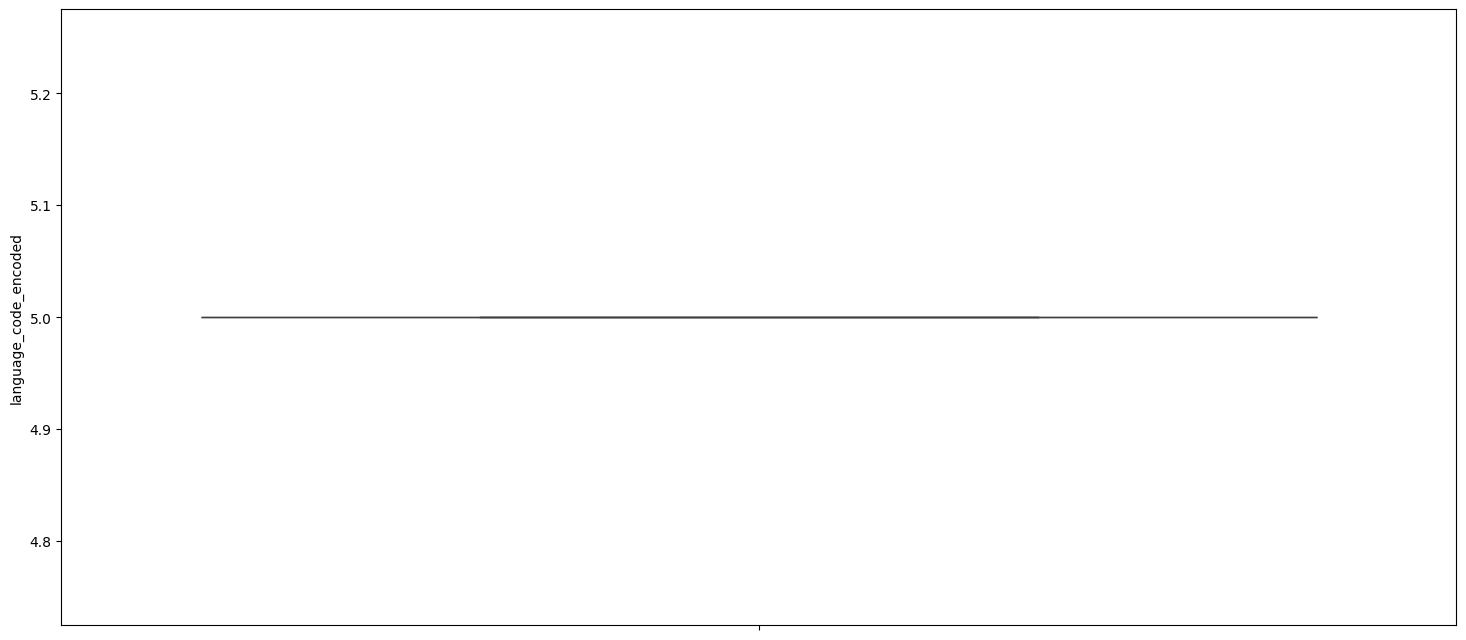

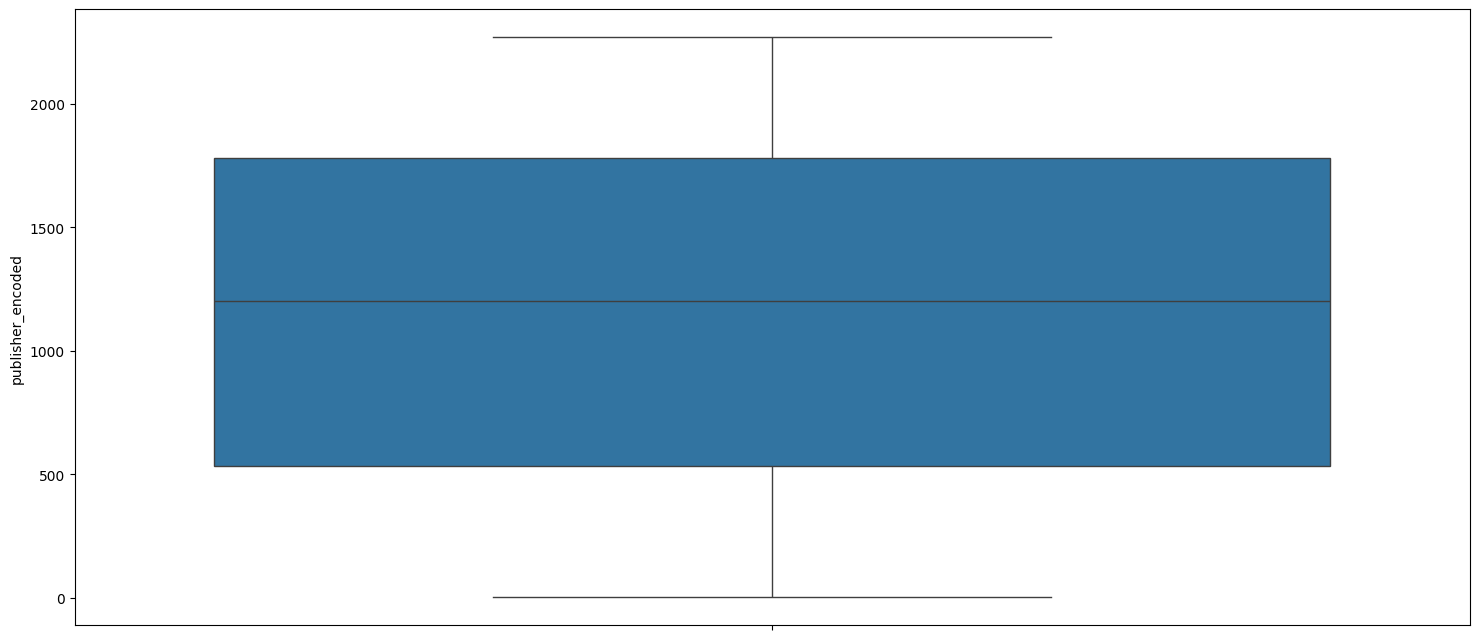

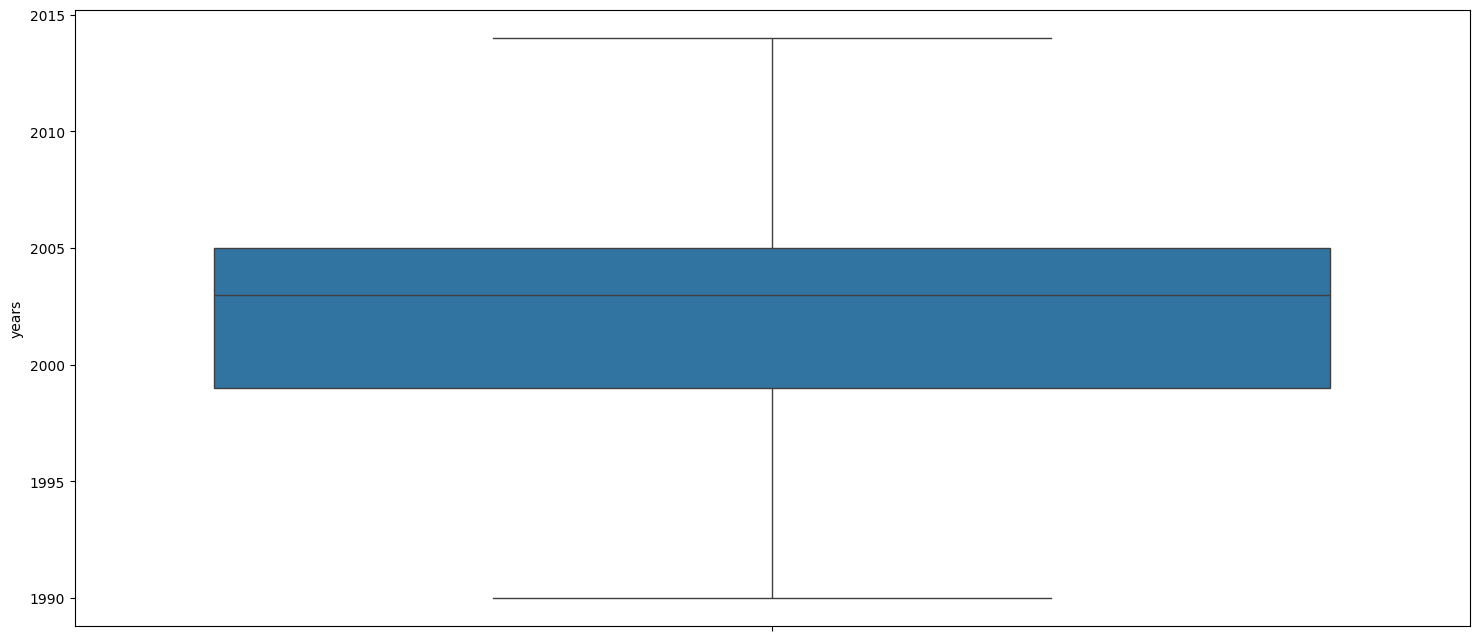

In [71]:
for column in df6:
    plt.figure(figsize=(18,8))
    sns.boxplot(df6[column])
    plt.show()

In [72]:
df7=remove_outliers(df6,['ratings_count','text_reviews_count'])

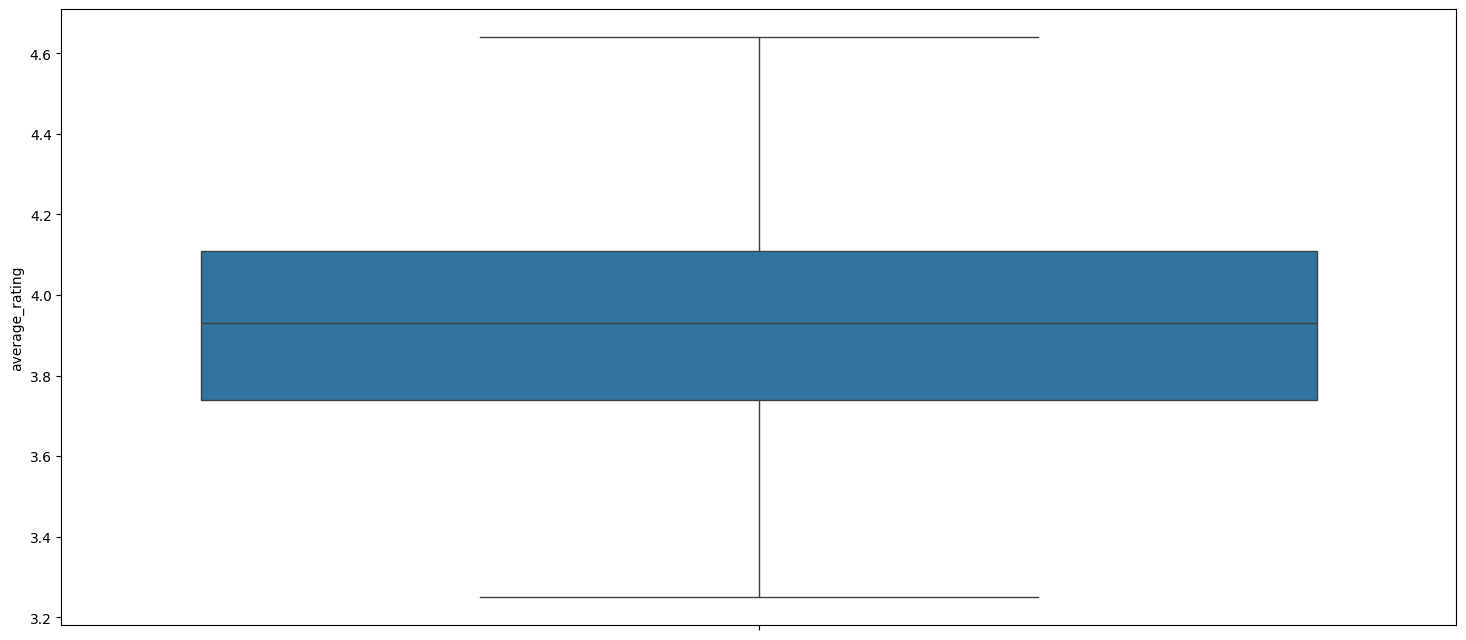

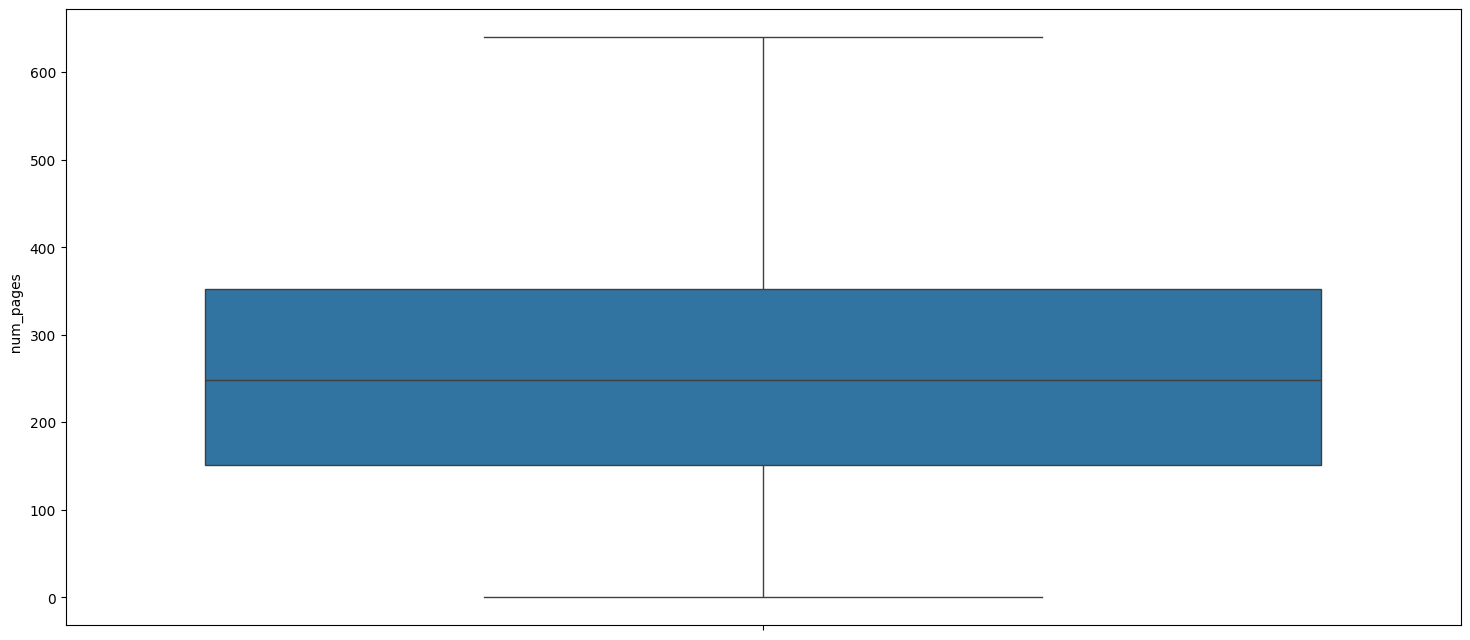

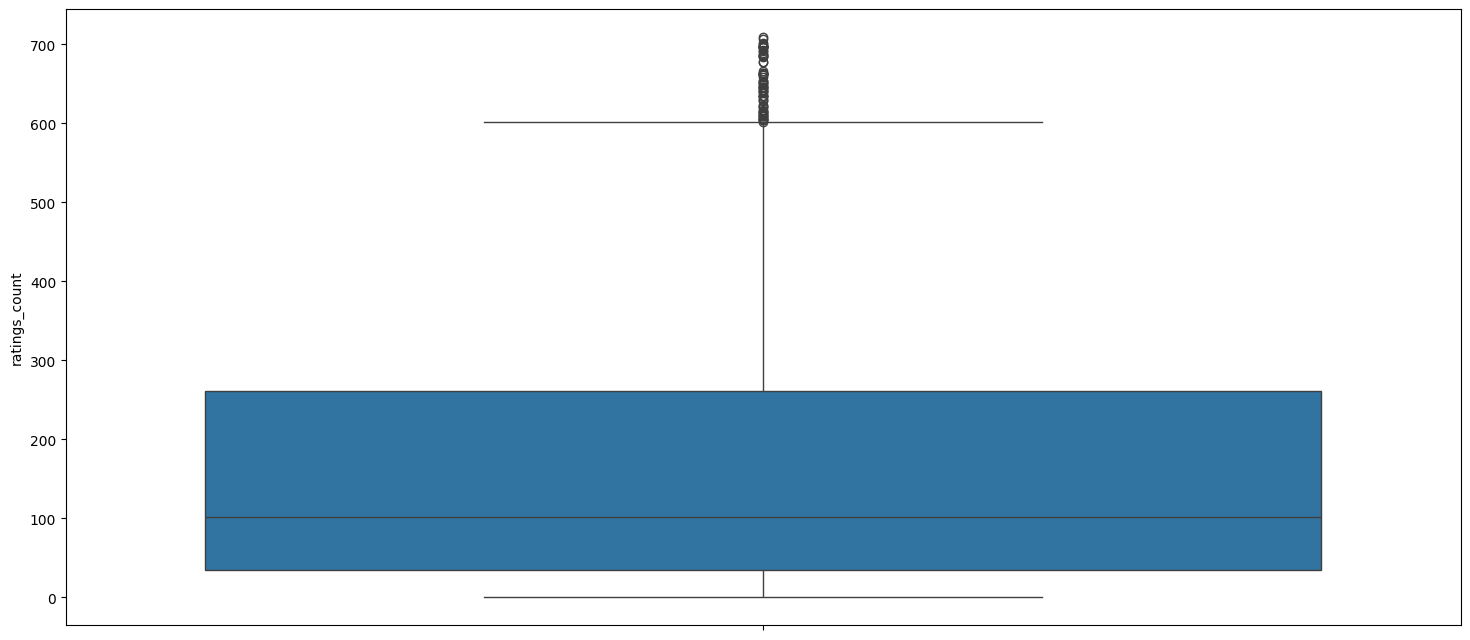

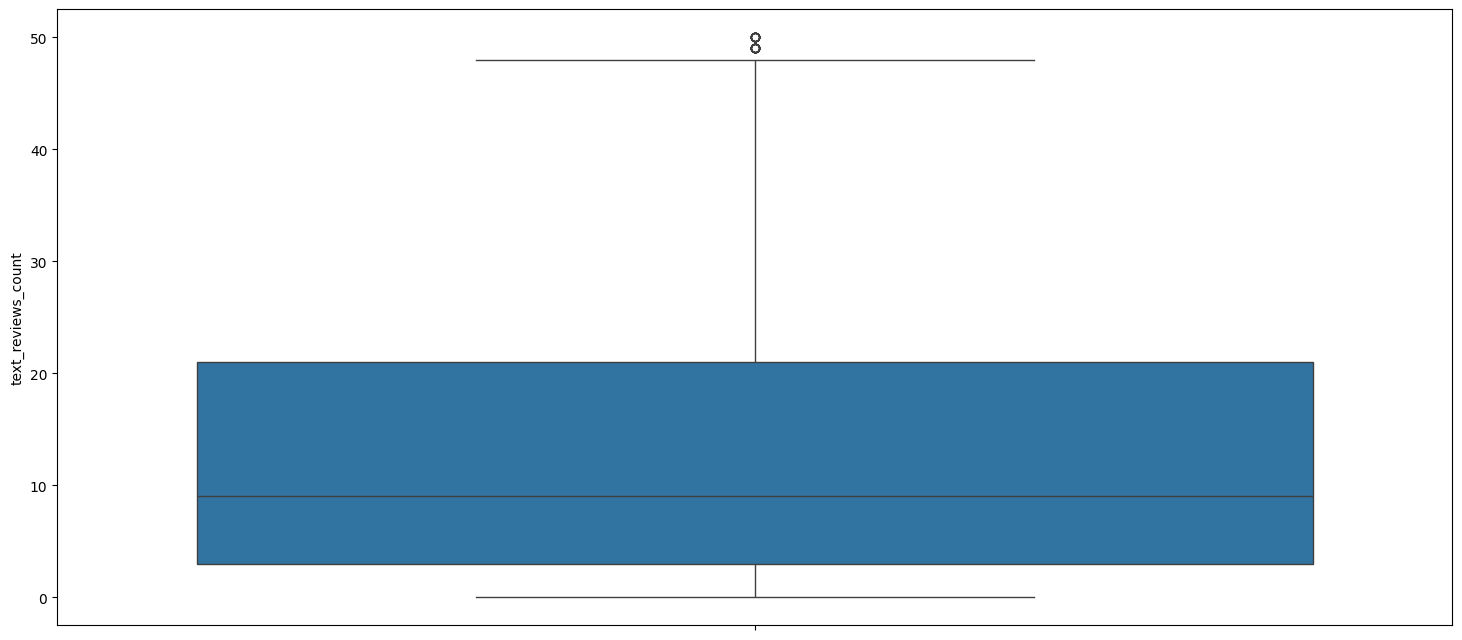

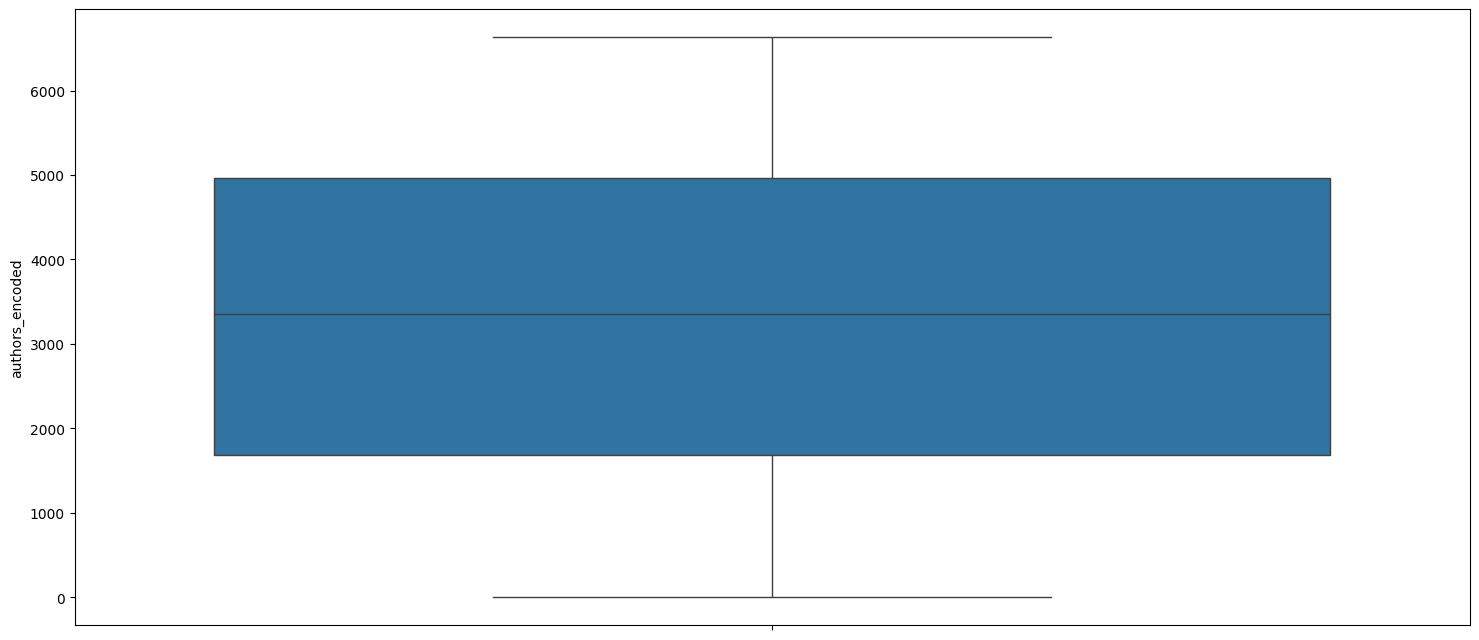

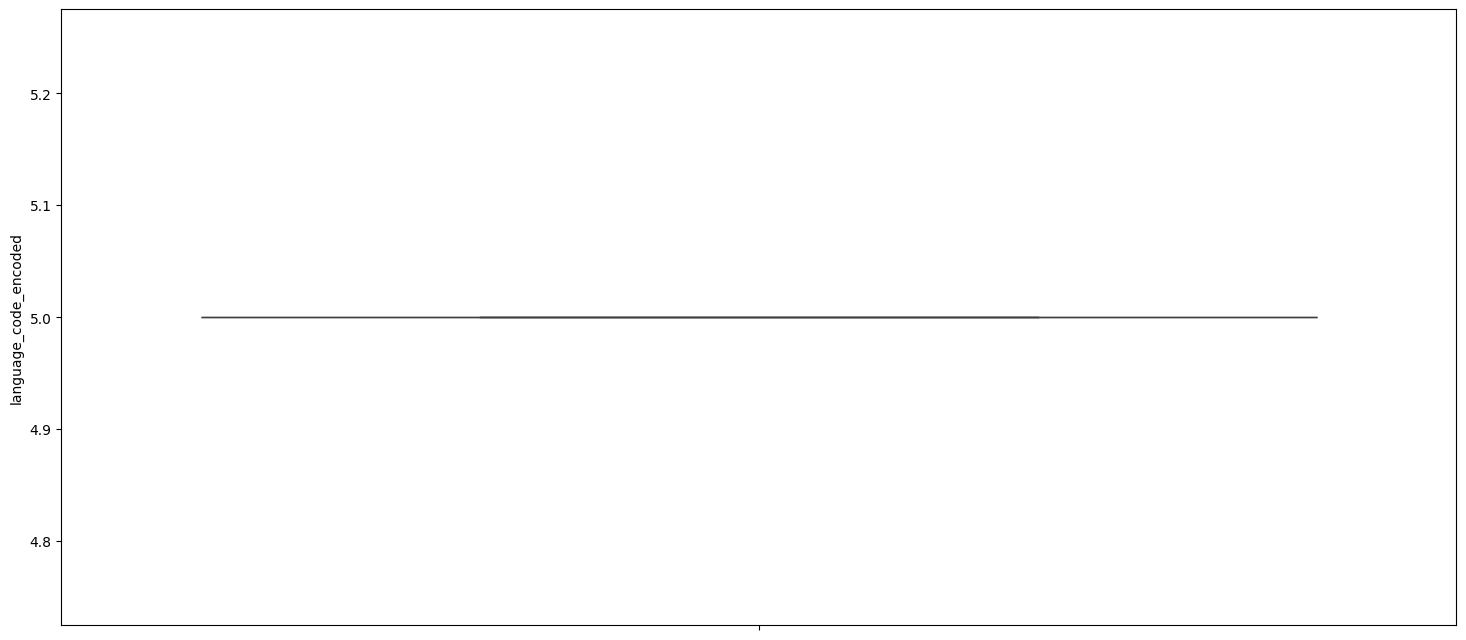

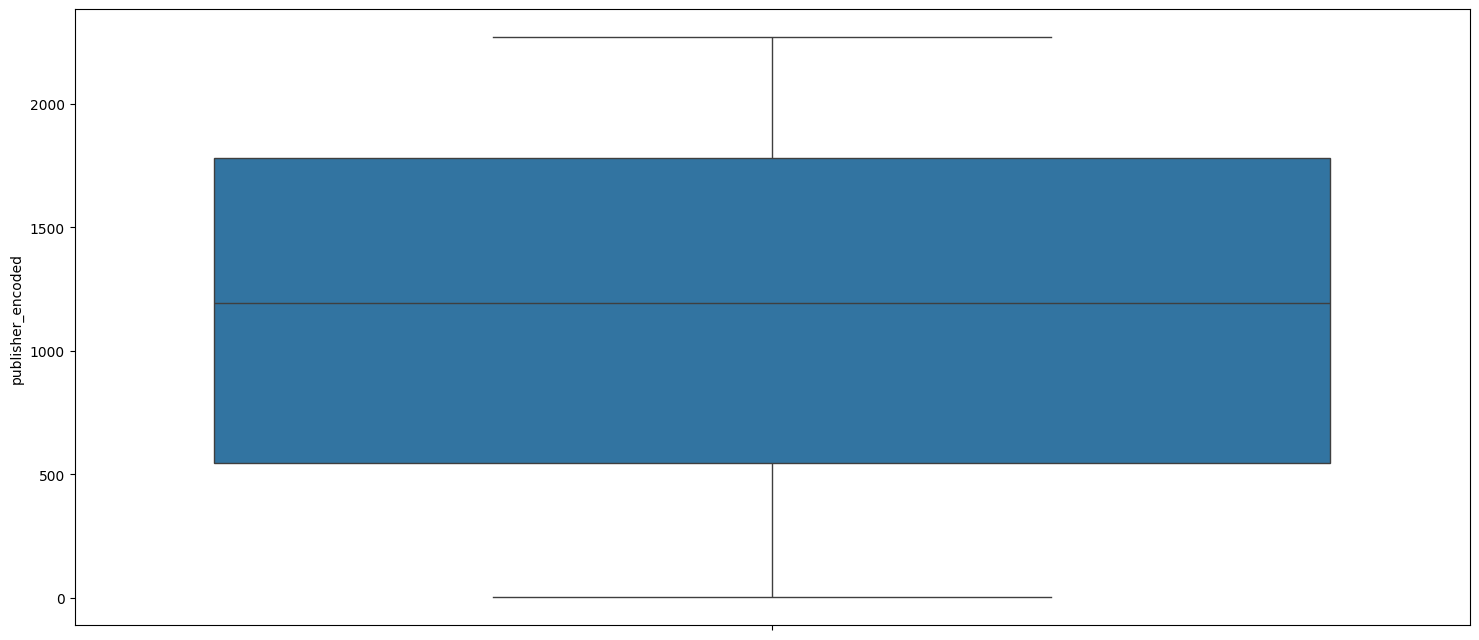

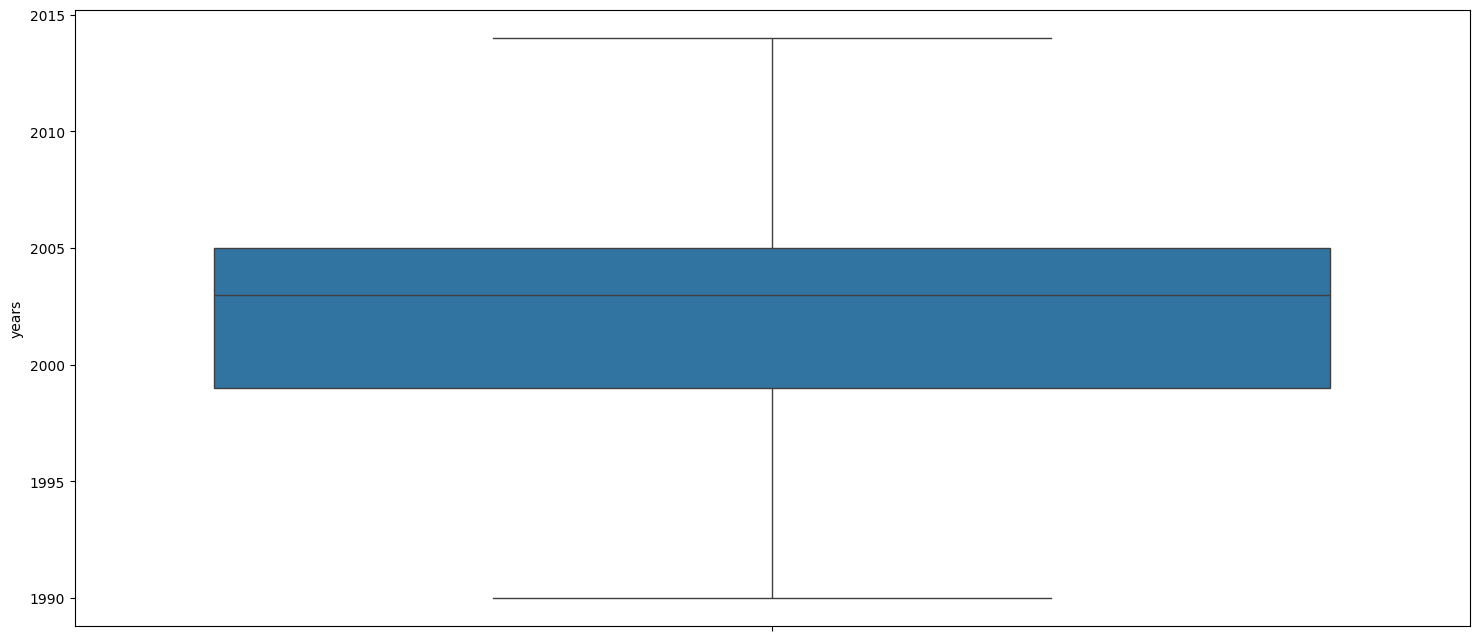

In [73]:
for column in df7:
    plt.figure(figsize=(18,8))
    sns.boxplot(df7[column])
    plt.show()

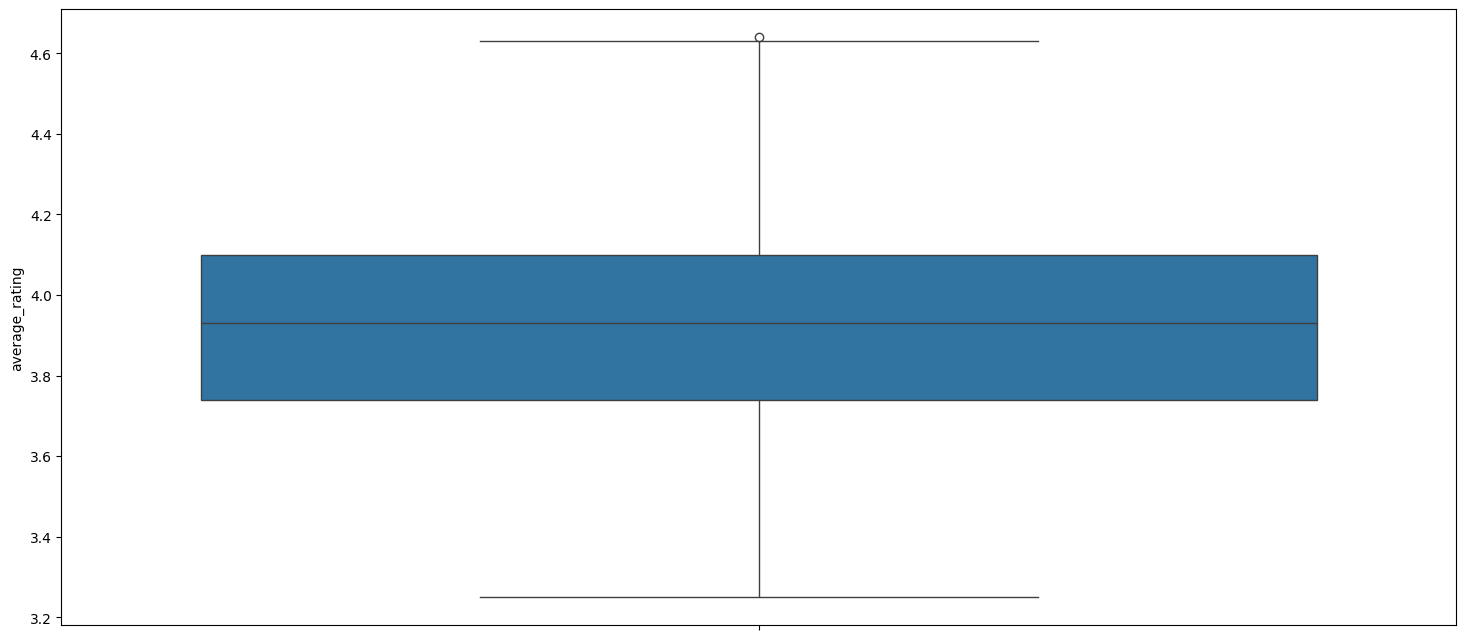

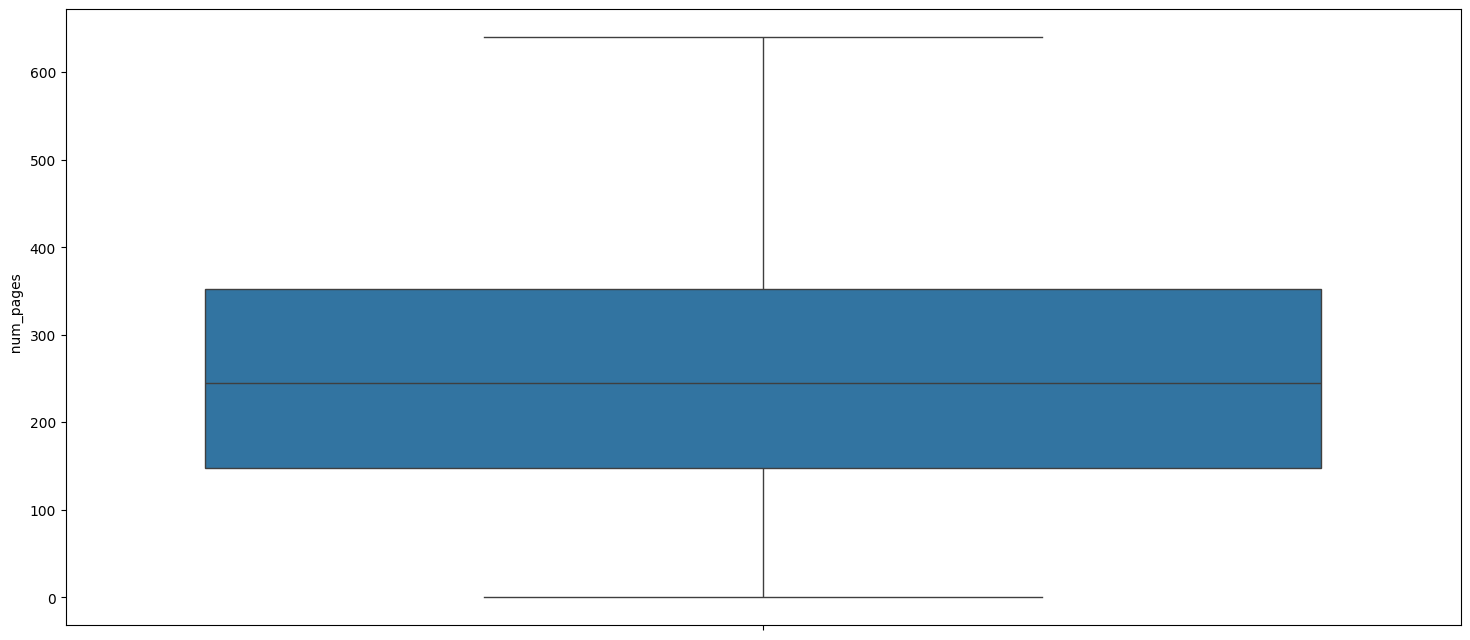

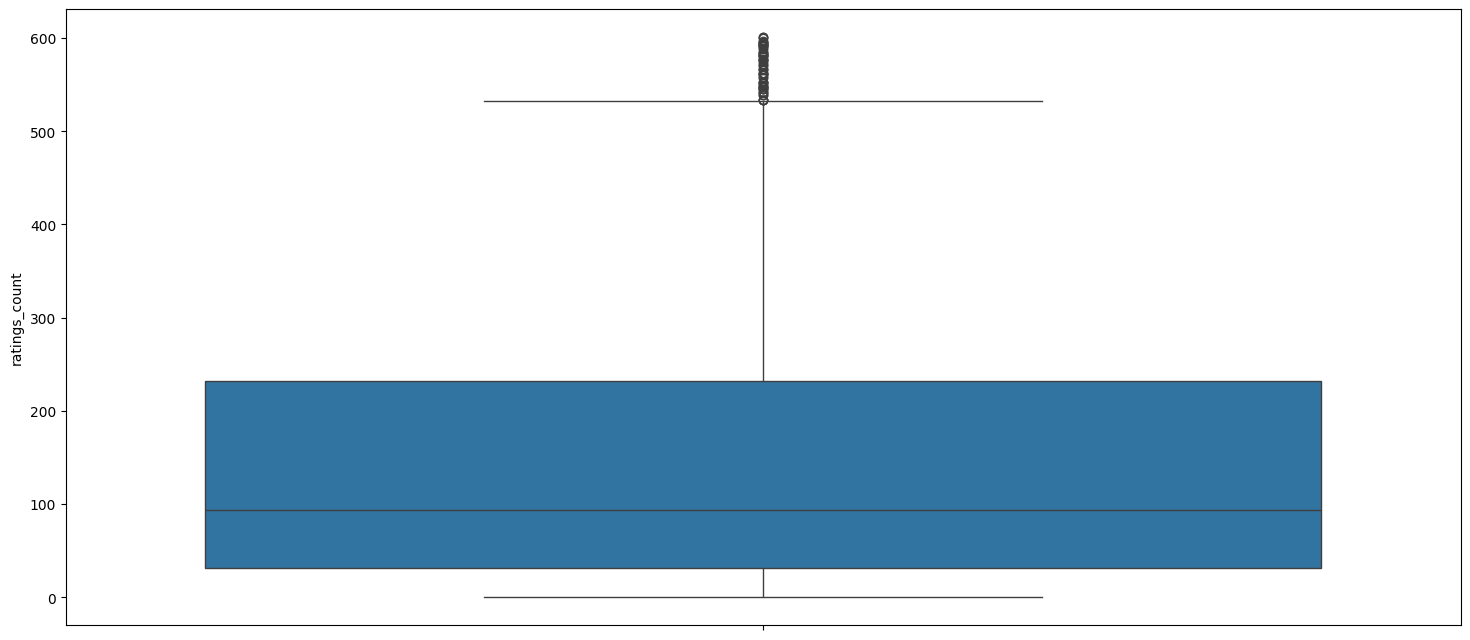

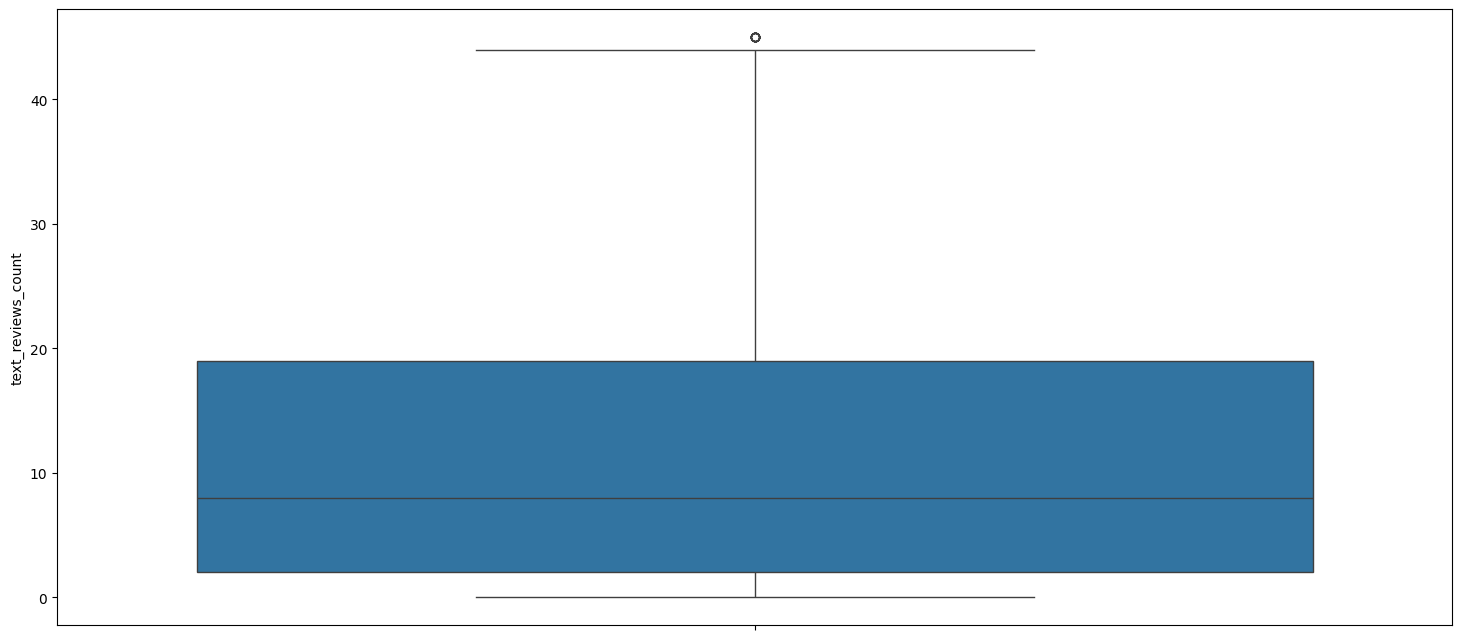

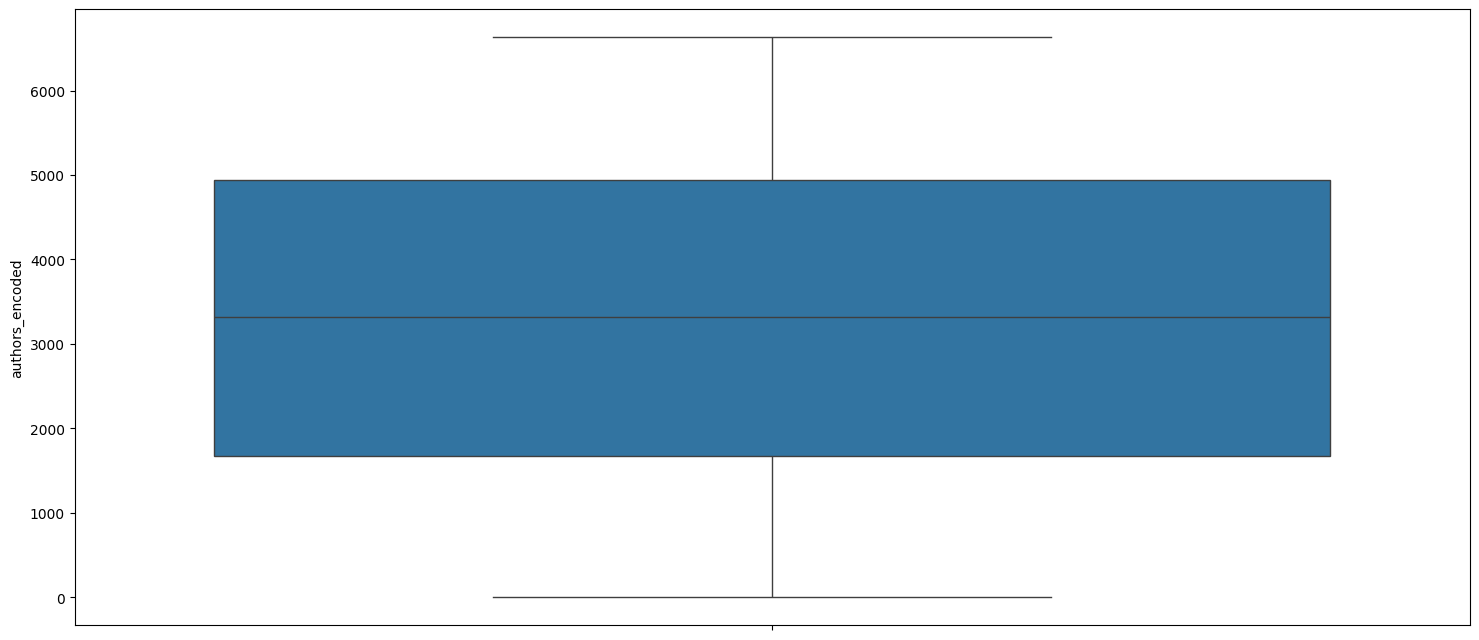

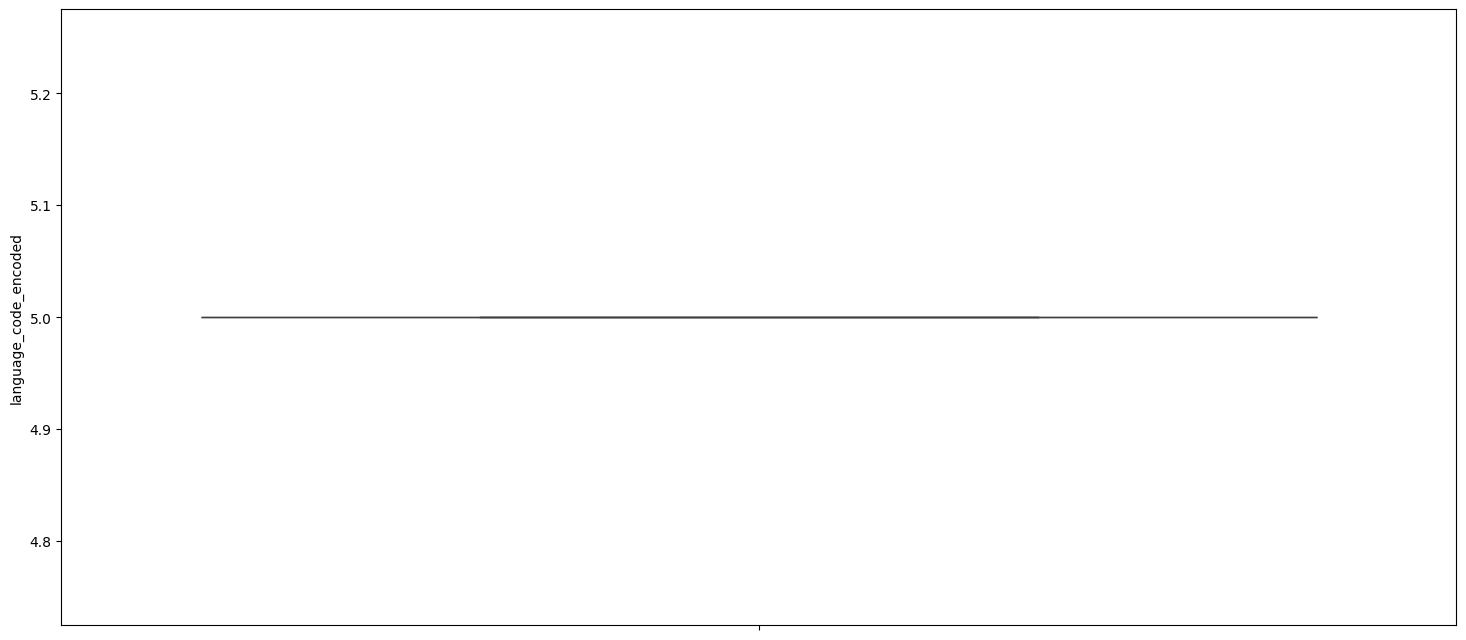

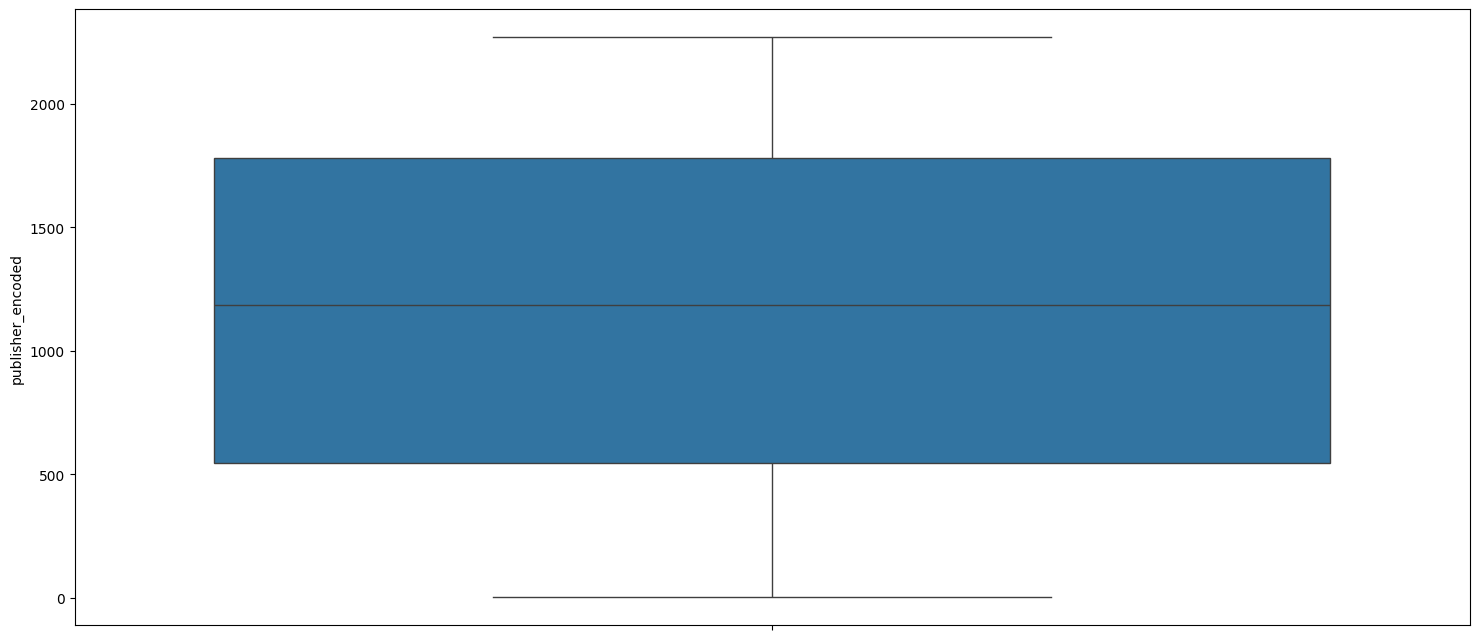

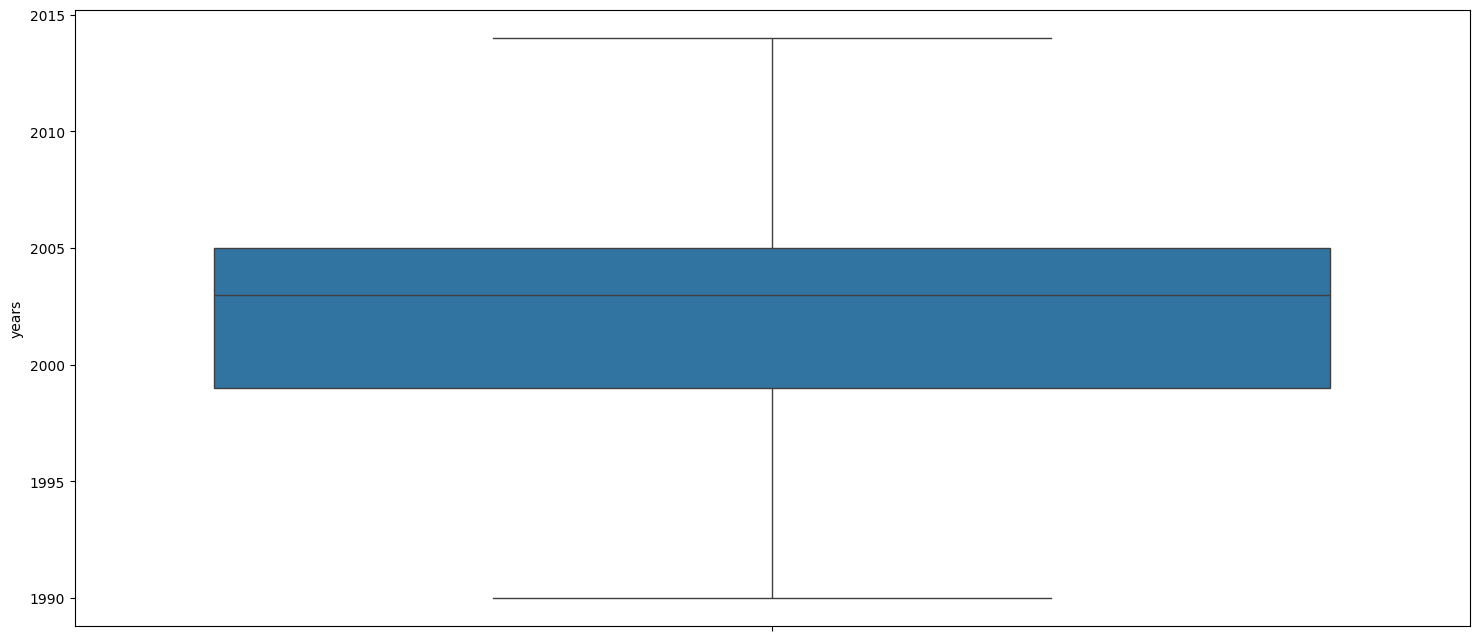

In [74]:
df7=remove_outliers(df7,['ratings_count','text_reviews_count'])
for column in df7:
    plt.figure(figsize=(18,8))
    sns.boxplot(df7[column])
    plt.show()

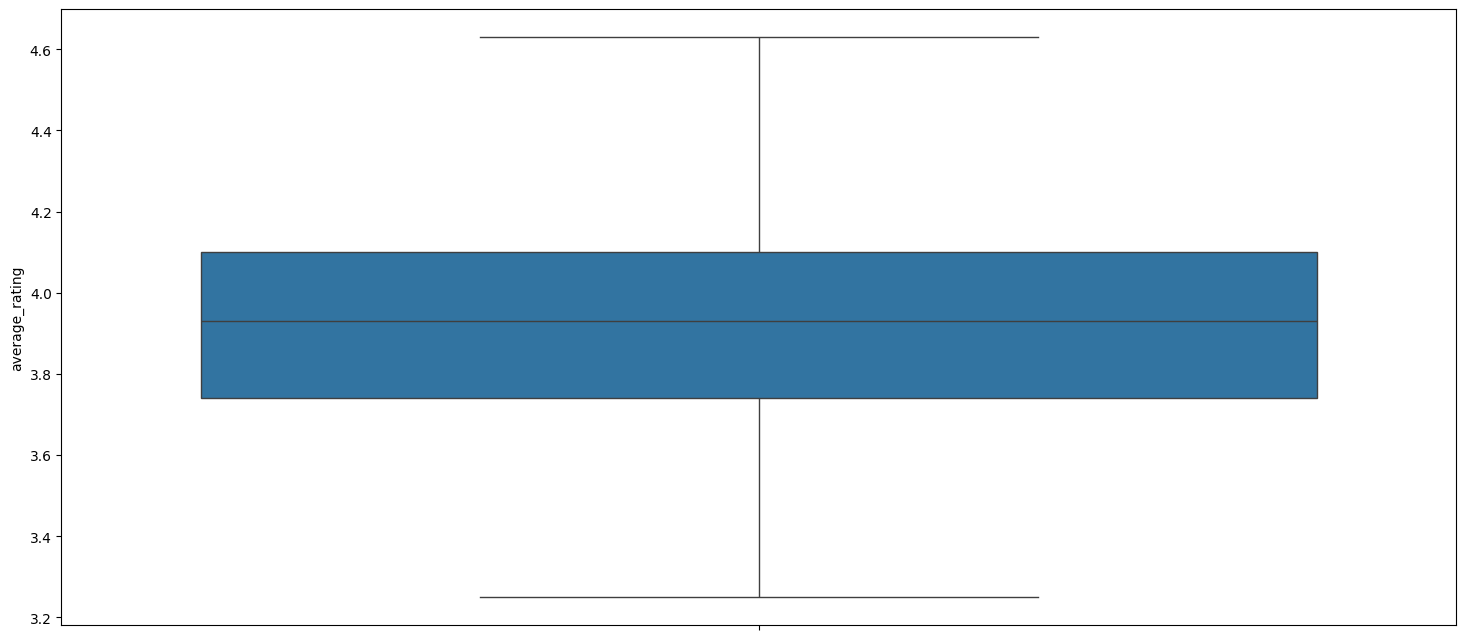

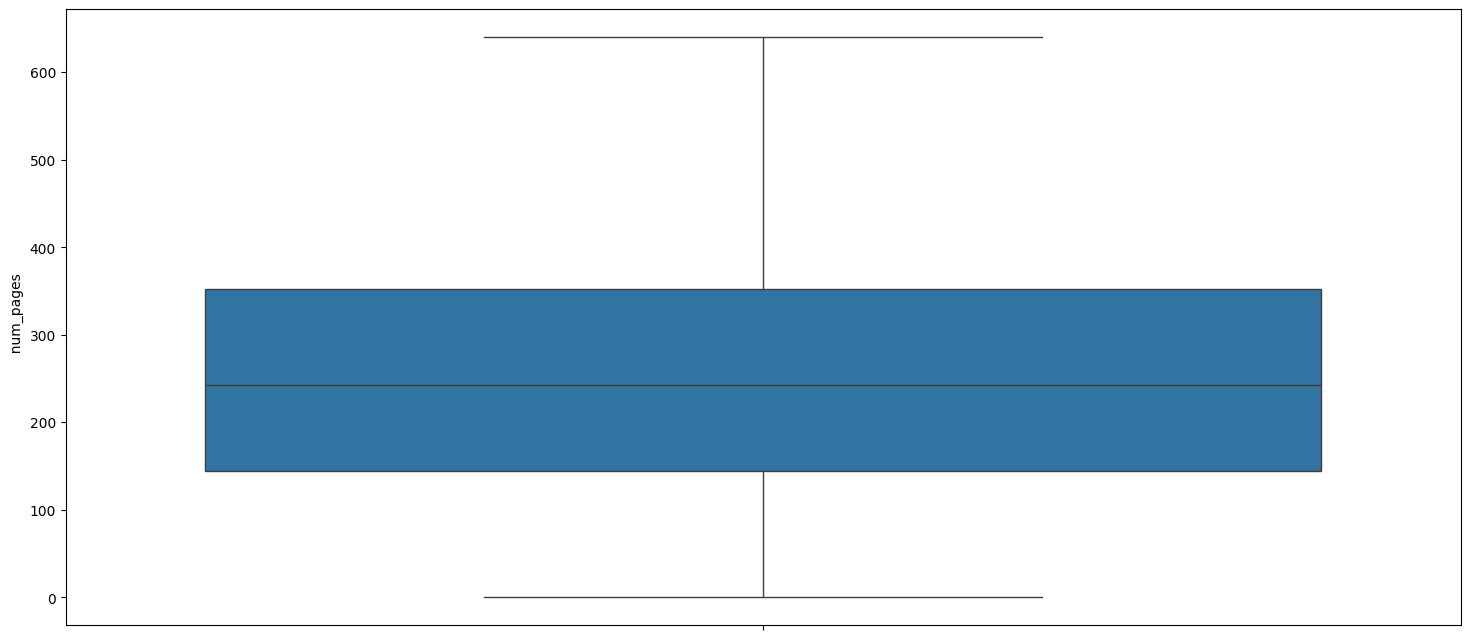

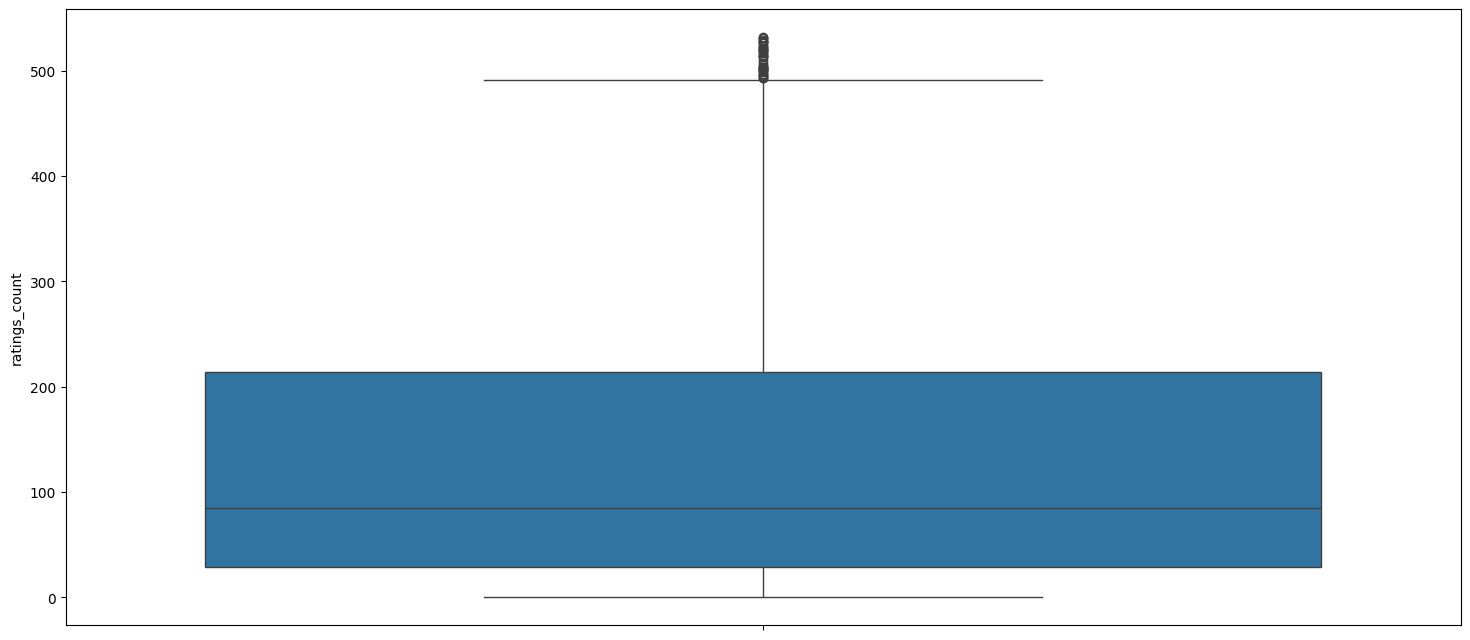

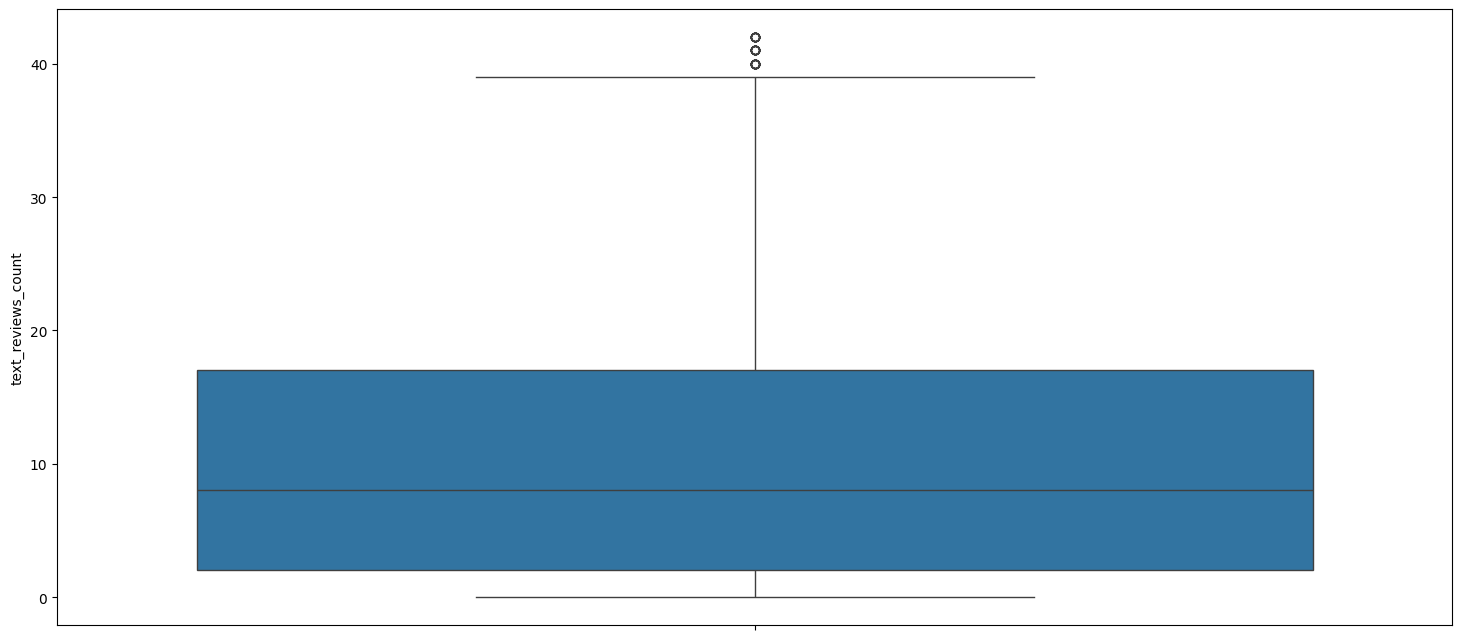

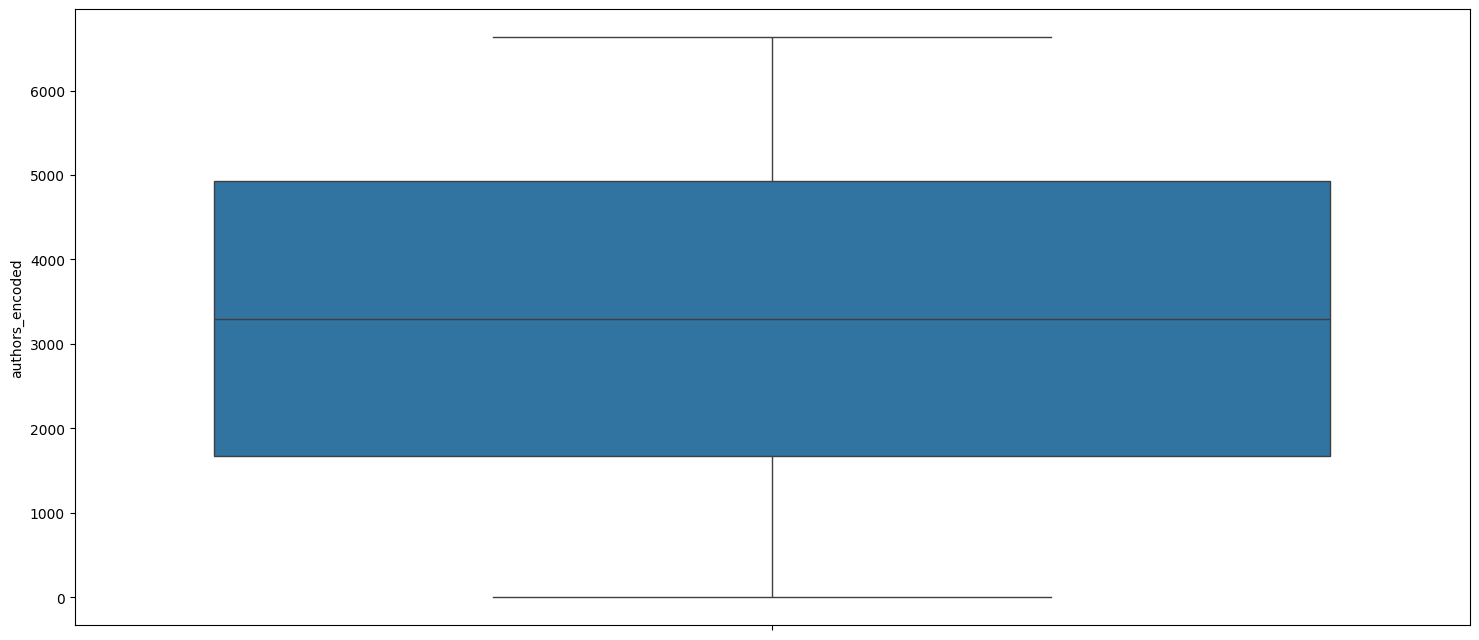

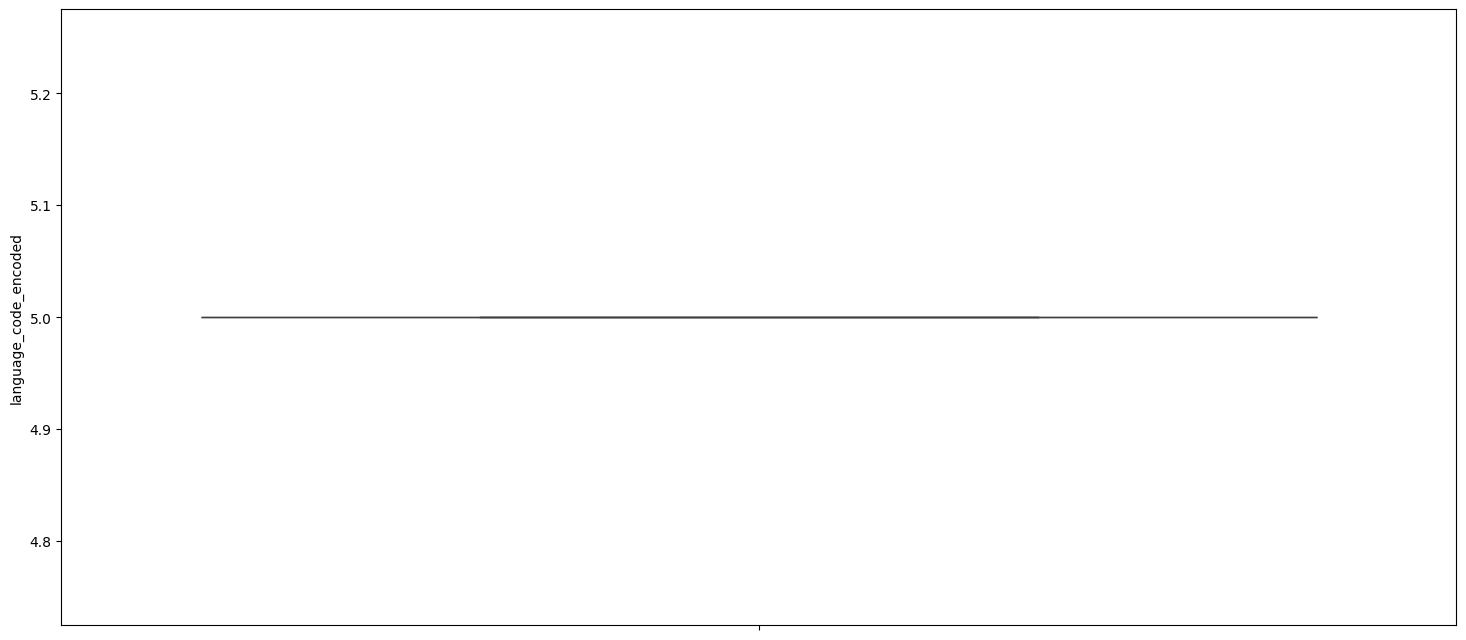

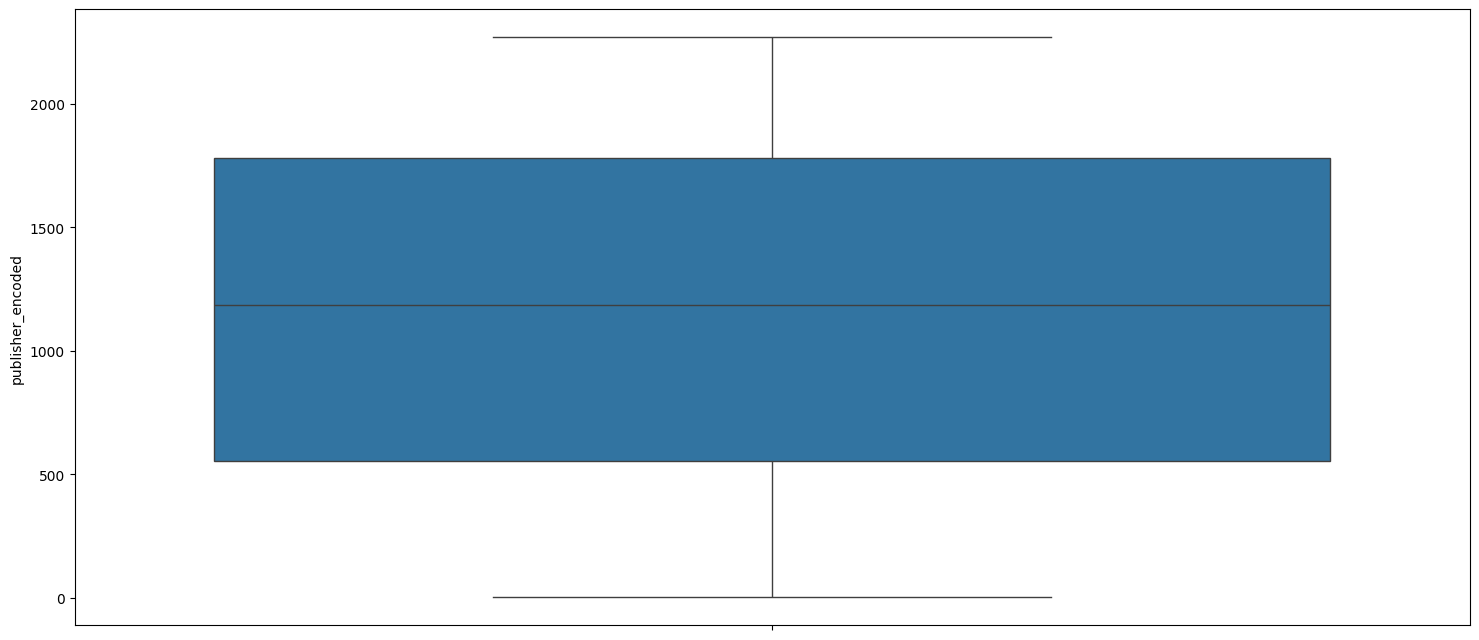

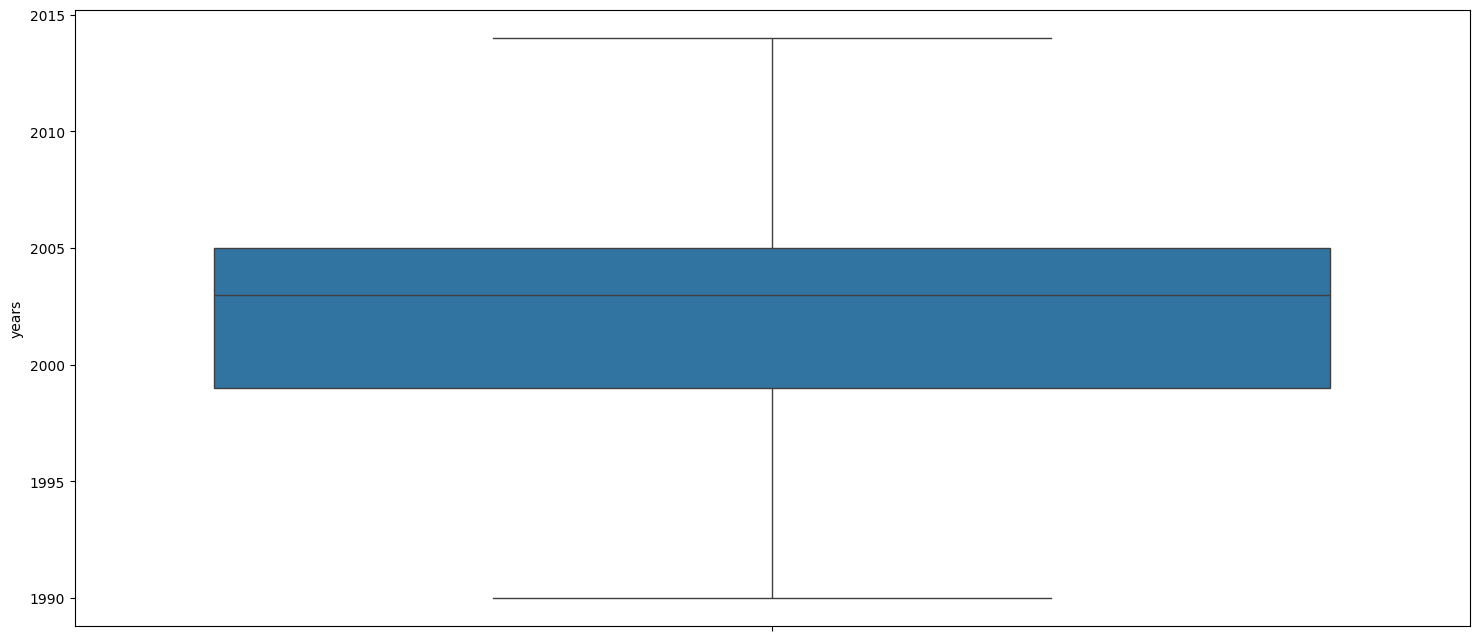

In [75]:
df7=remove_outliers(df7,['average_rating','ratings_count','text_reviews_count'])
for column in df7:
    plt.figure(figsize=(18,8))
    sns.boxplot(df7[column])
    plt.show()

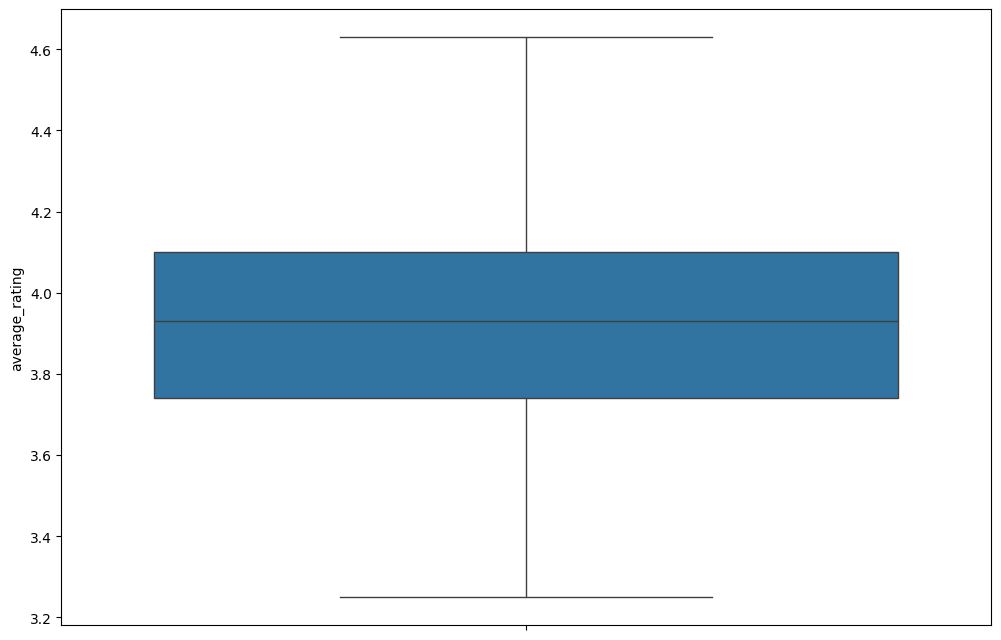

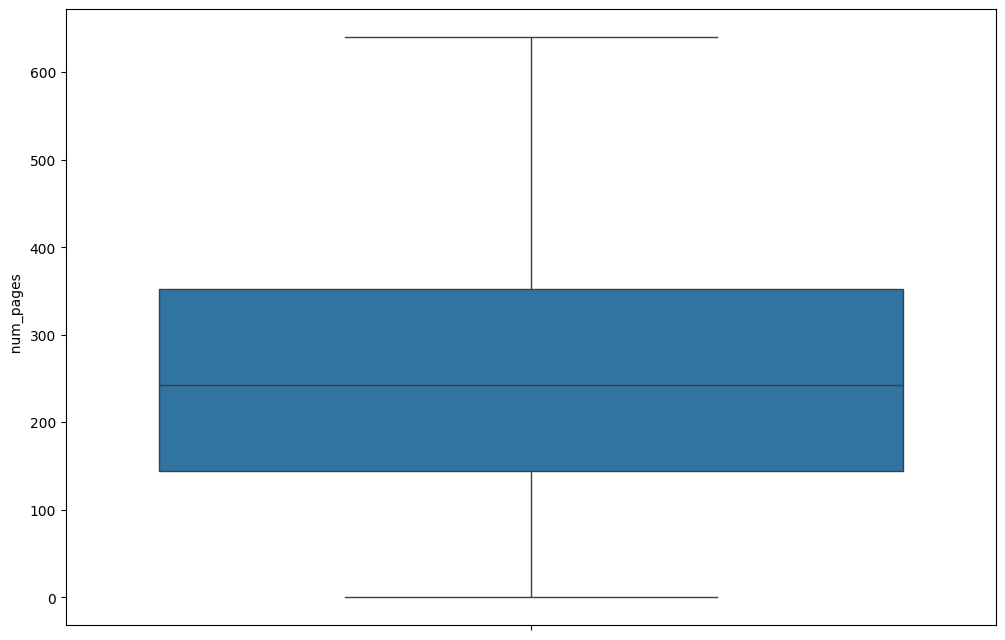

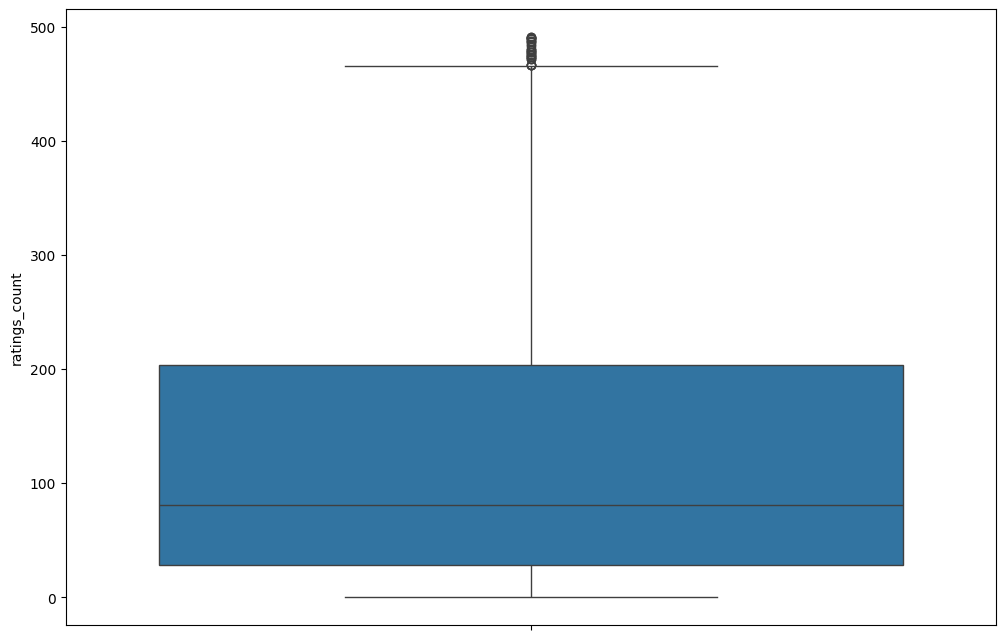

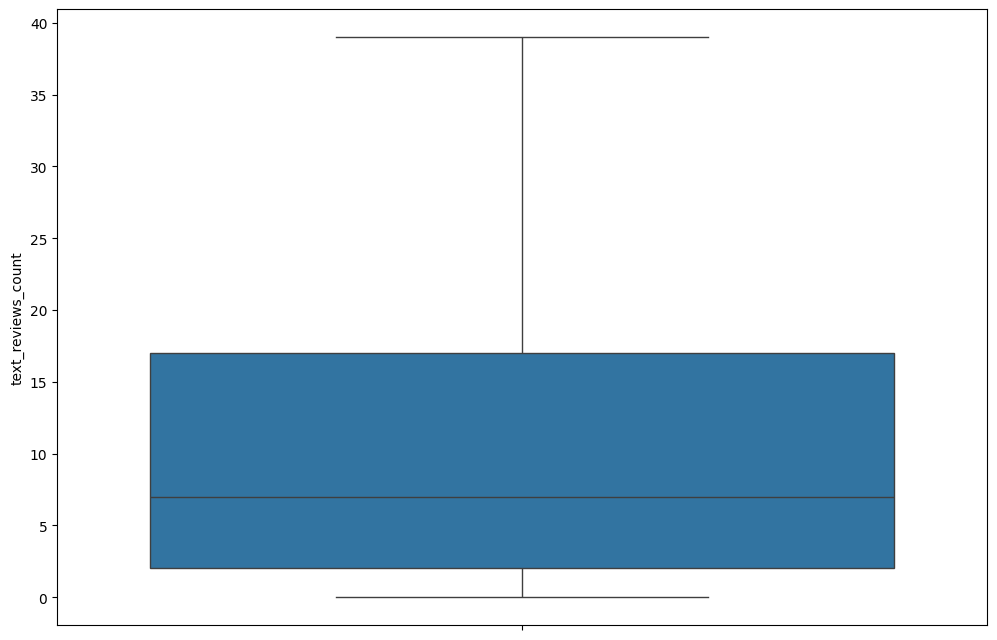

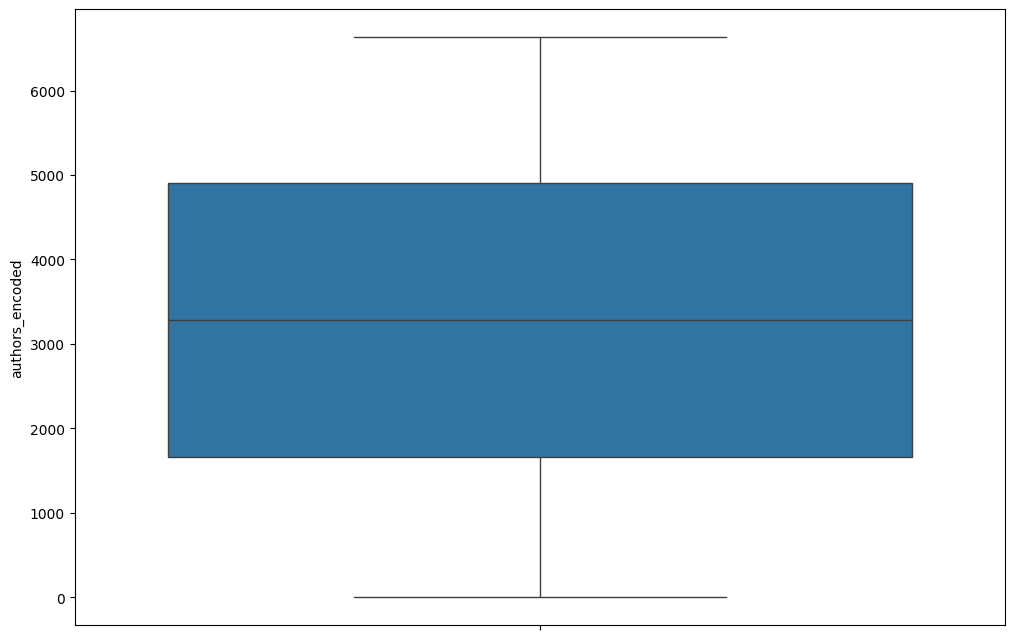

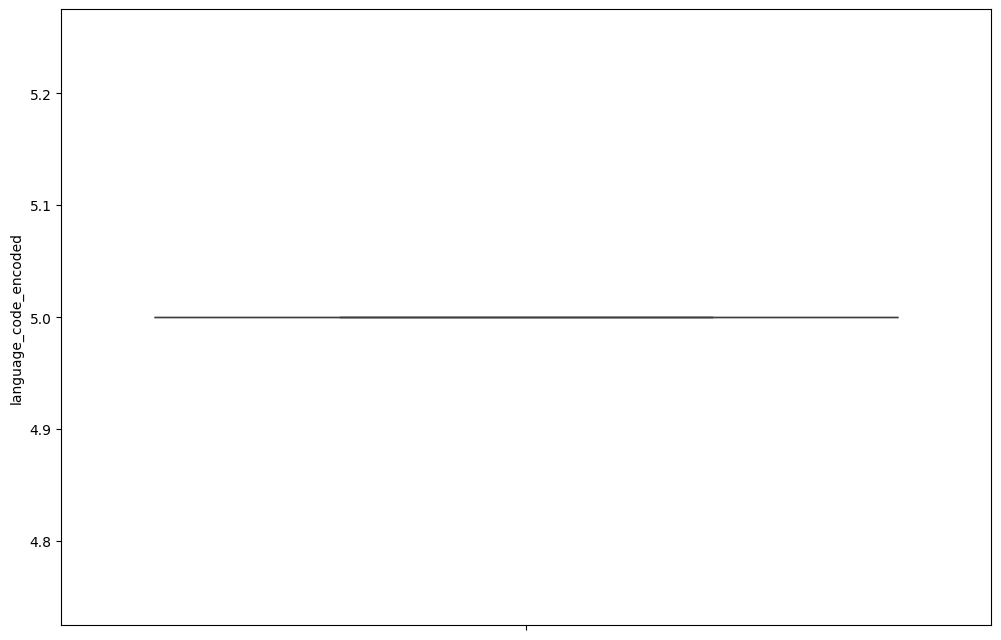

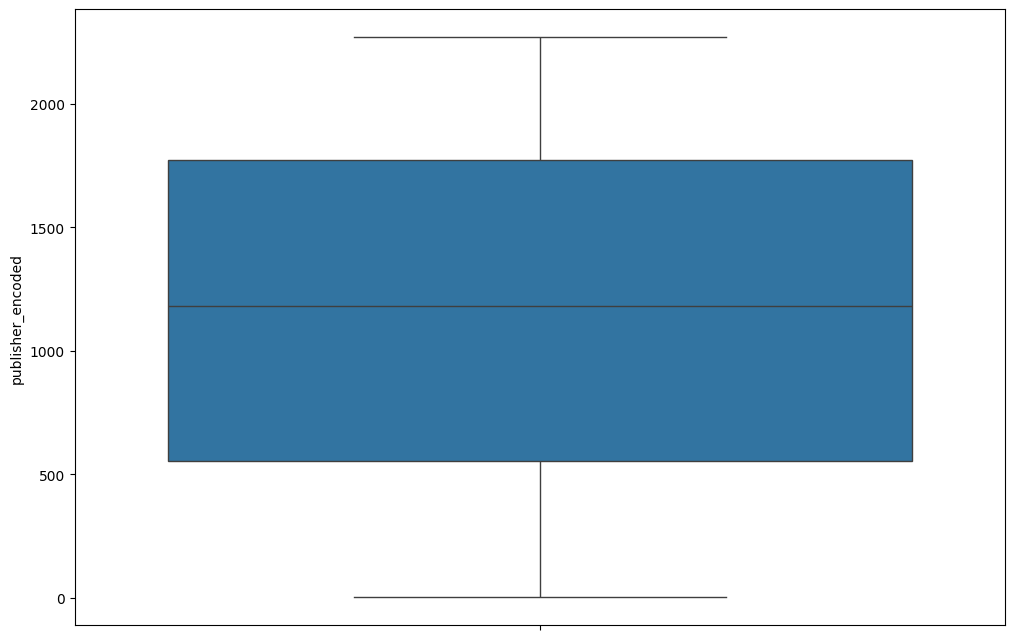

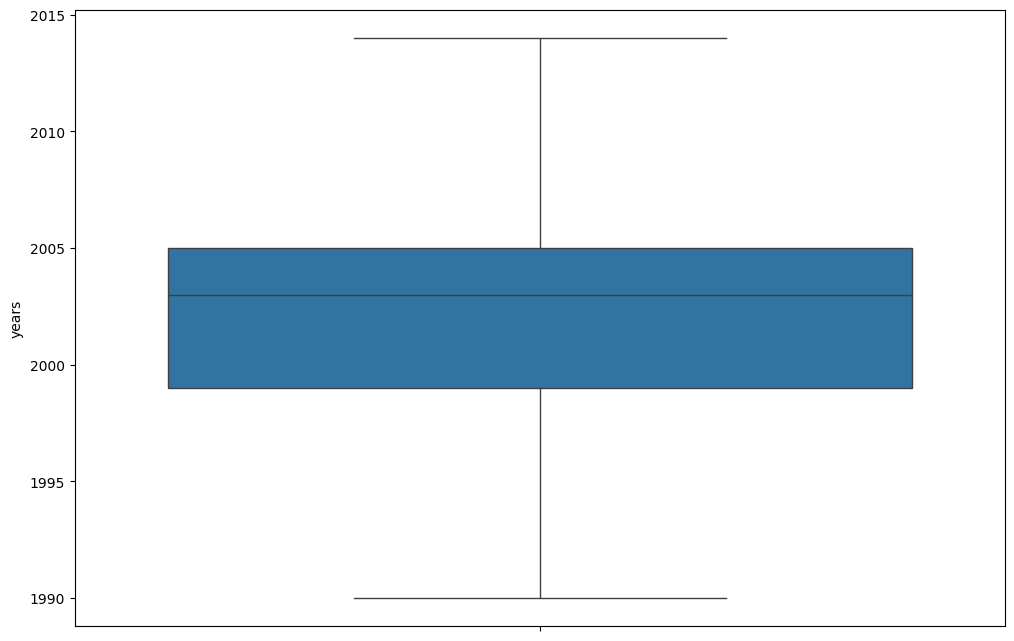

In [76]:
df7=remove_outliers(df7,['ratings_count','text_reviews_count'])
for column in df7:
    plt.figure(figsize=(12,8))
    sns.boxplot(df7[column])
    plt.show()

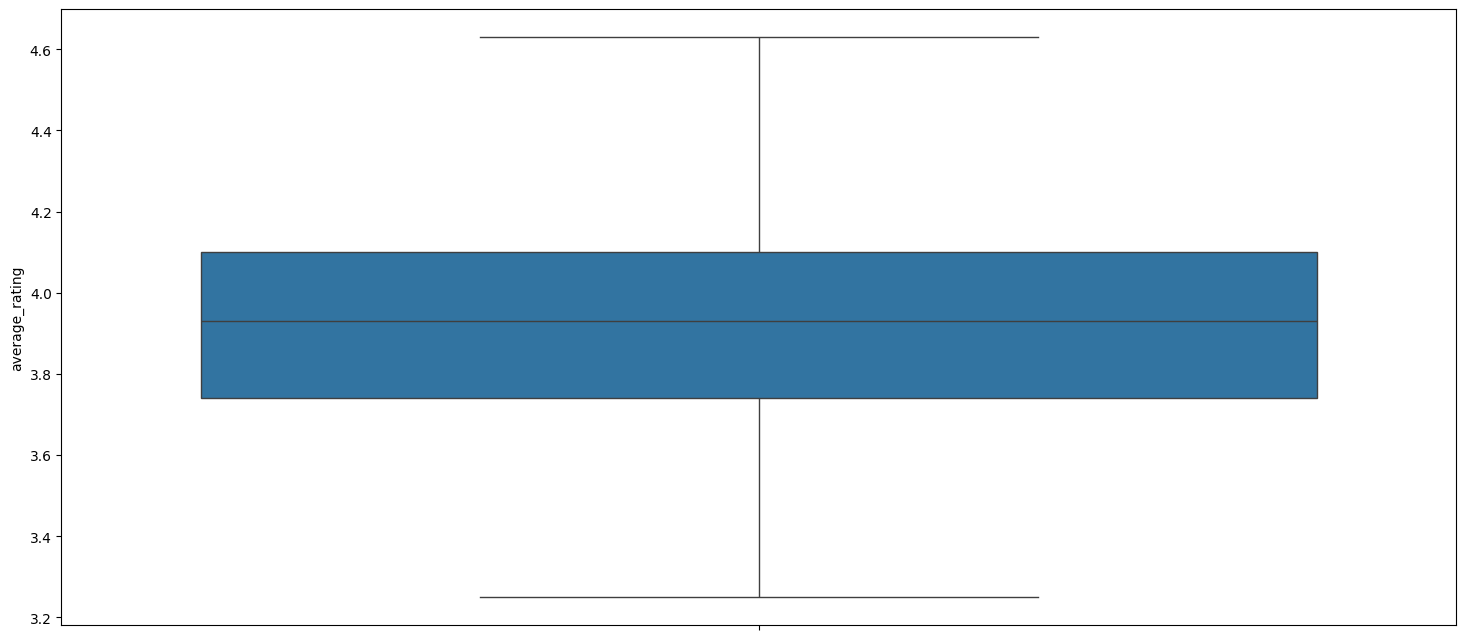

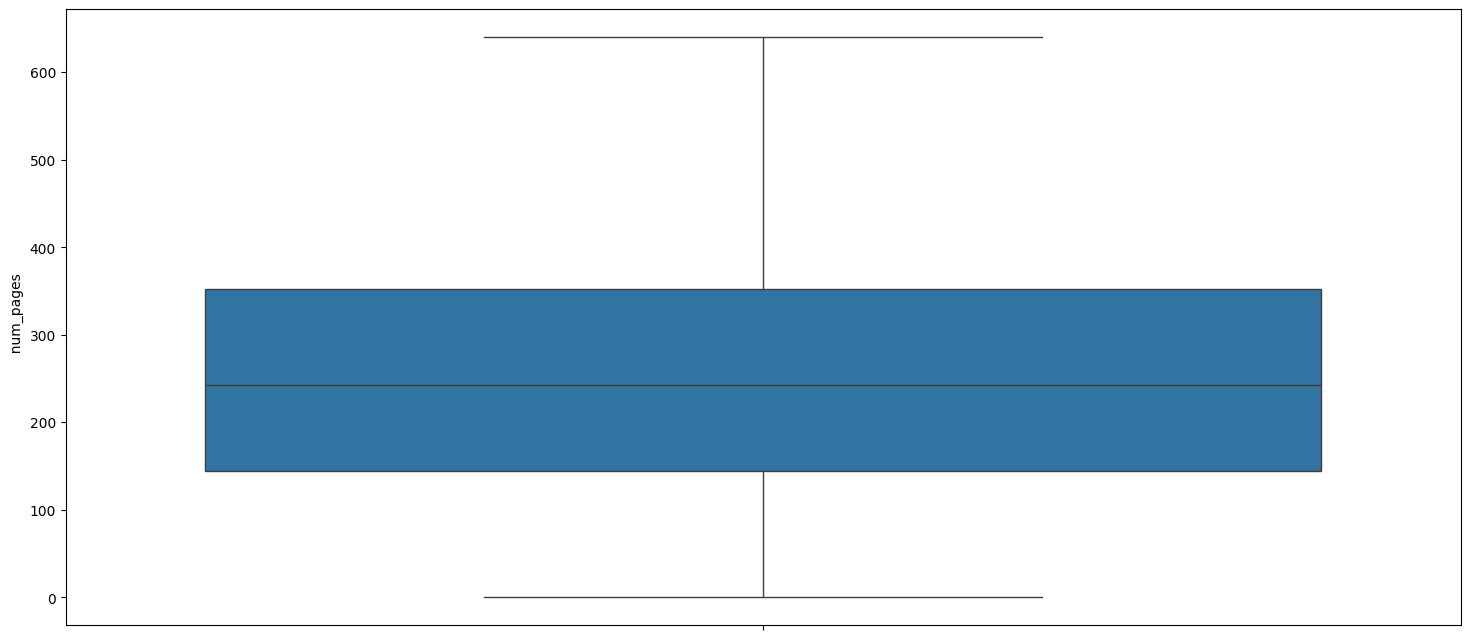

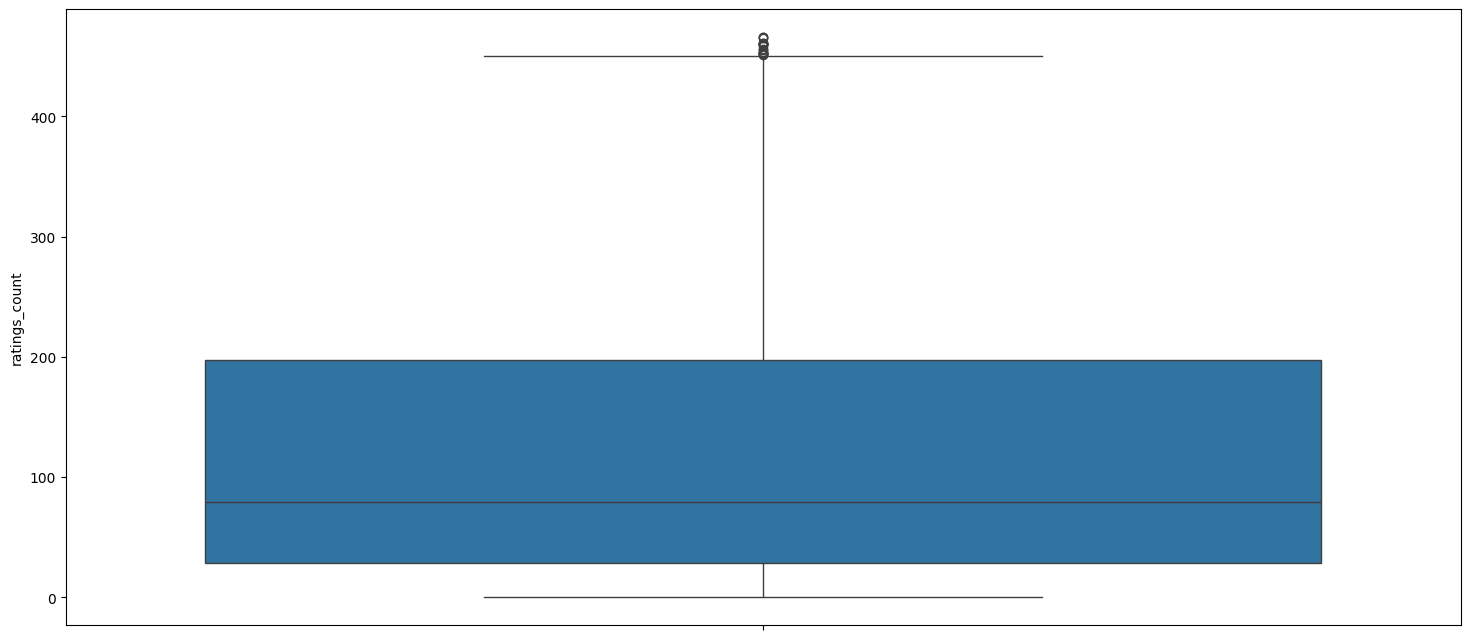

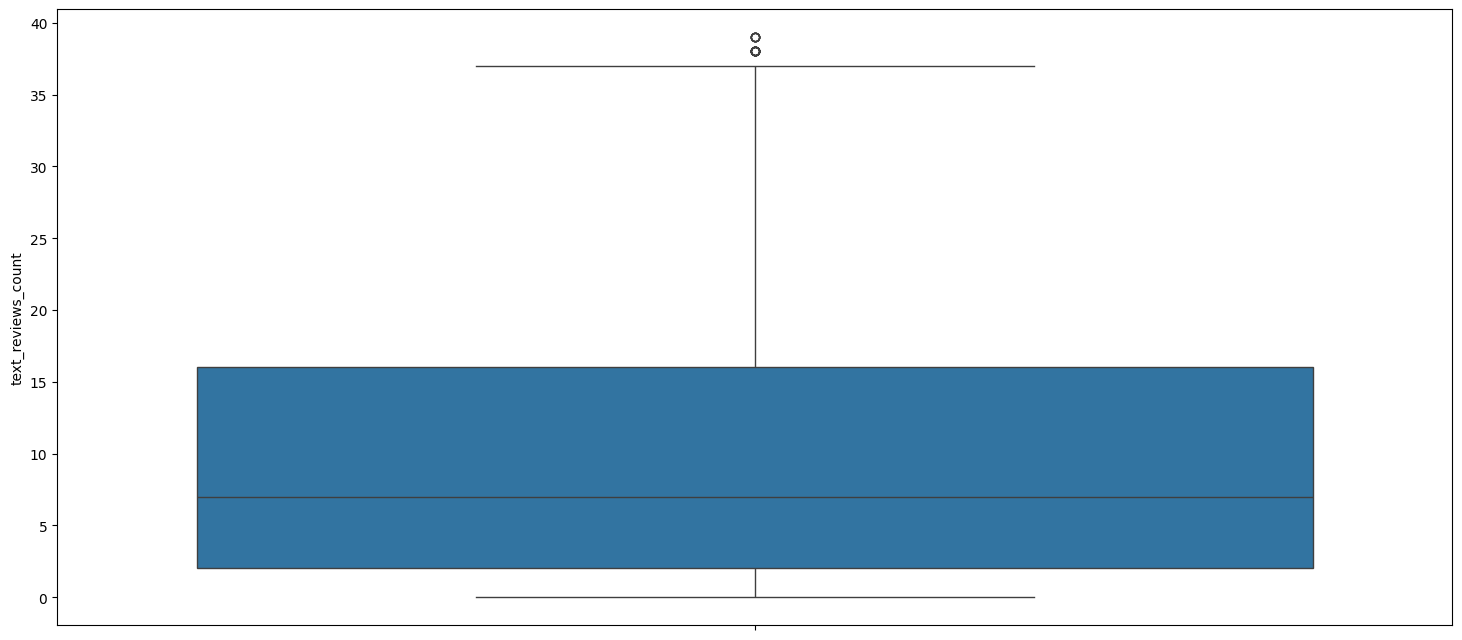

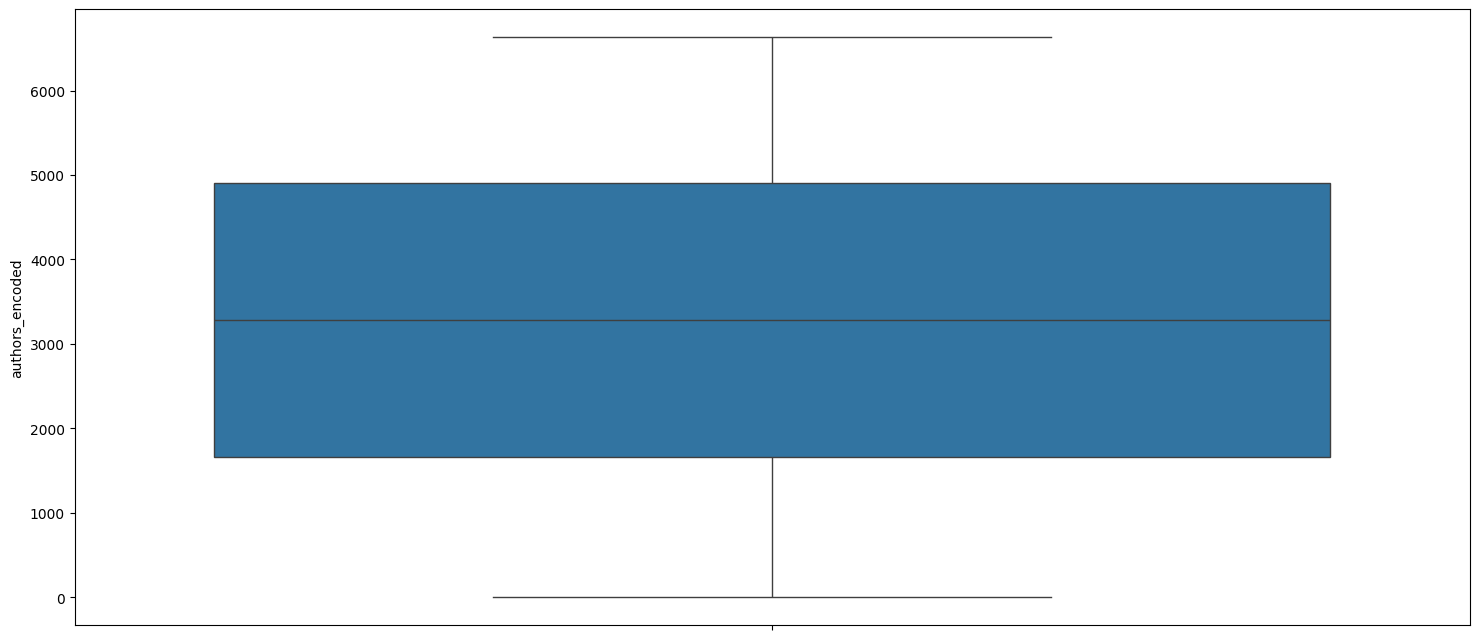

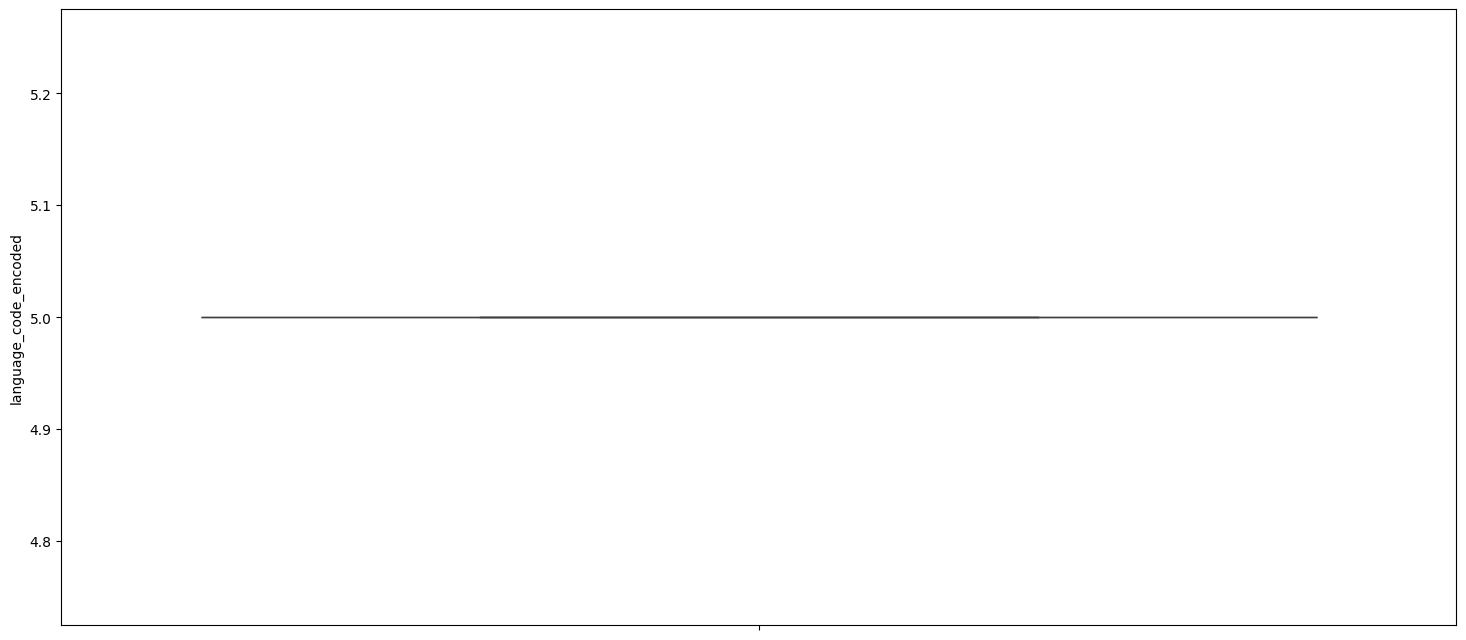

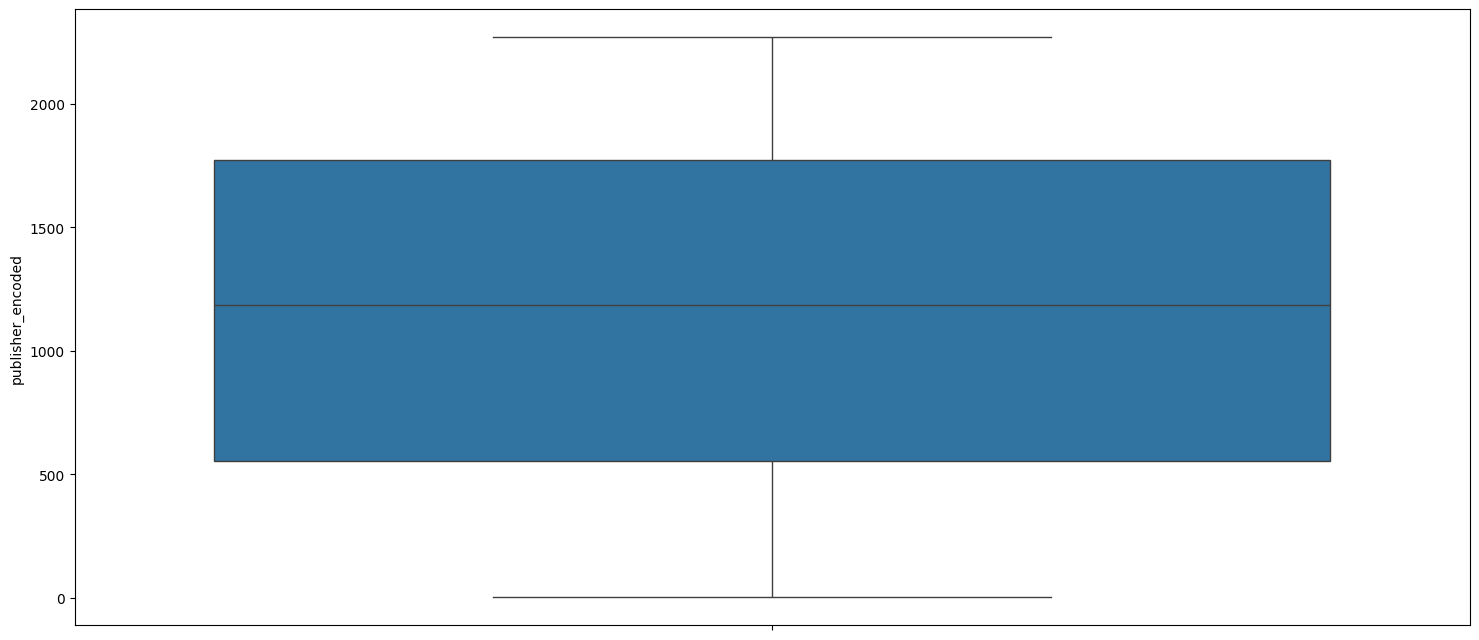

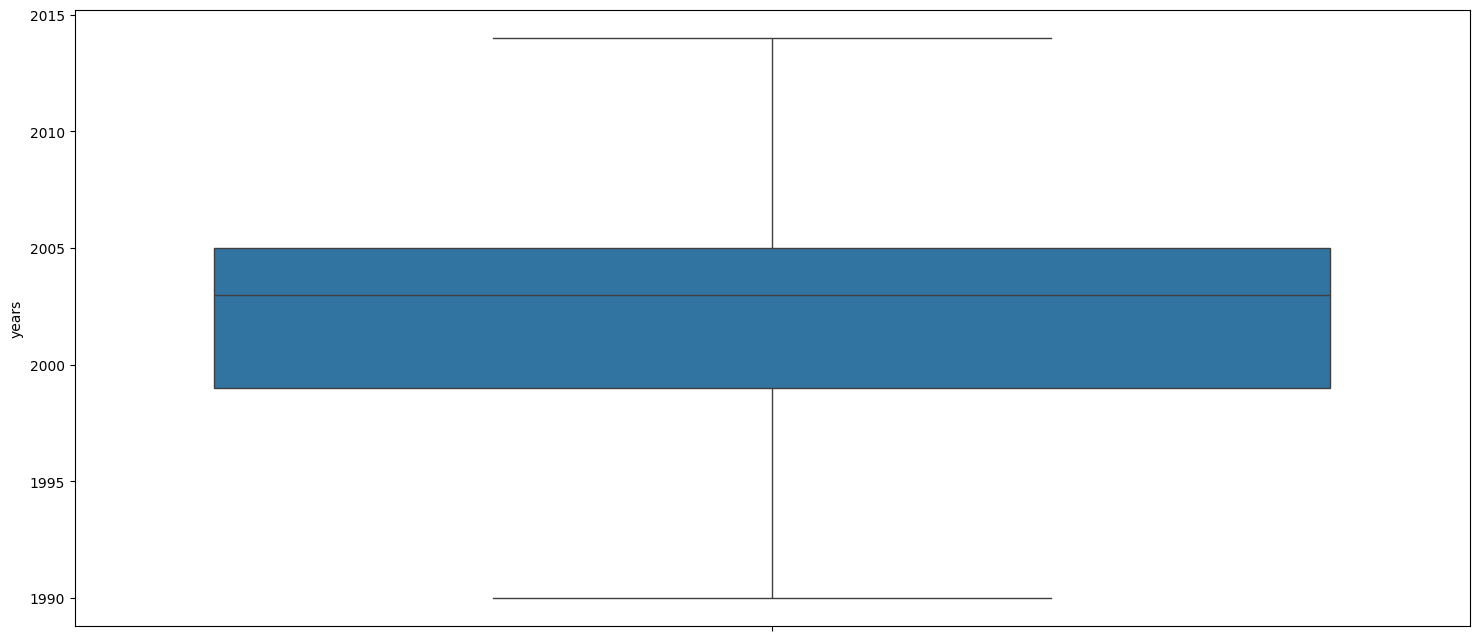

In [77]:
df7=remove_outliers(df7,['ratings_count'])
for column in df7:
    plt.figure(figsize=(18,8))
    sns.boxplot(df7[column])
    plt.show()

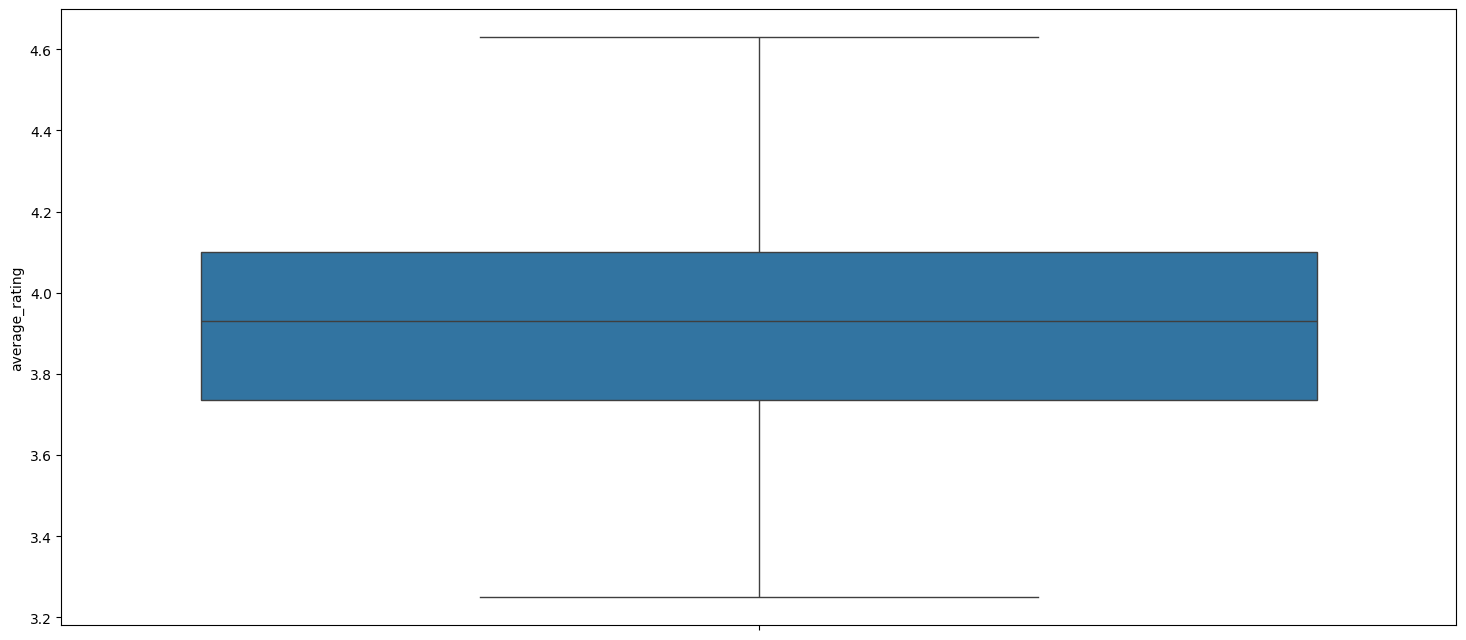

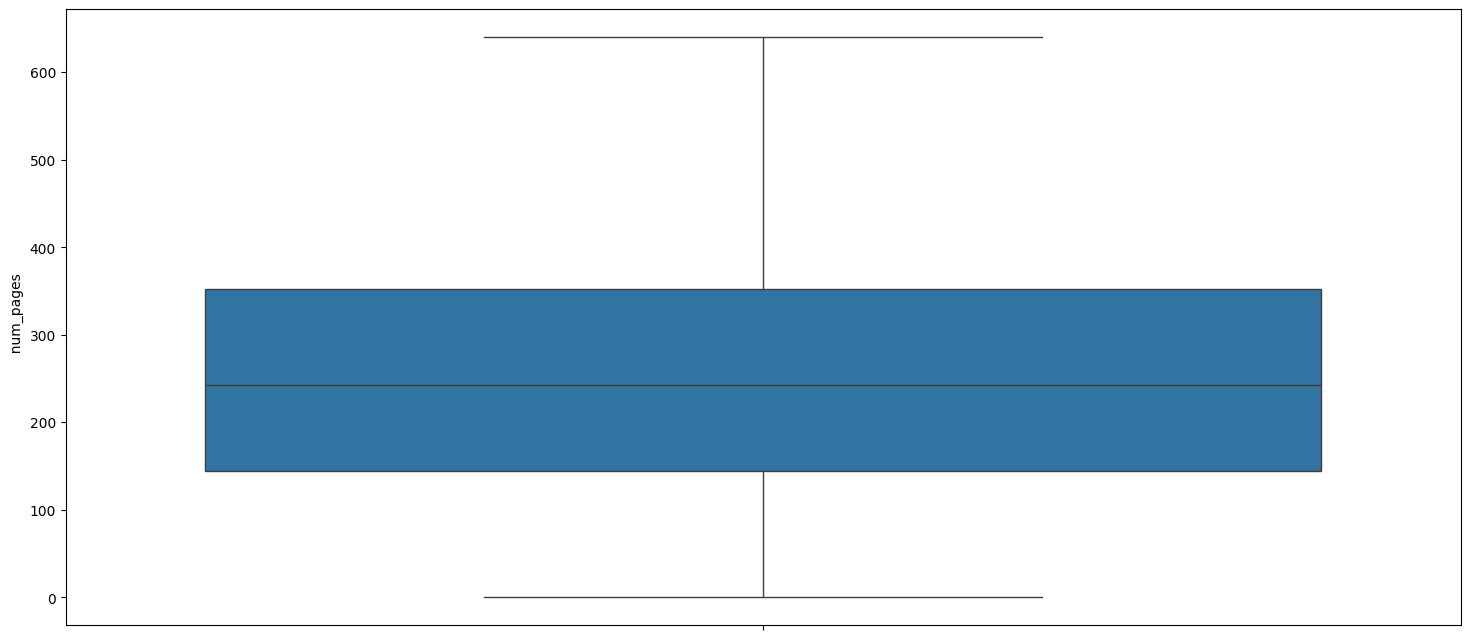

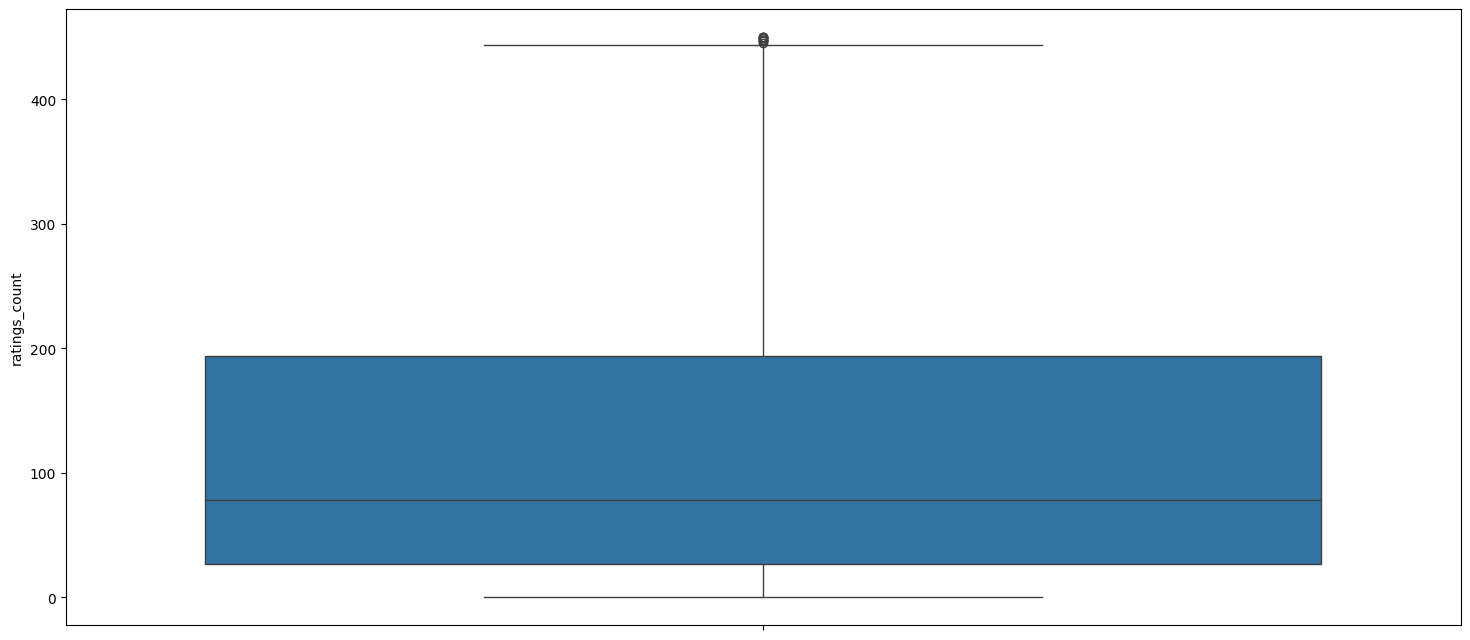

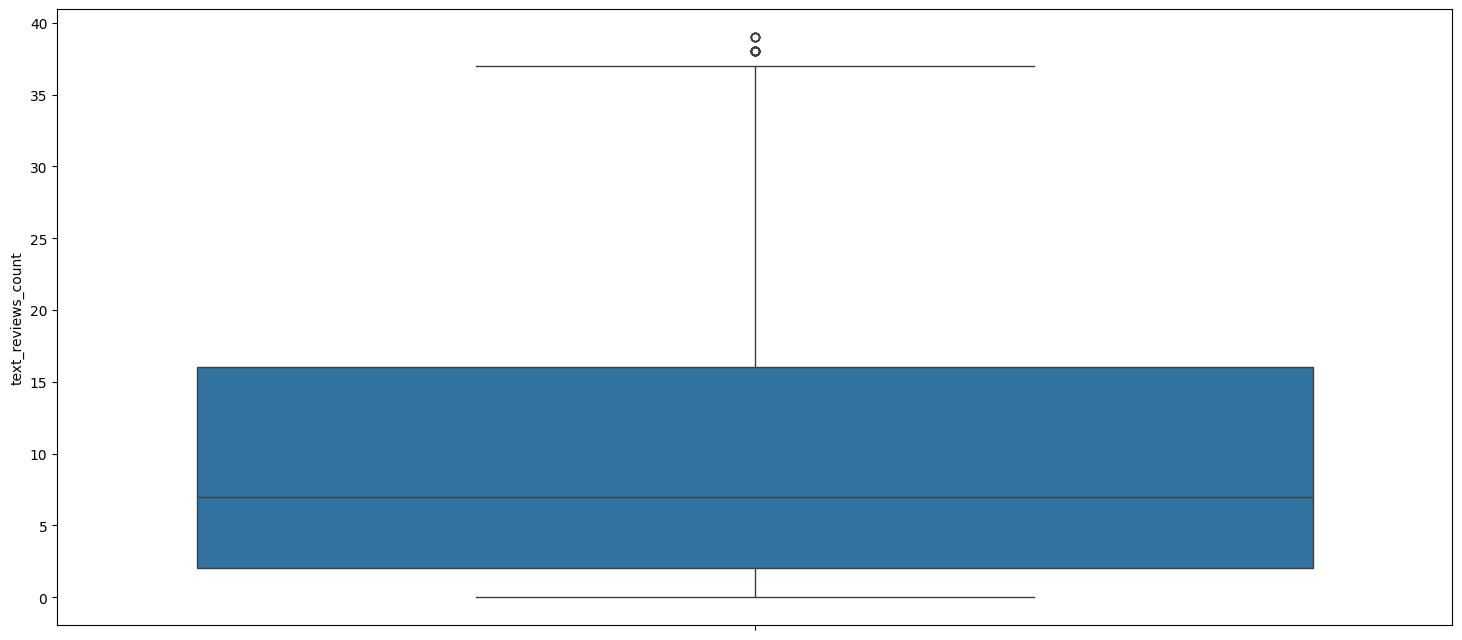

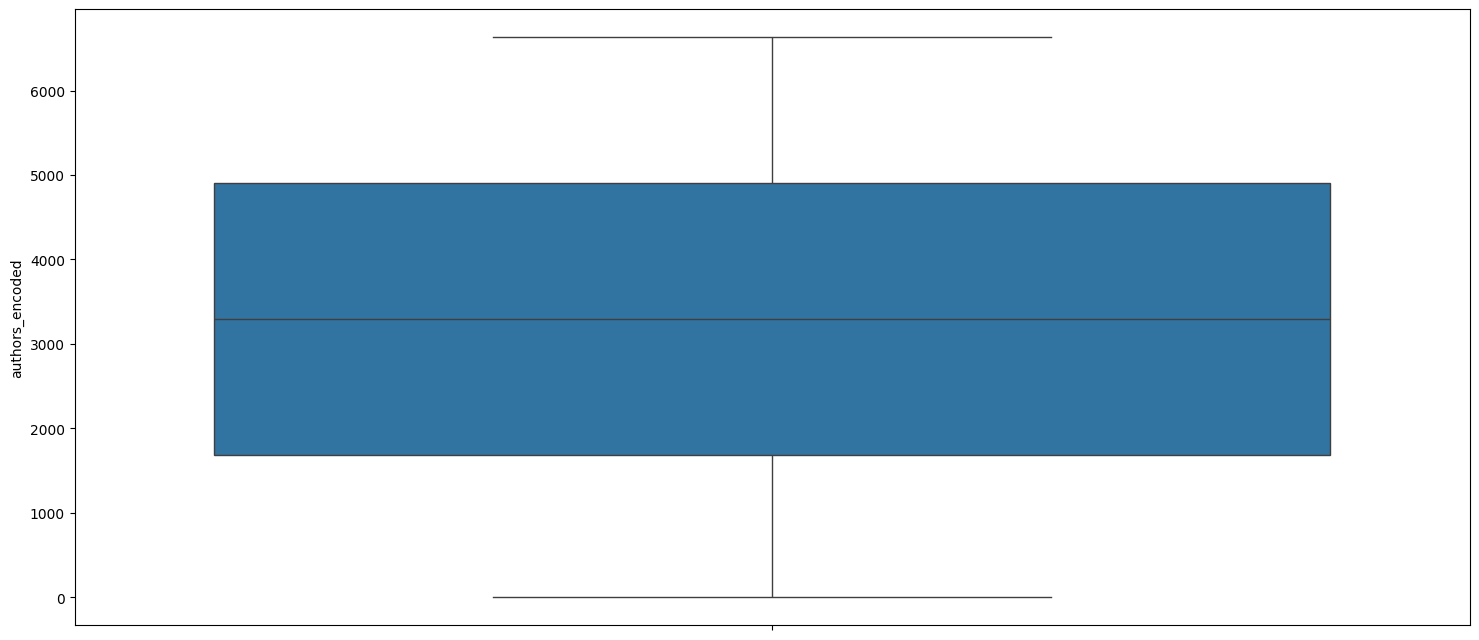

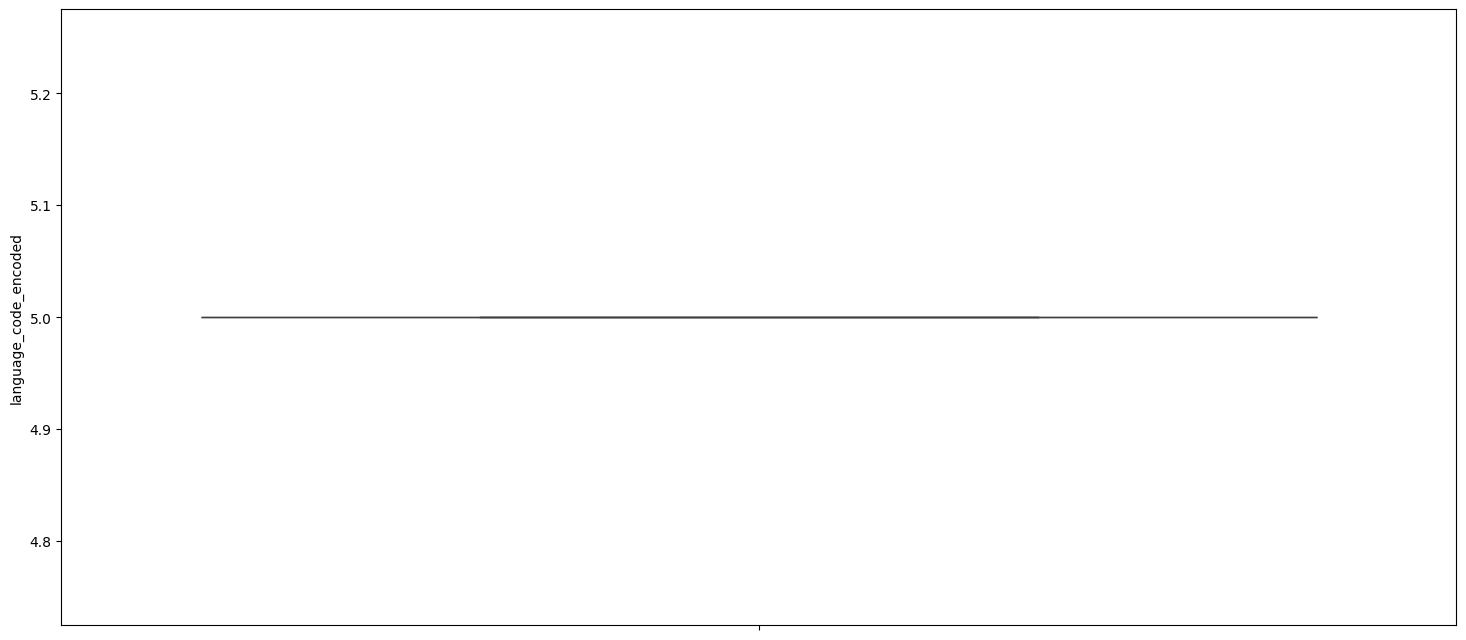

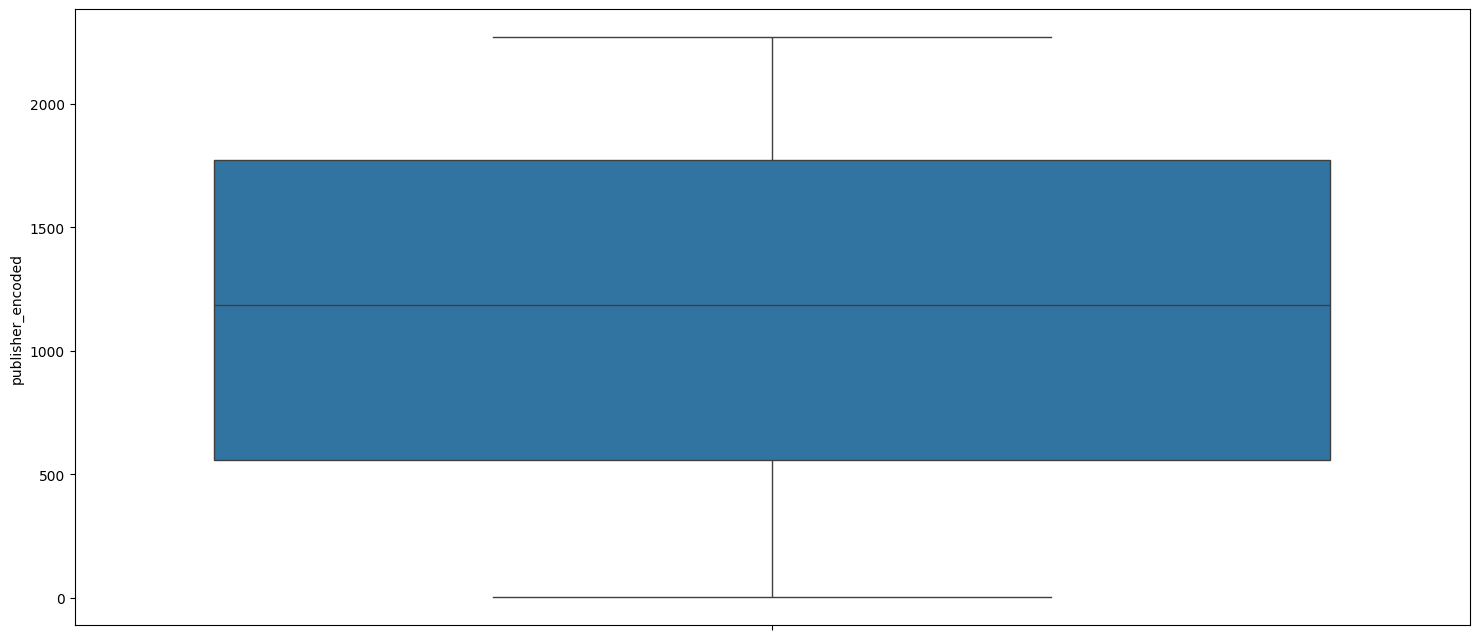

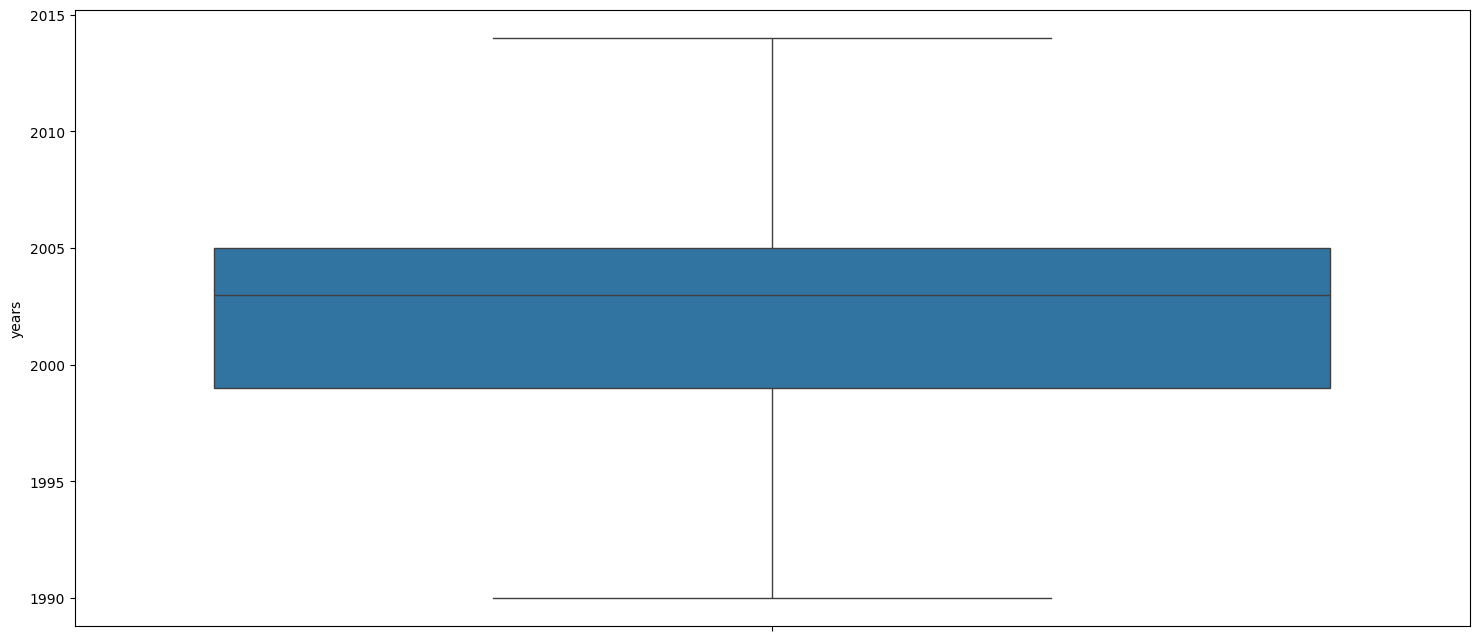

In [78]:
df7=remove_outliers(df7,['ratings_count'])
for column in df7:
    plt.figure(figsize=(18,8))
    sns.boxplot(df7[column])
    plt.show()

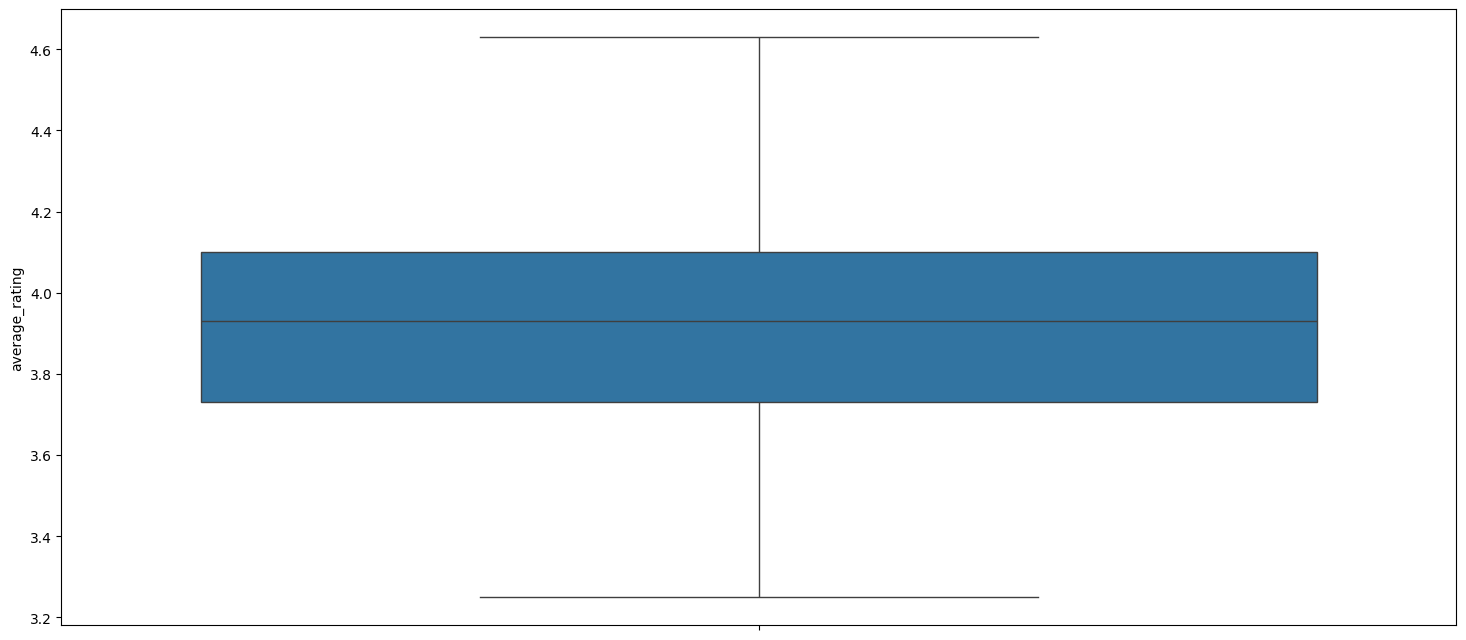

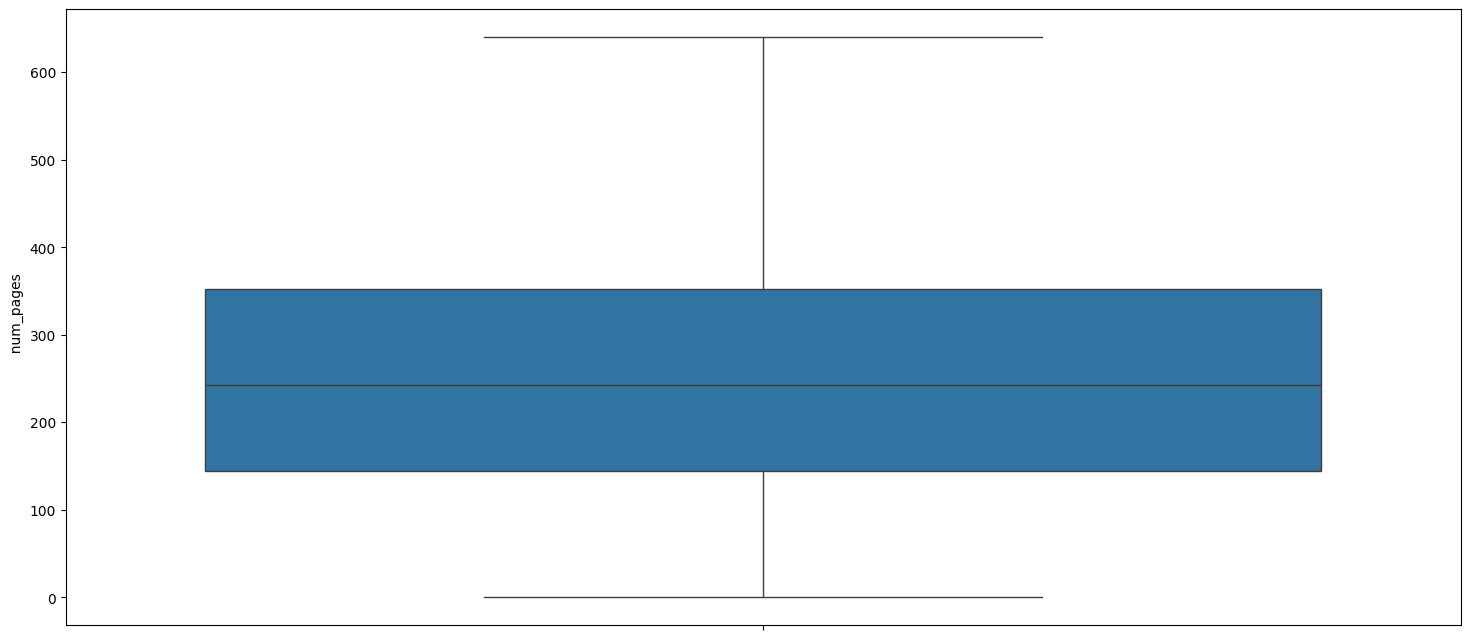

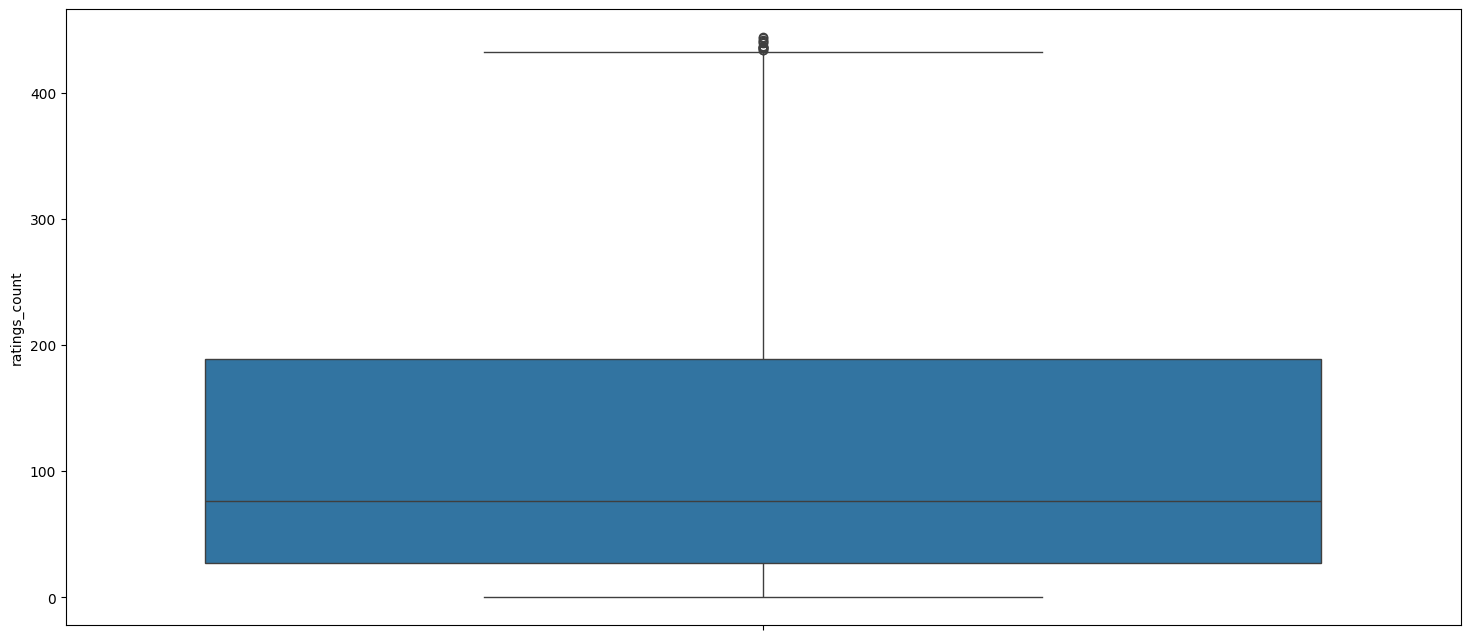

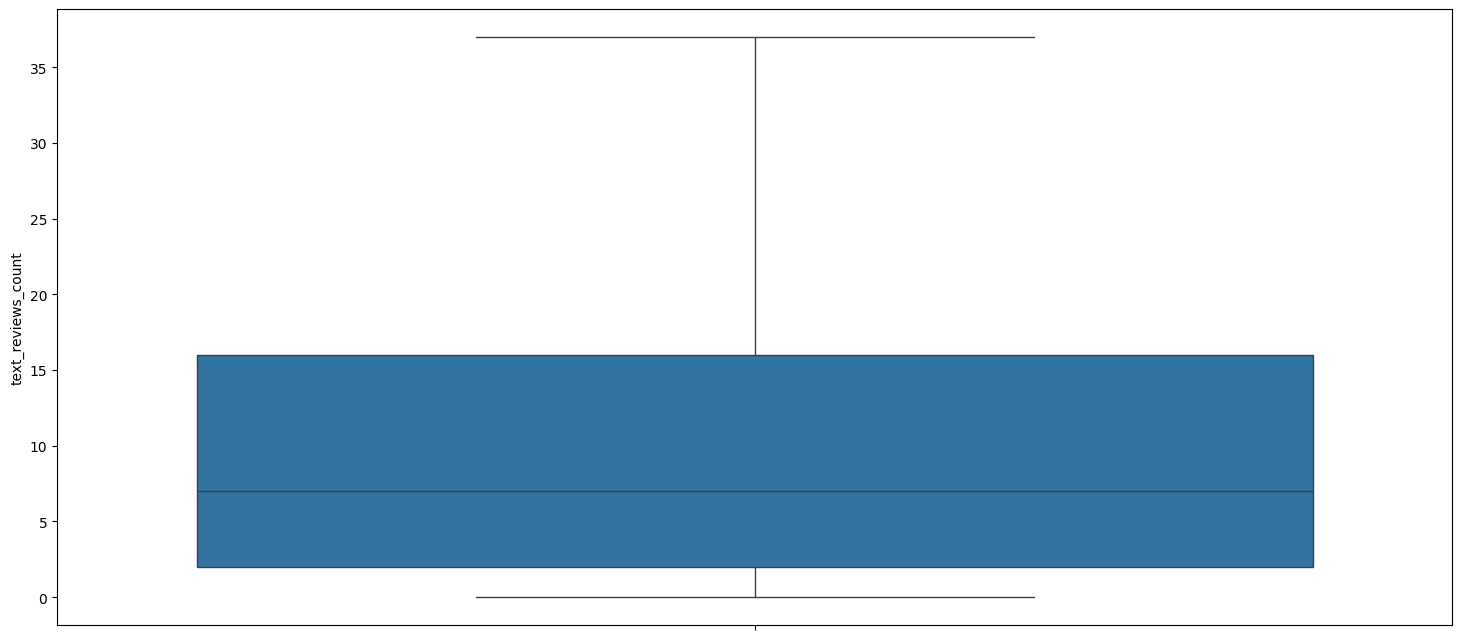

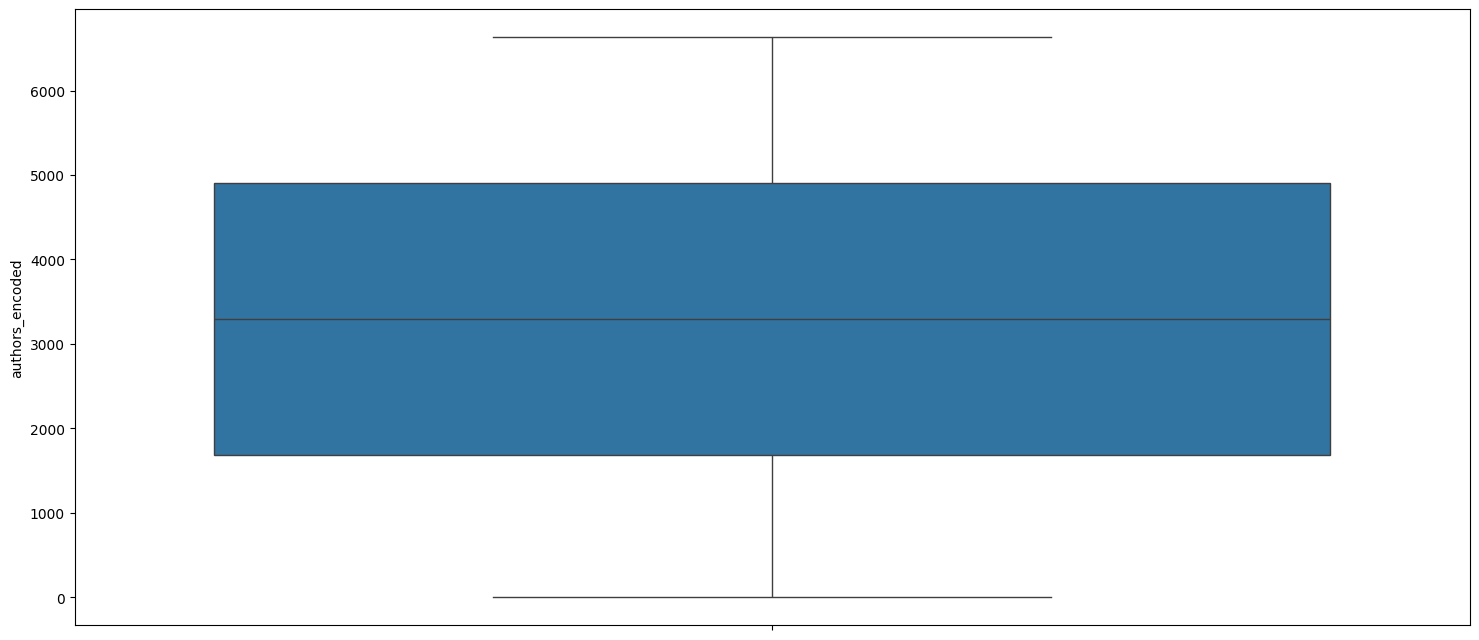

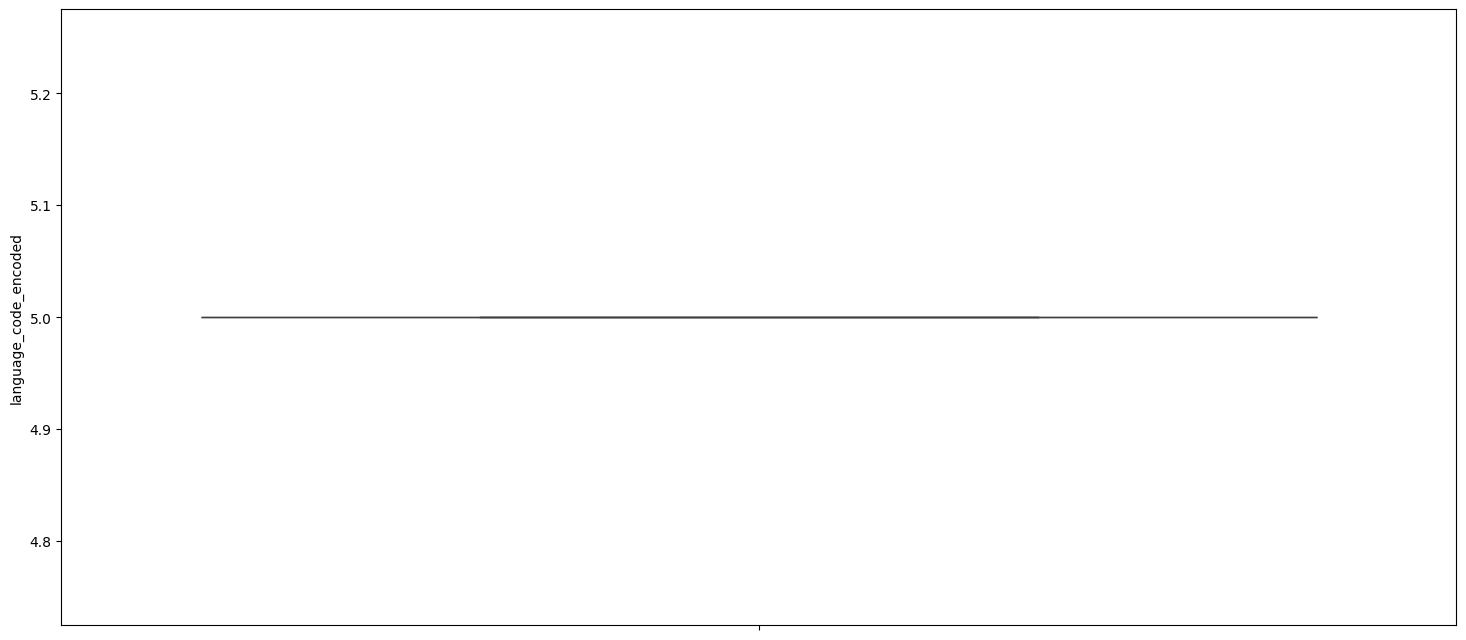

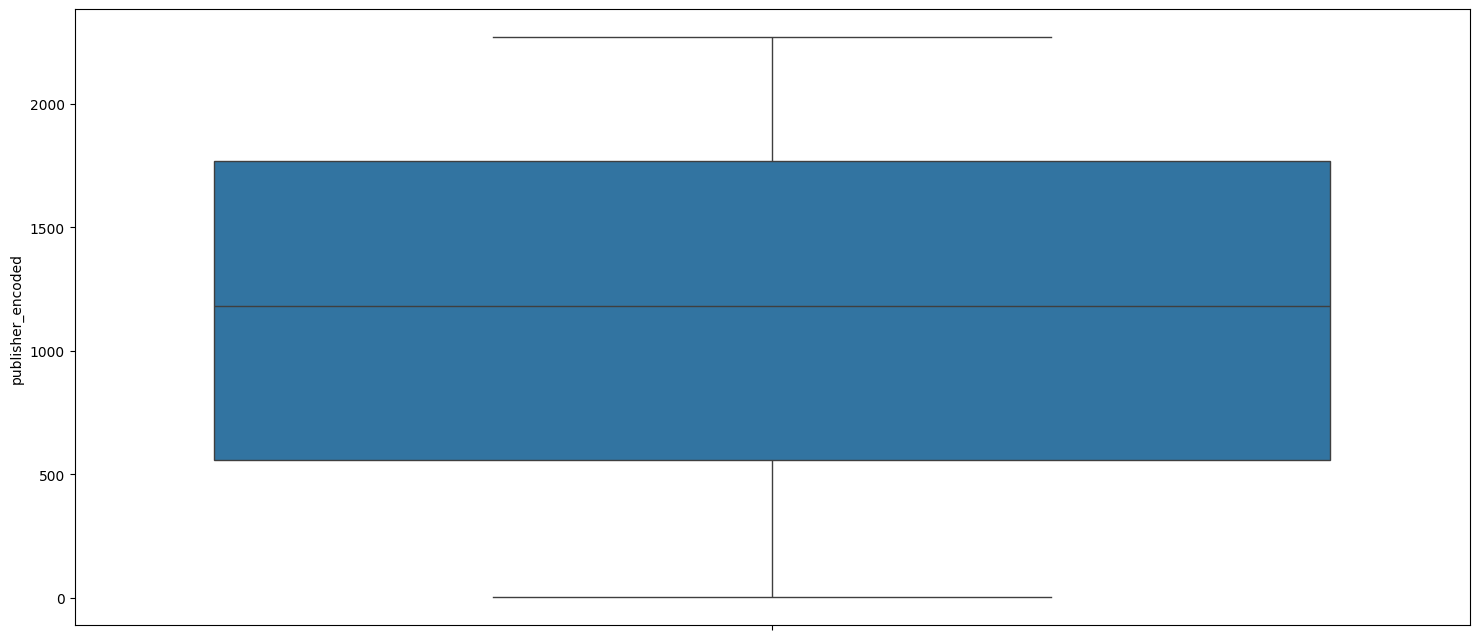

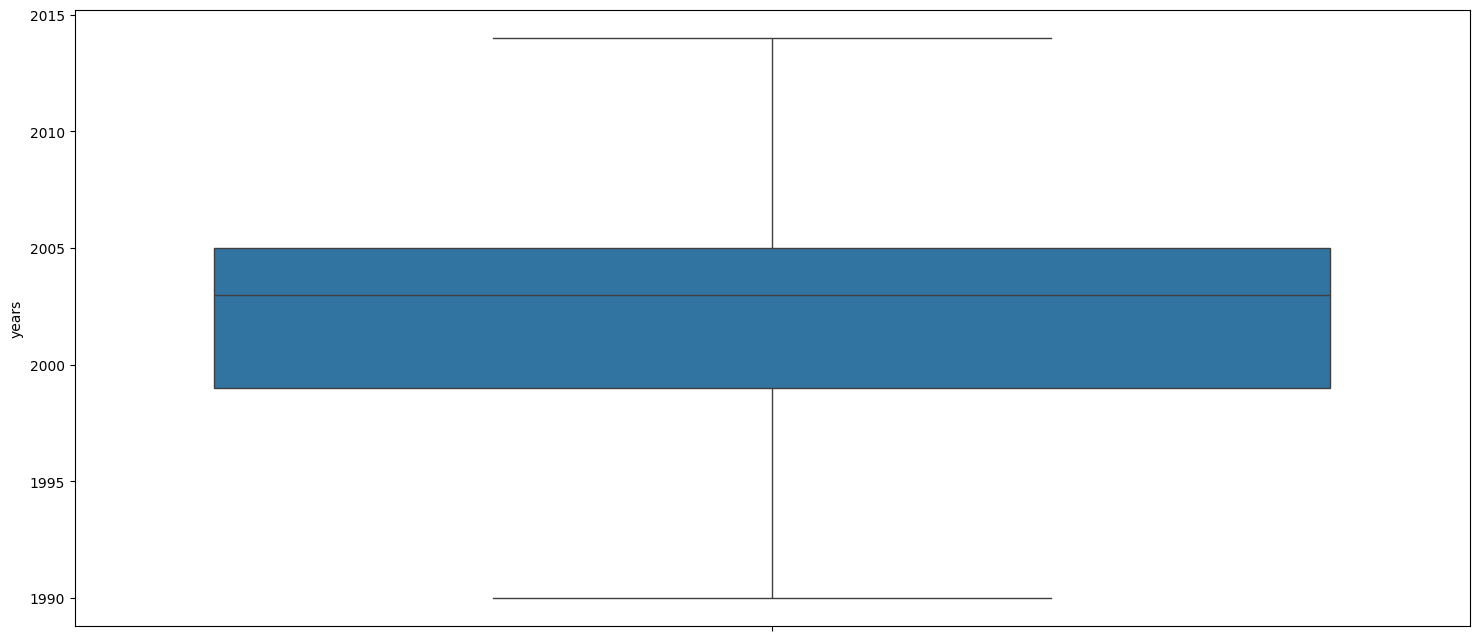

In [80]:
df7=remove_outliers(df7,['ratings_count','text_reviews_count'])
for column in df7:
    plt.figure(figsize=(18,8))
    sns.boxplot(df7[column])
    plt.show()

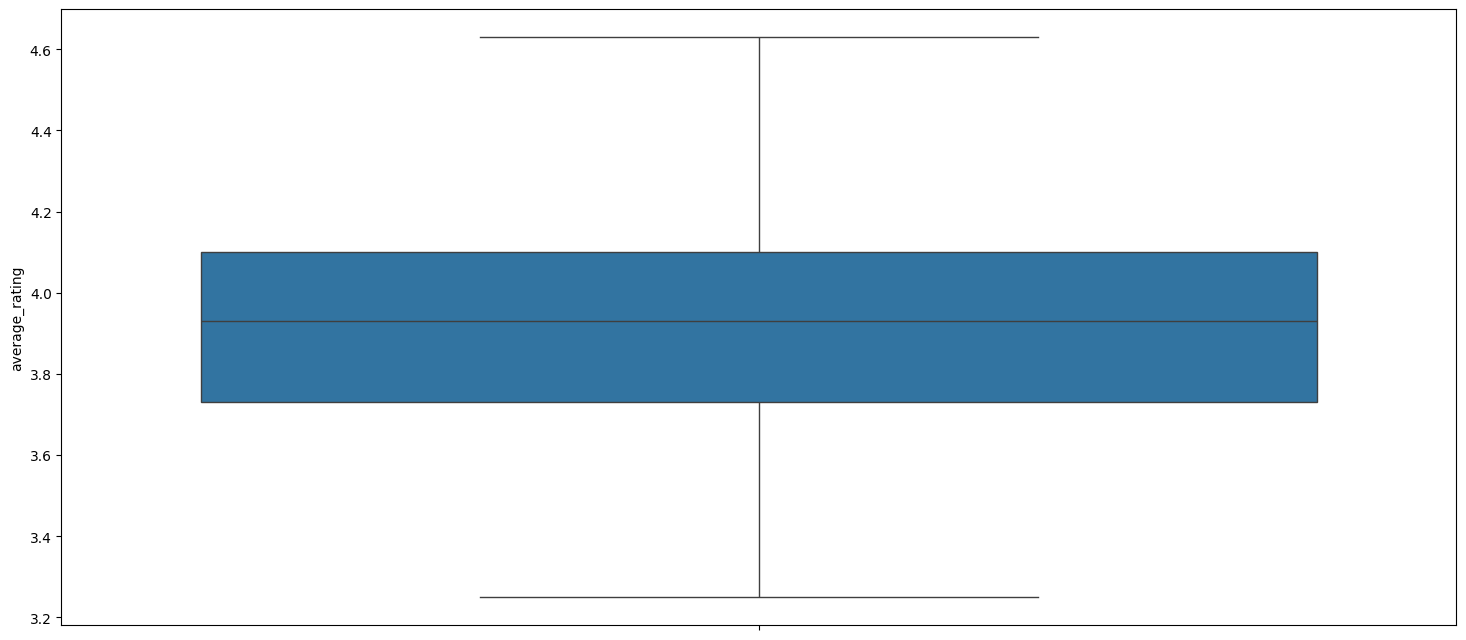

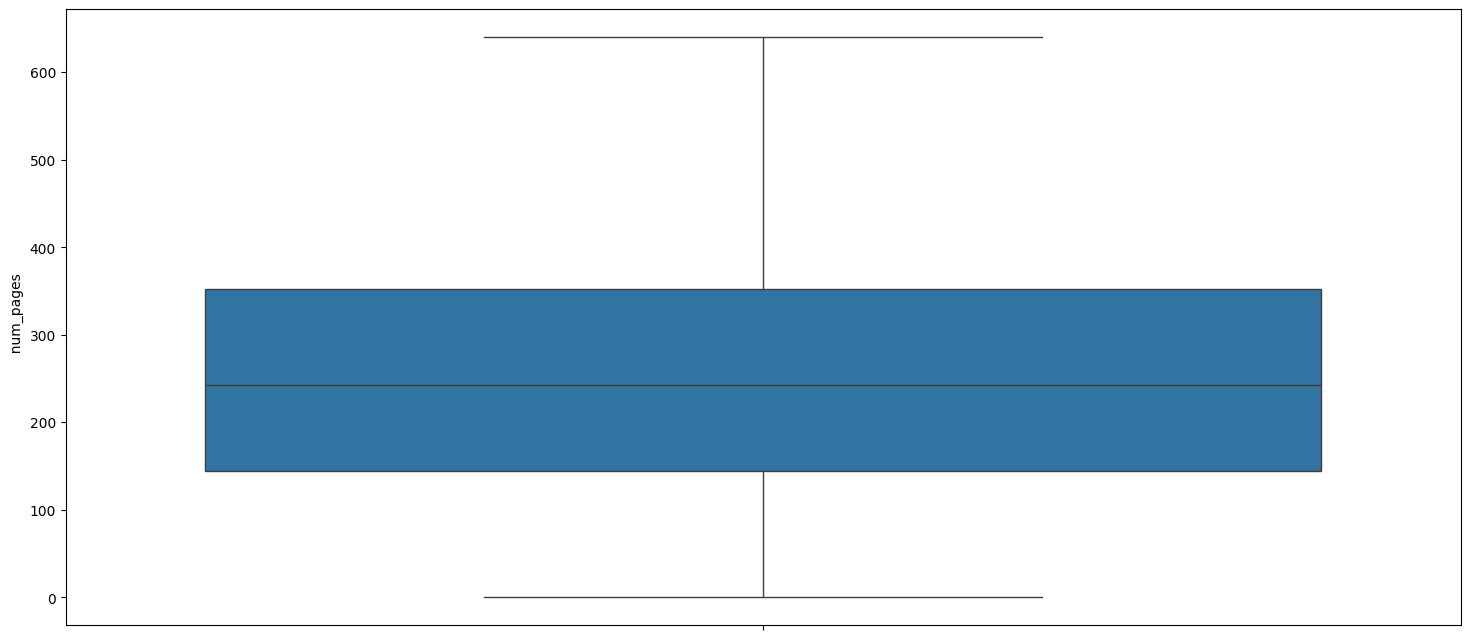

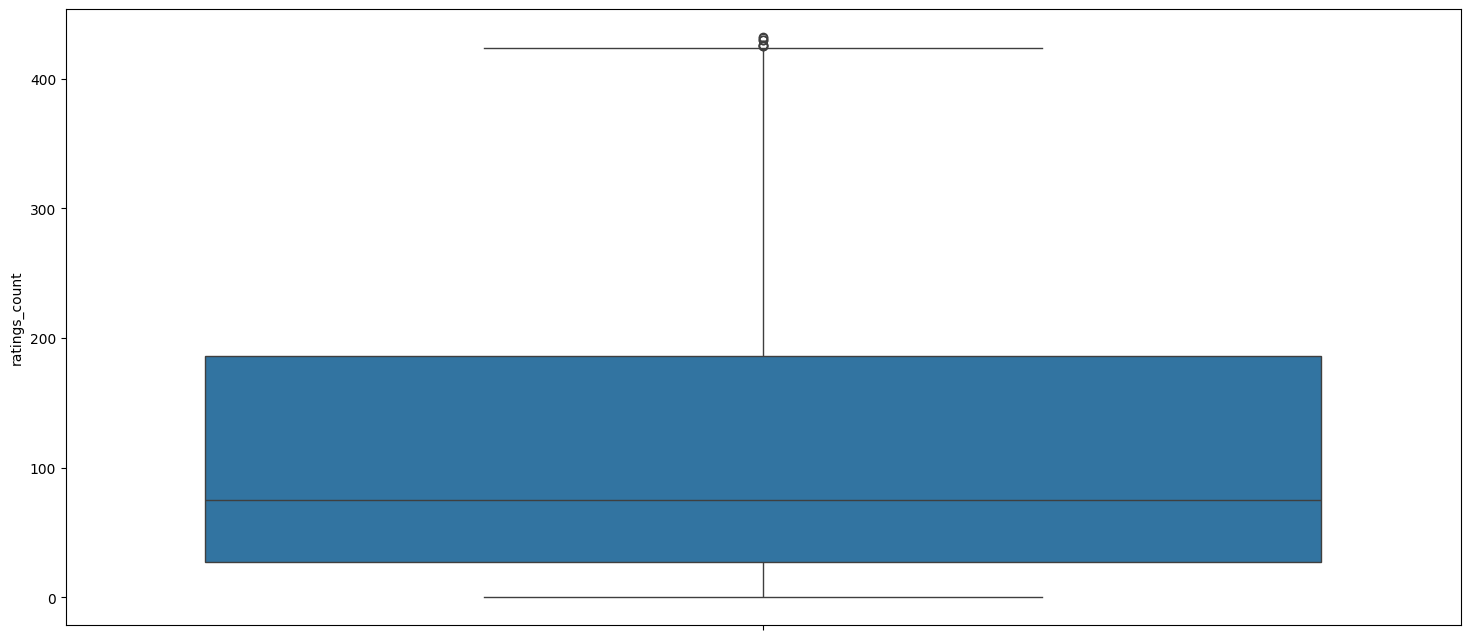

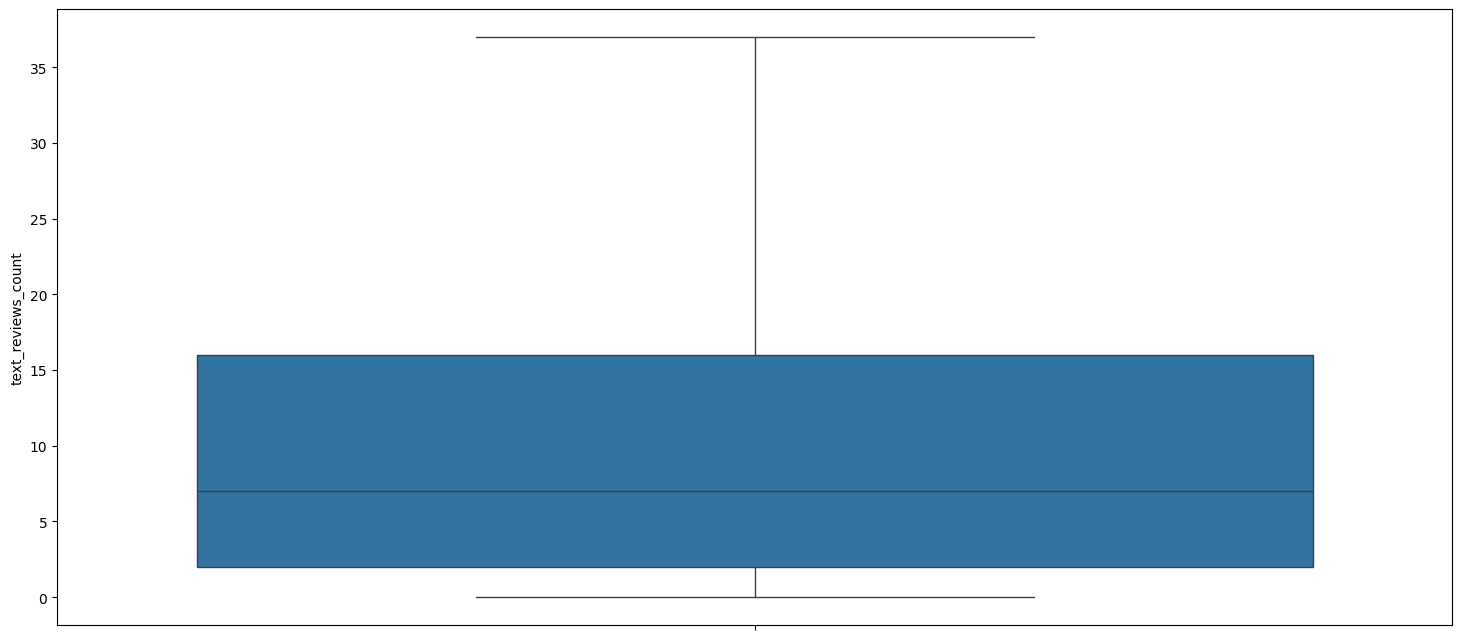

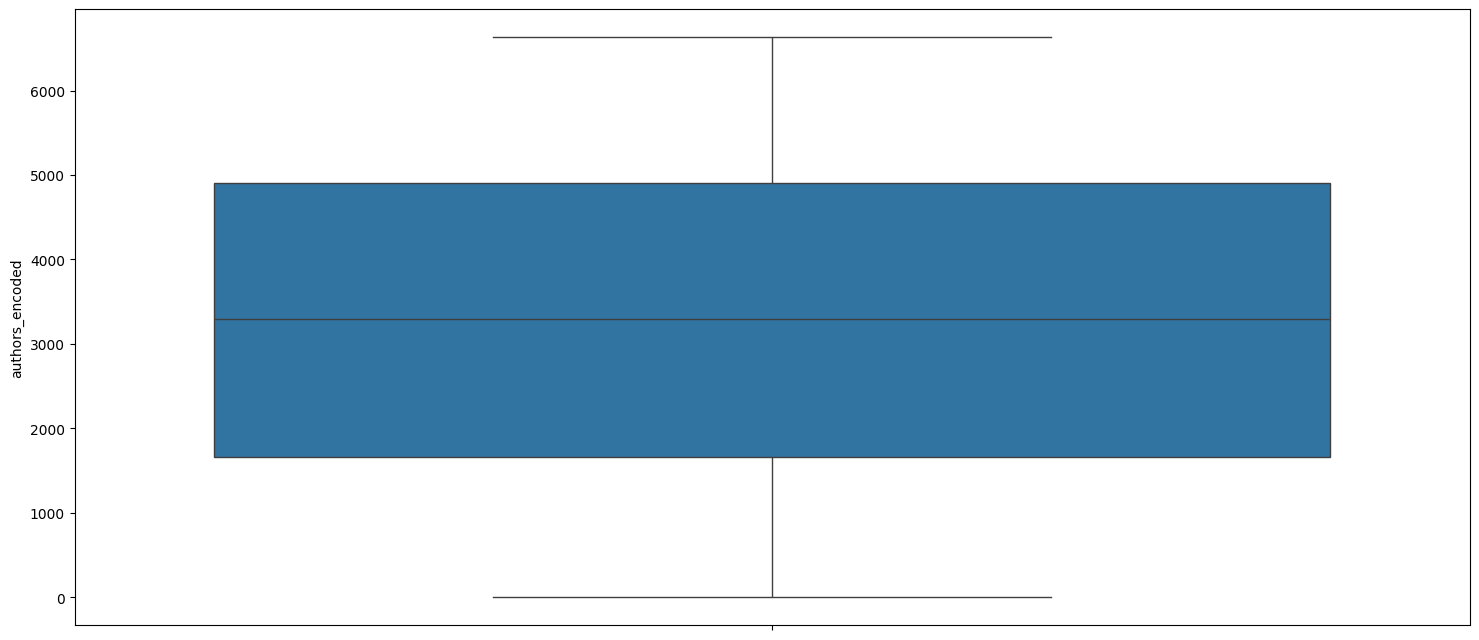

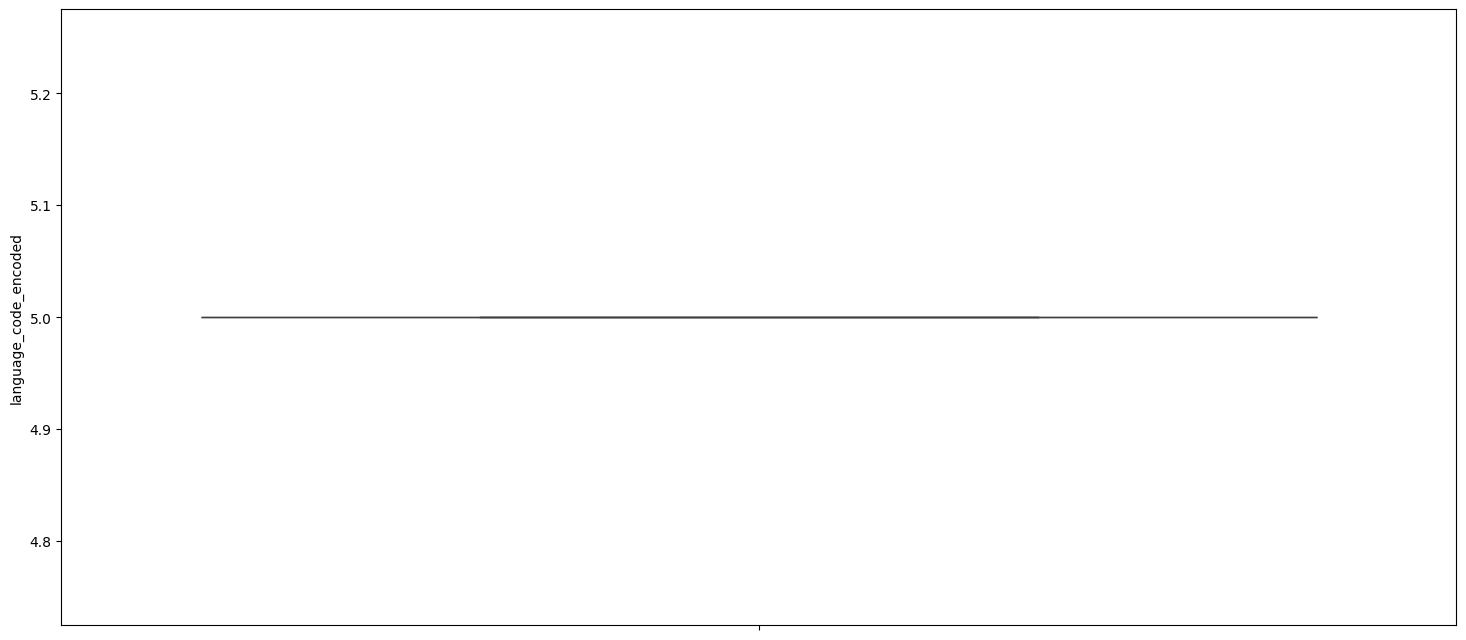

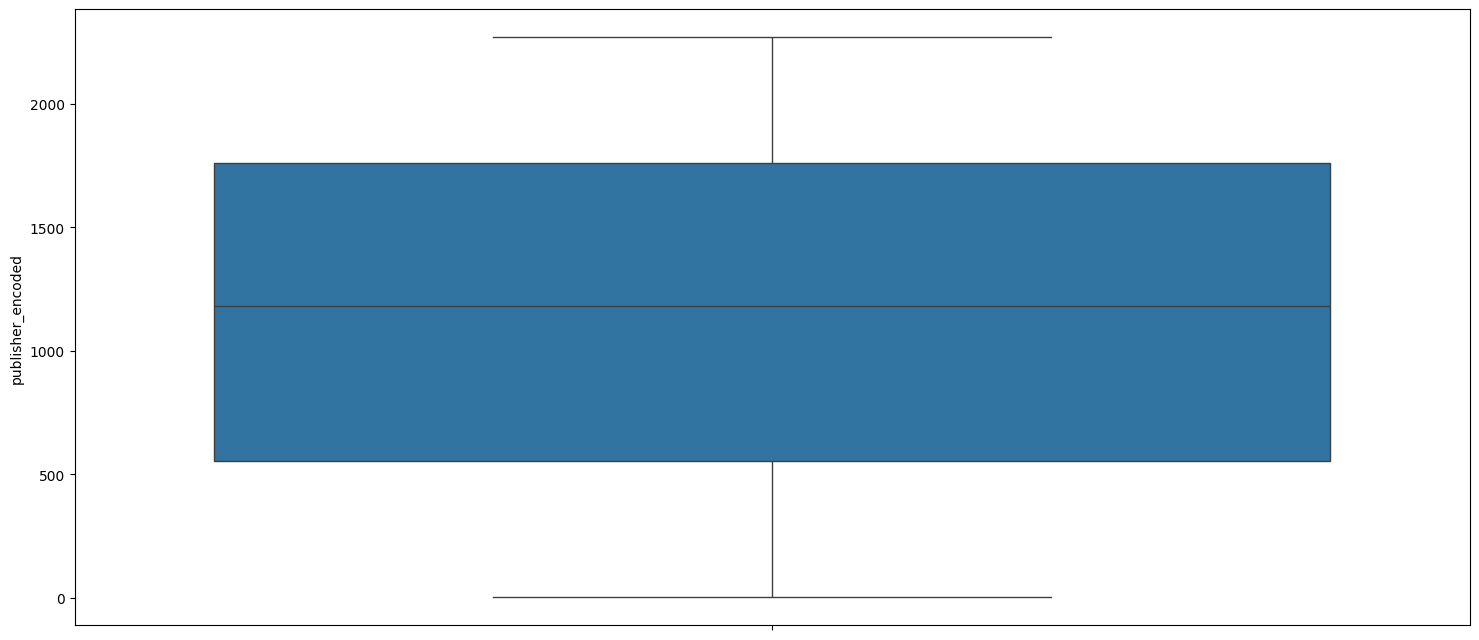

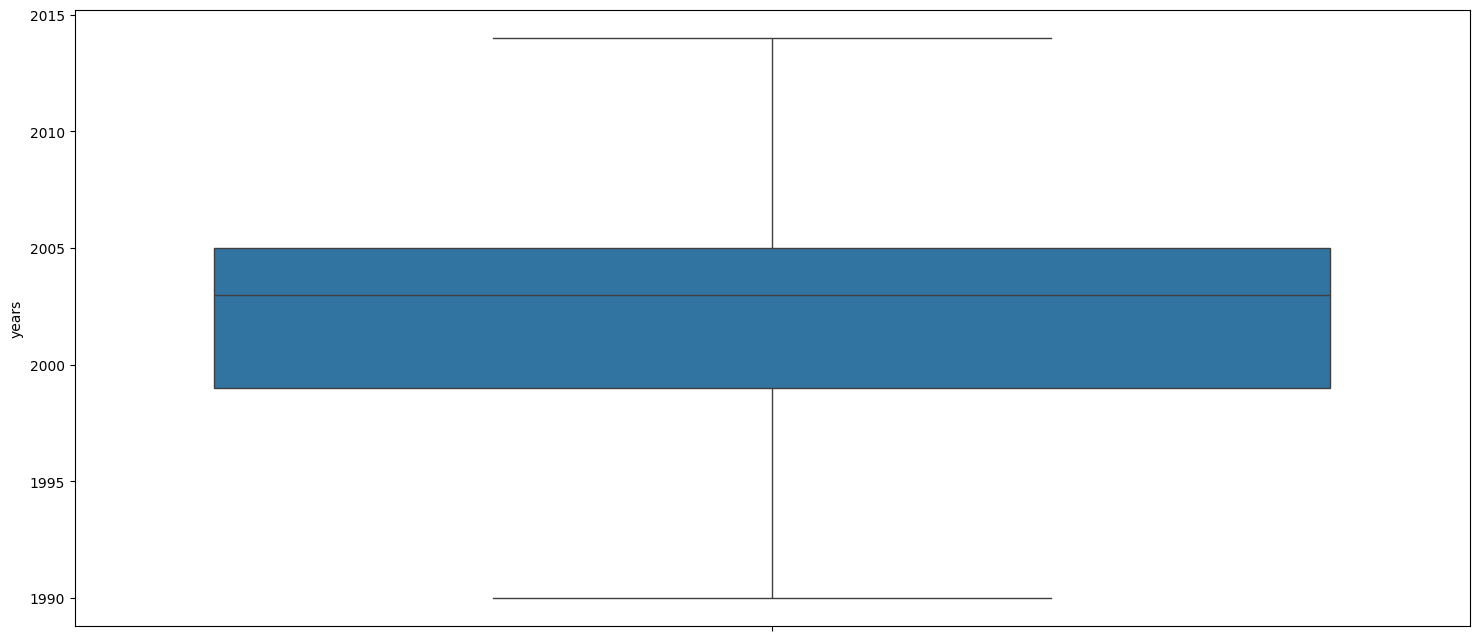

In [81]:
df7=remove_outliers(df7,['ratings_count'])
for column in df7:
    plt.figure(figsize=(18,8))
    sns.boxplot(df7[column])
    plt.show()

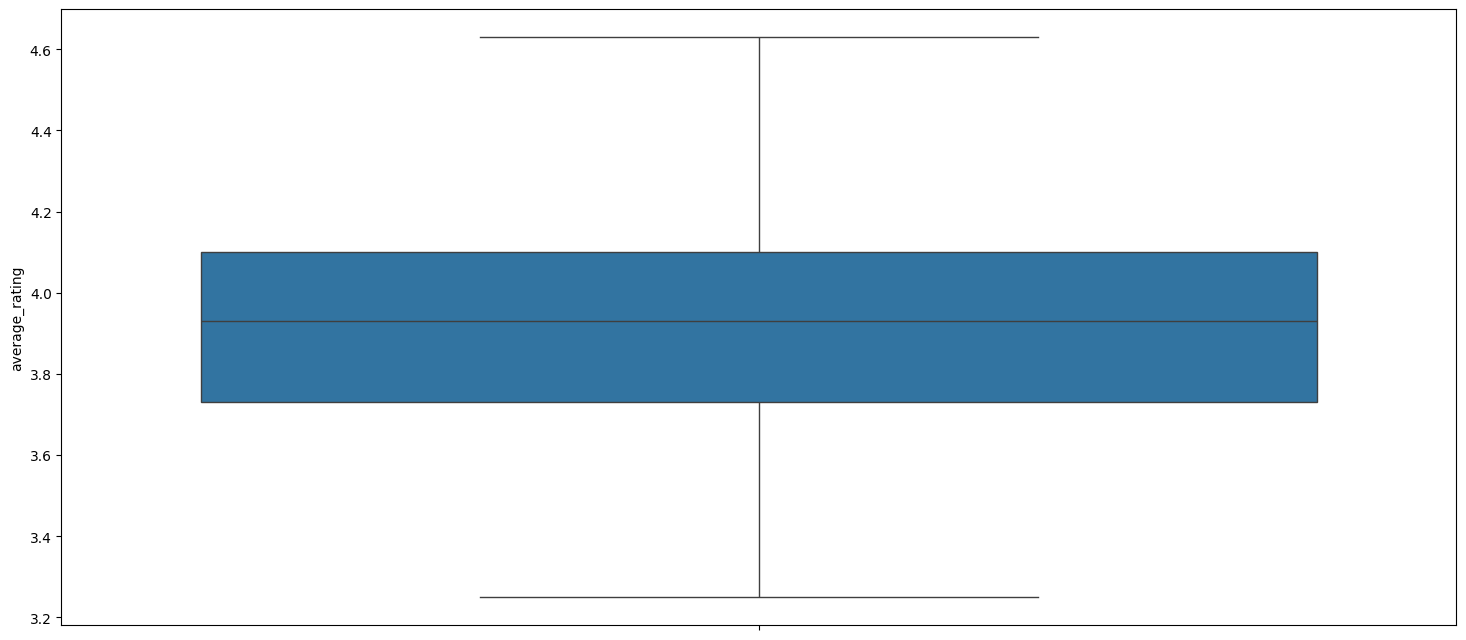

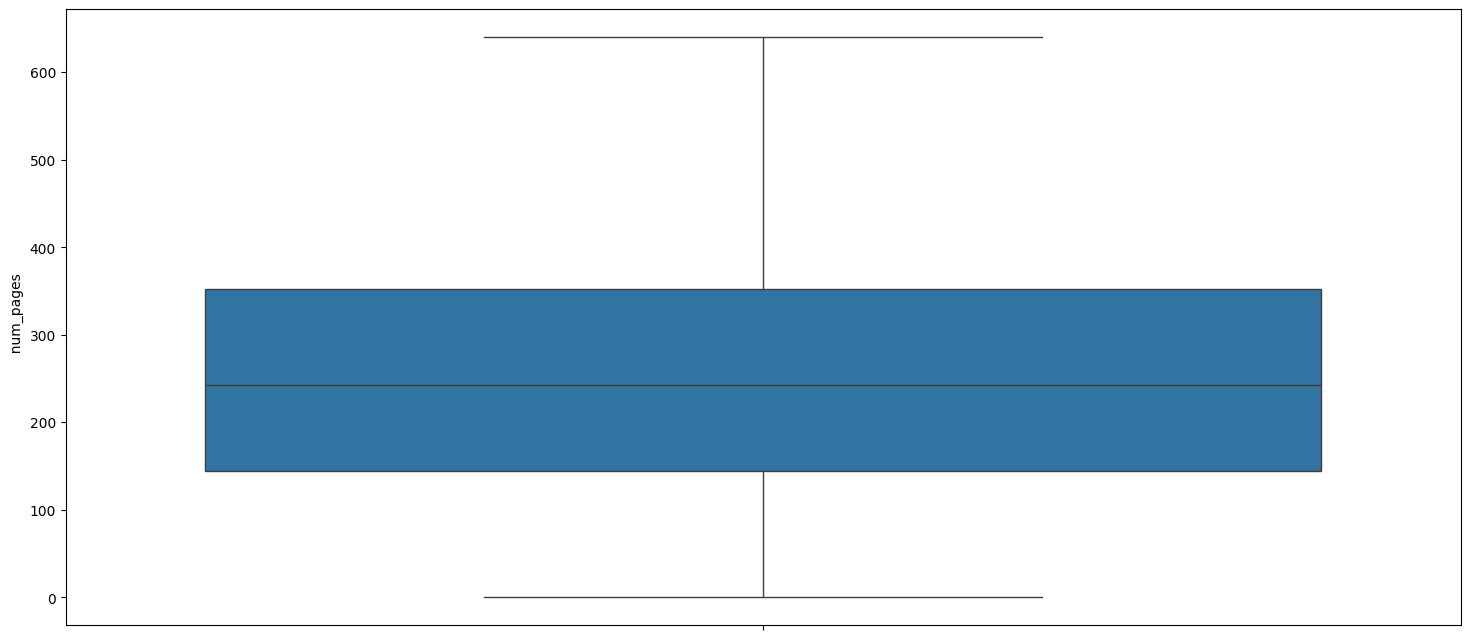

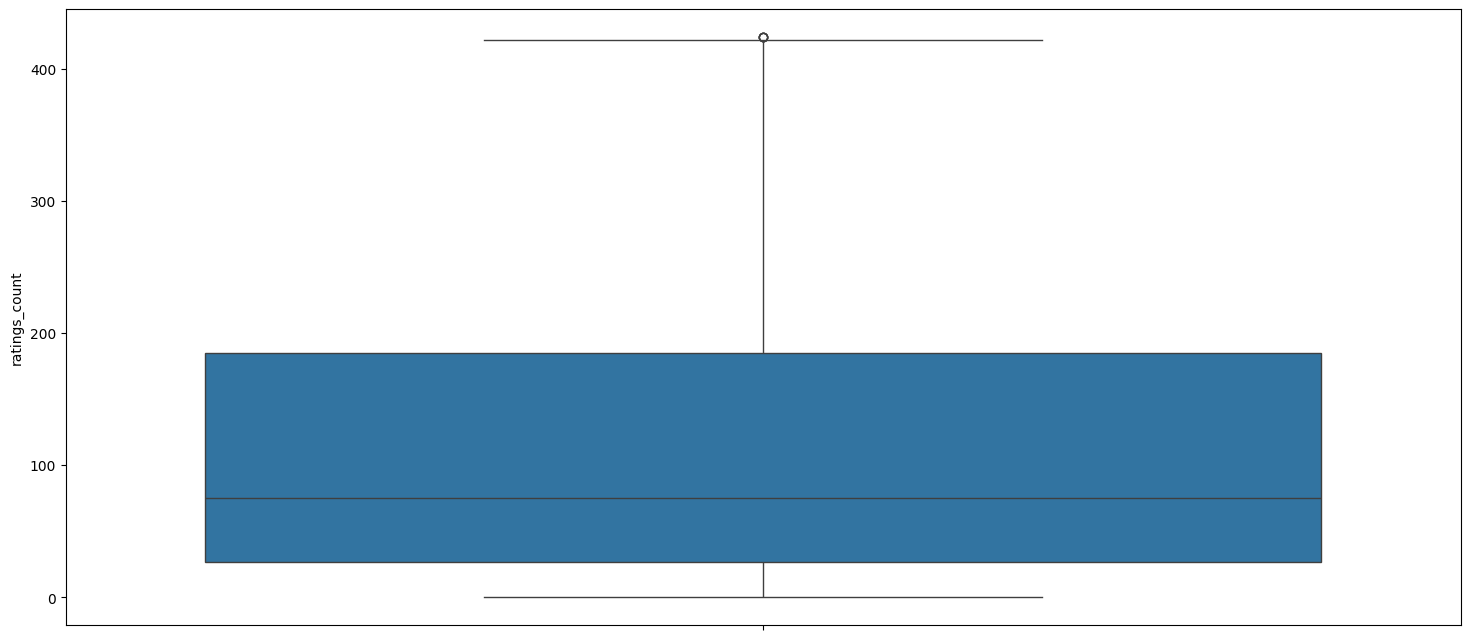

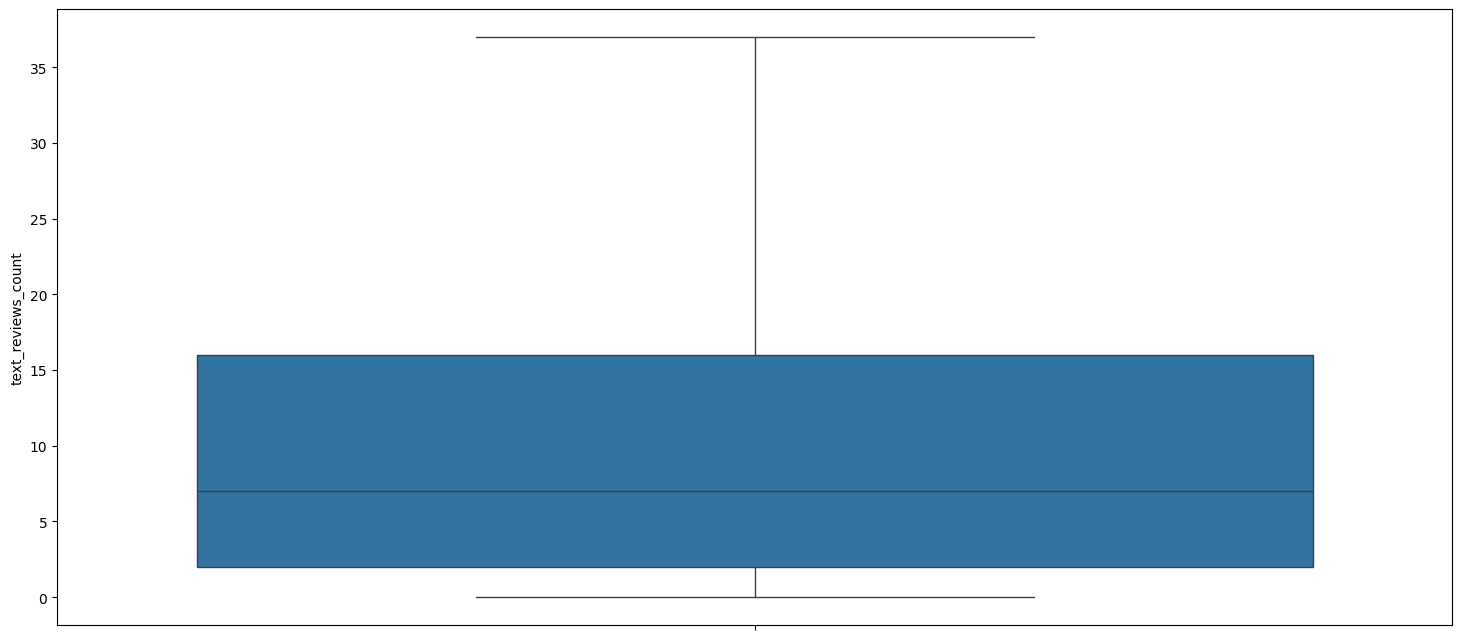

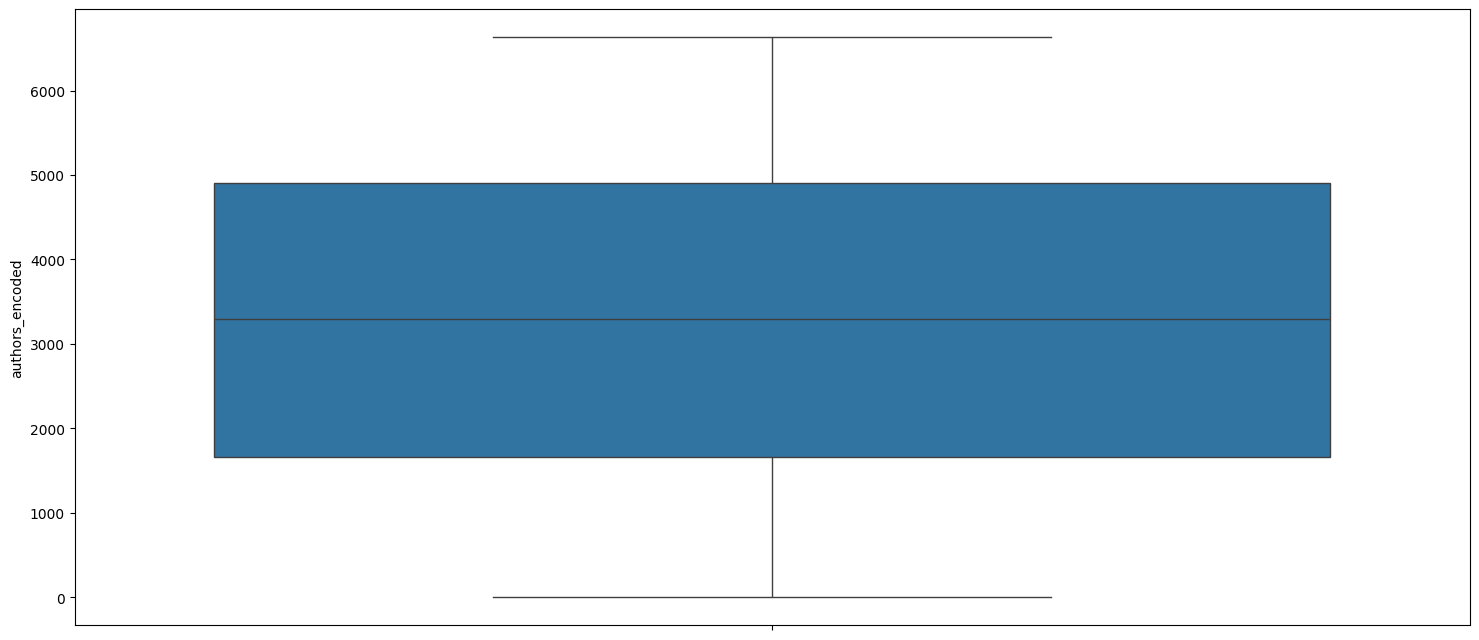

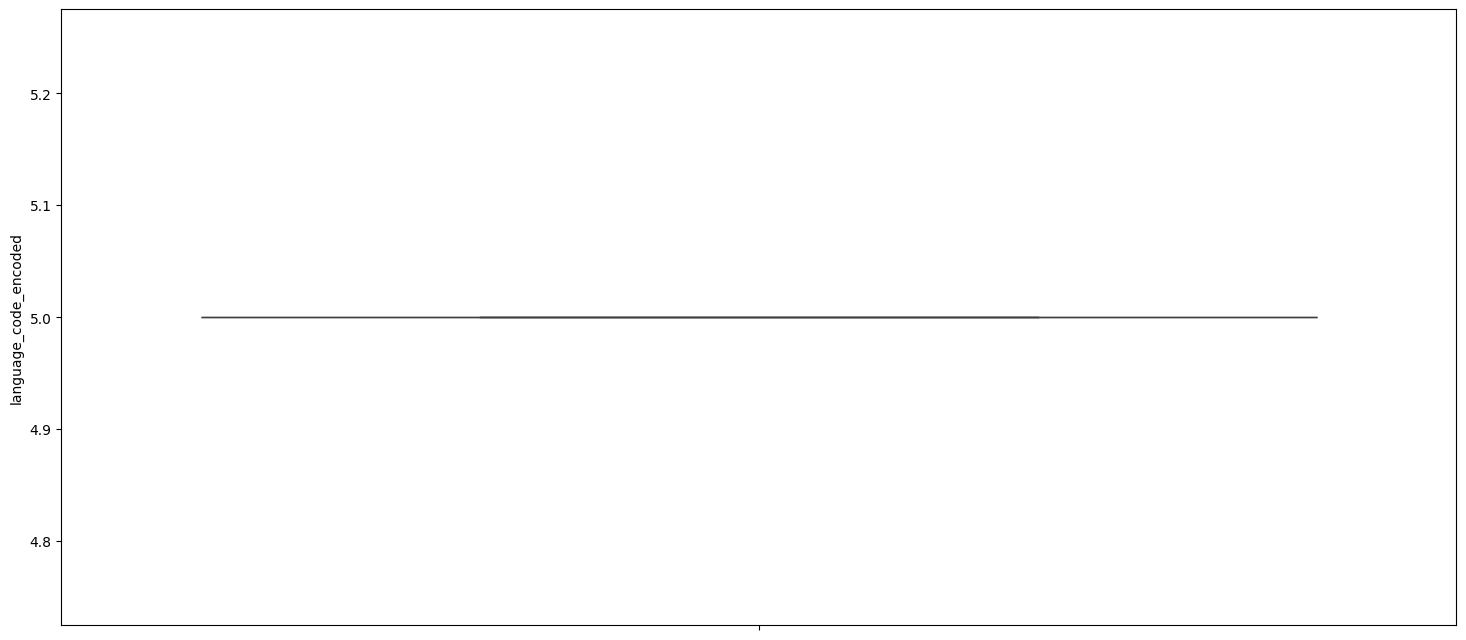

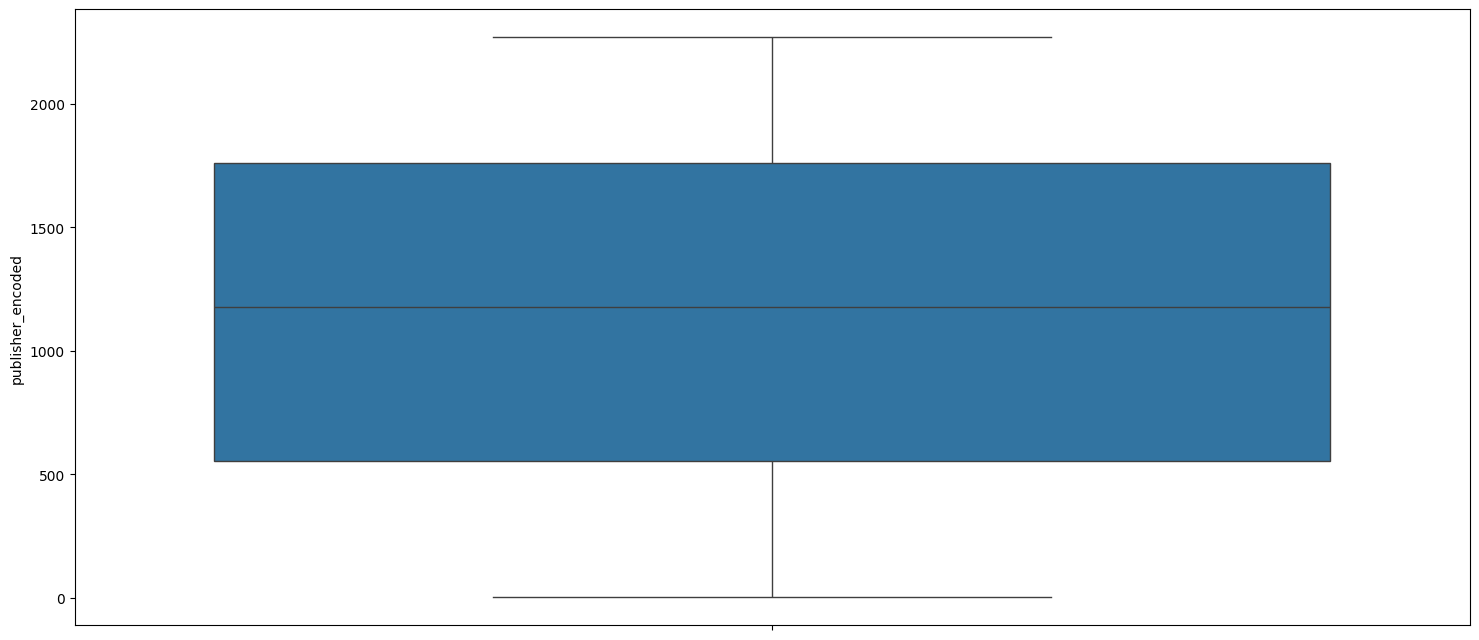

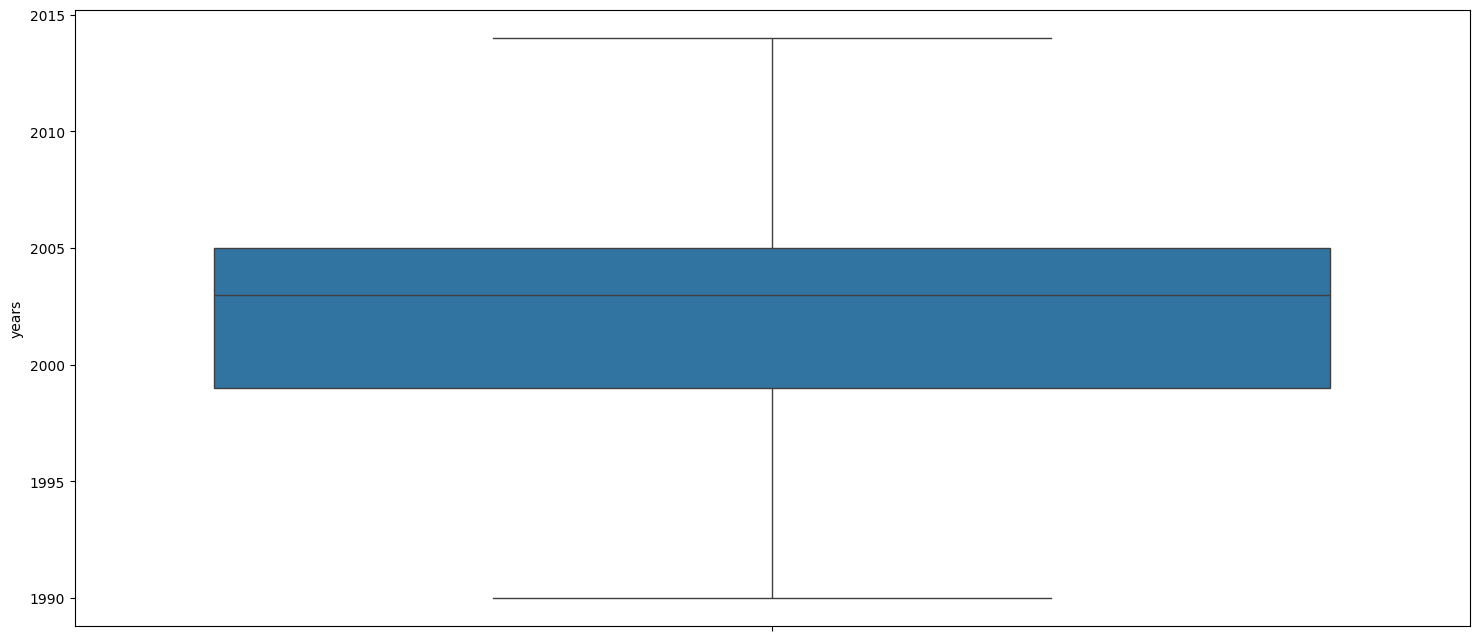

In [82]:
df7=remove_outliers(df7,['ratings_count'])
for column in df7:
    plt.figure(figsize=(18,8))
    sns.boxplot(df7[column])
    plt.show()

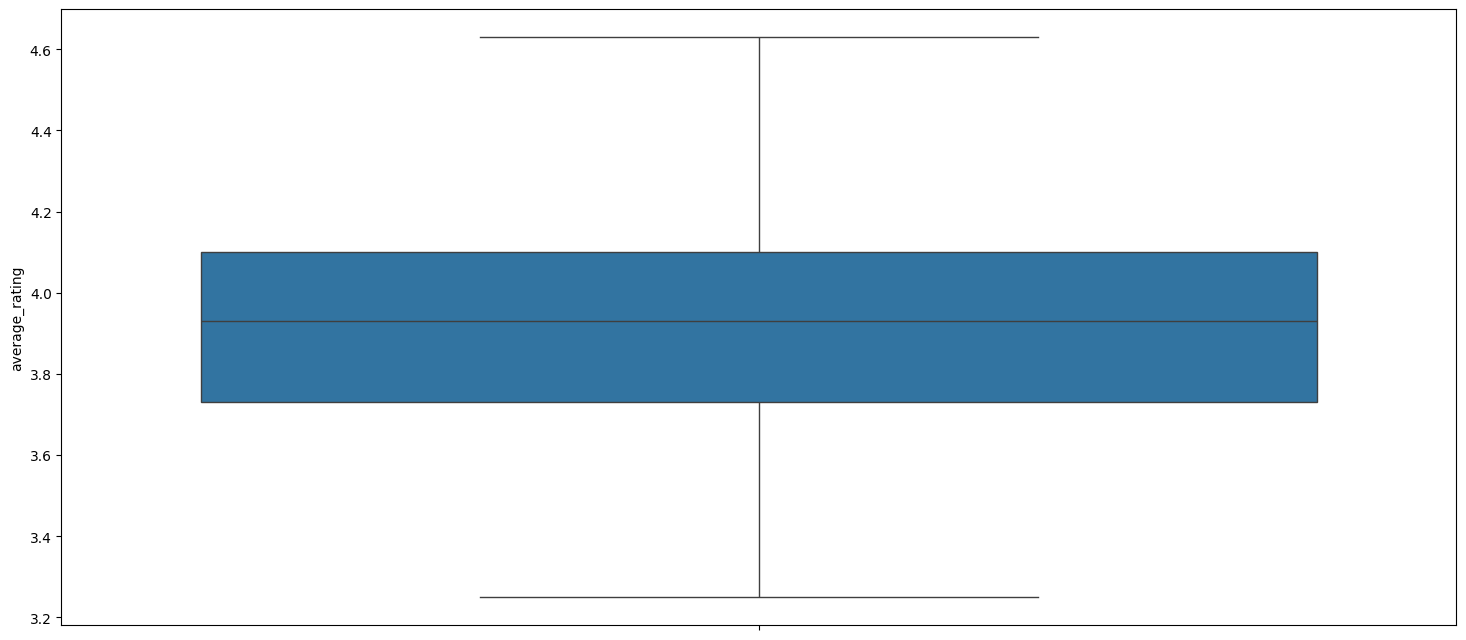

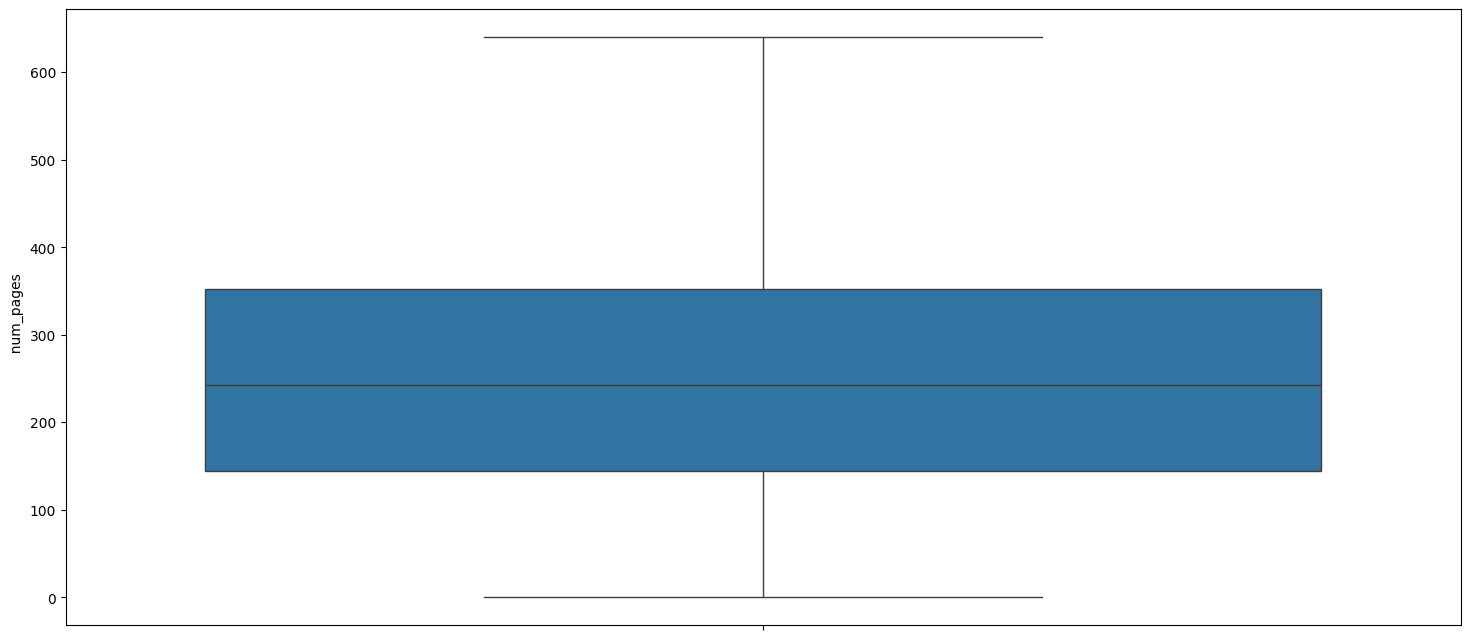

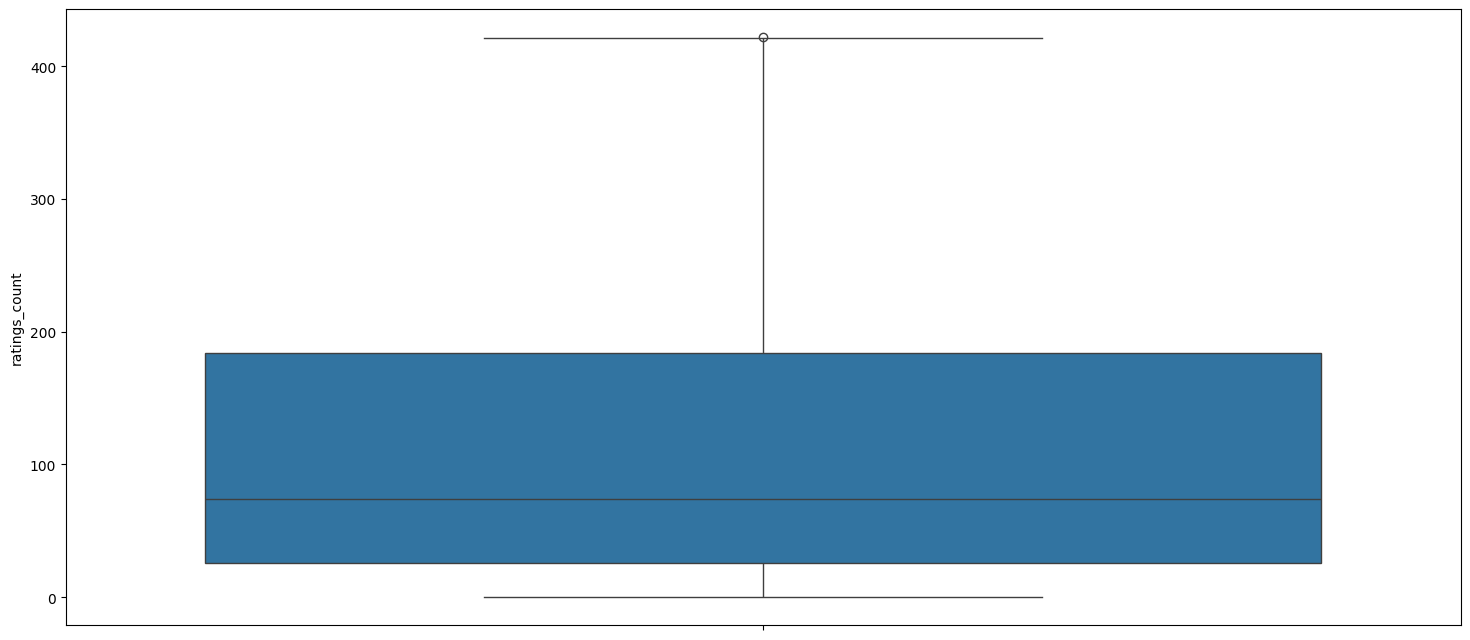

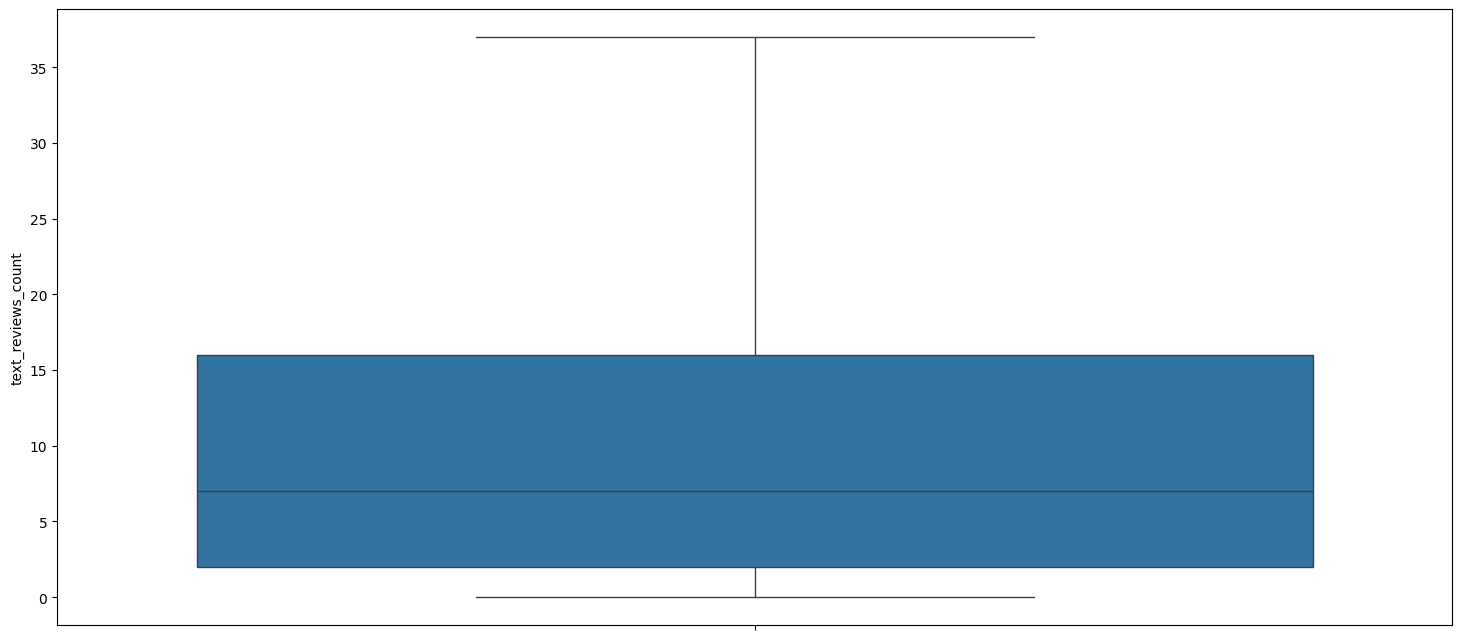

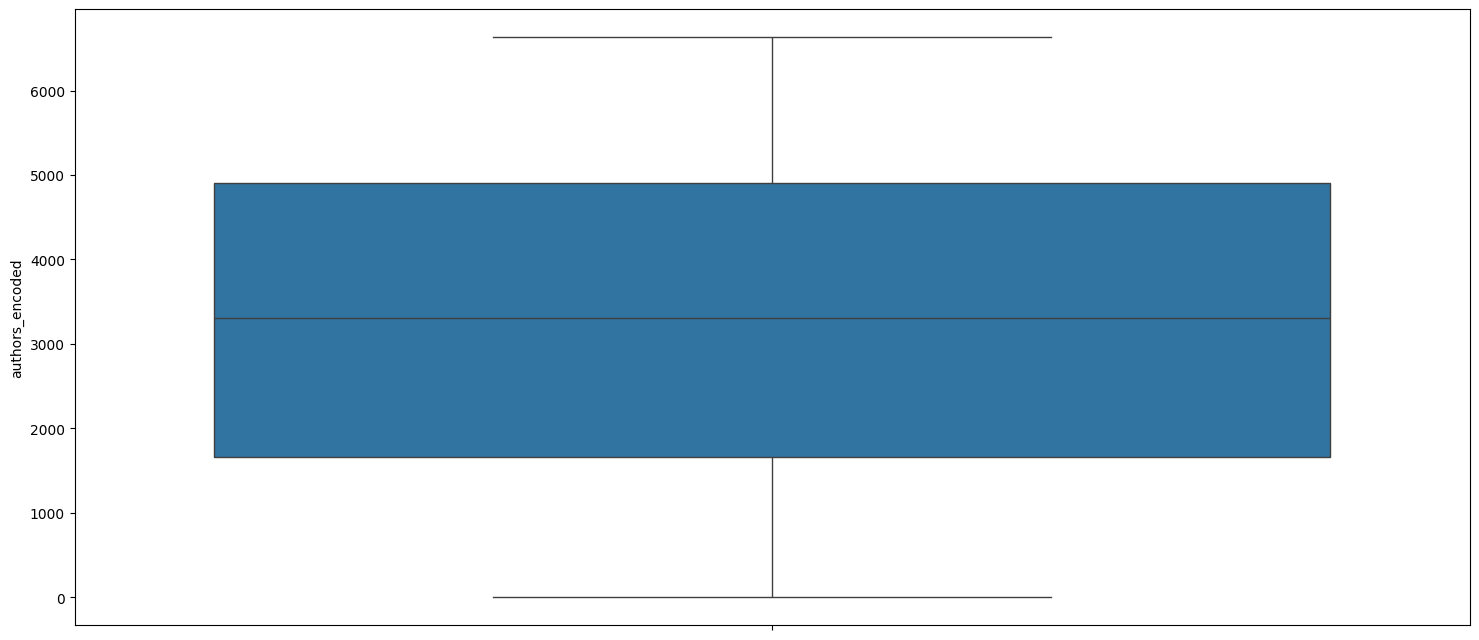

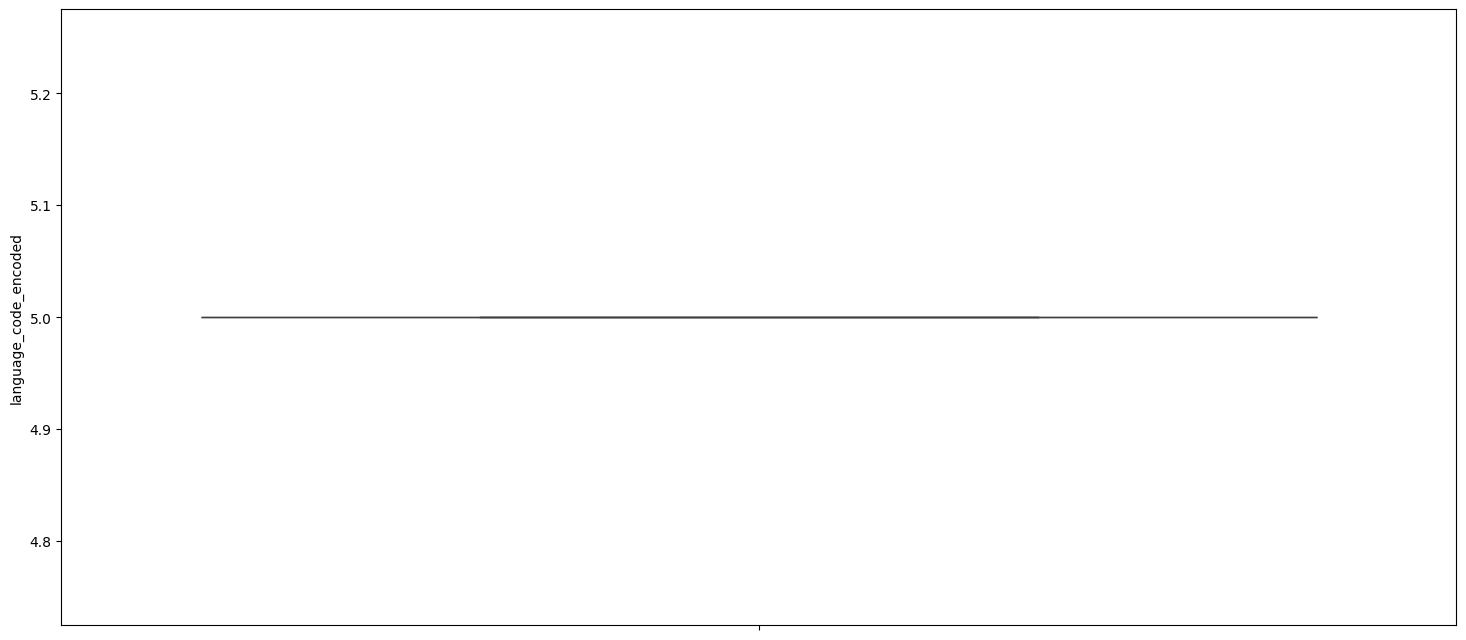

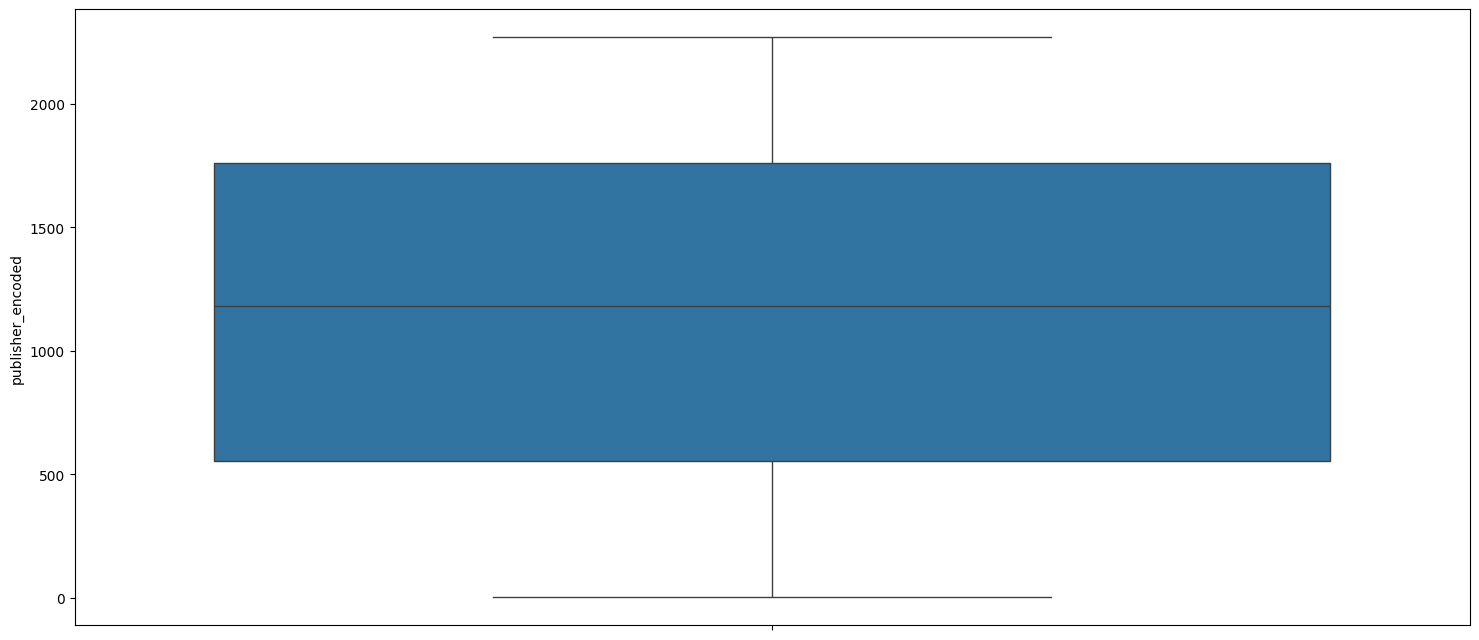

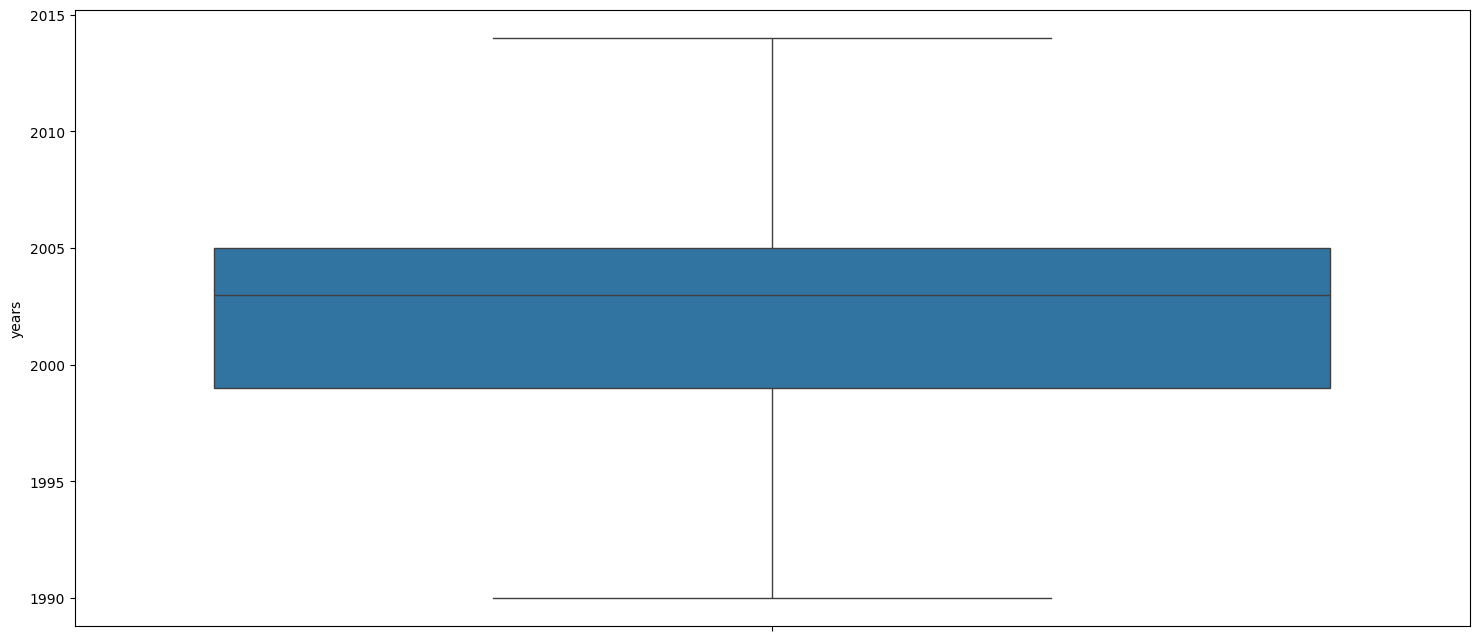

In [83]:
df7=remove_outliers(df7,['ratings_count'])
for column in df7:
    plt.figure(figsize=(18,8))
    sns.boxplot(df7[column])
    plt.show()

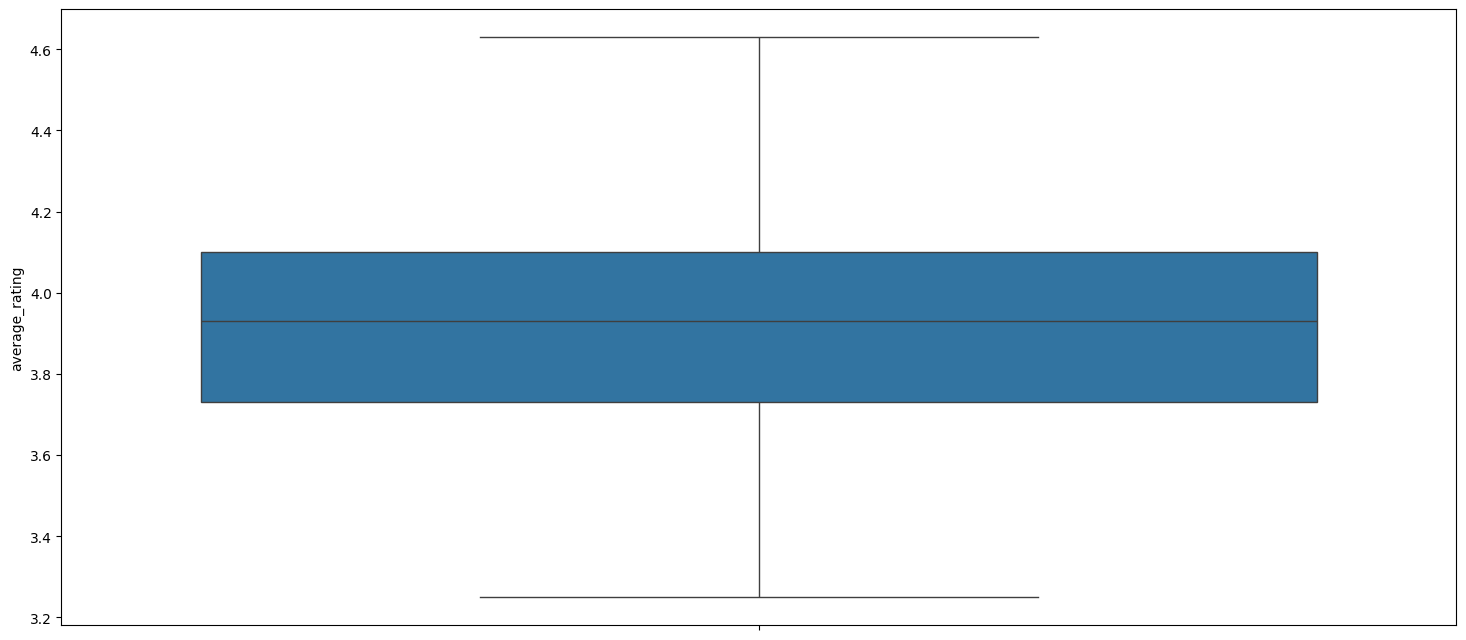

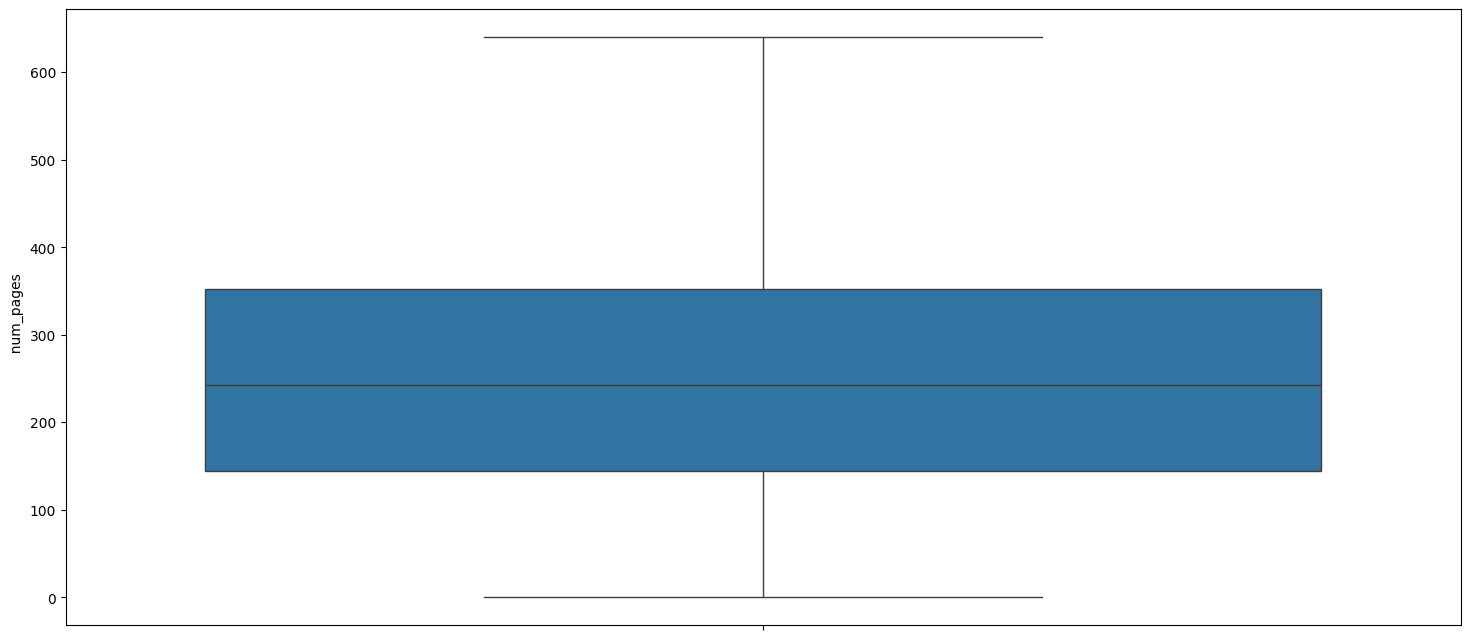

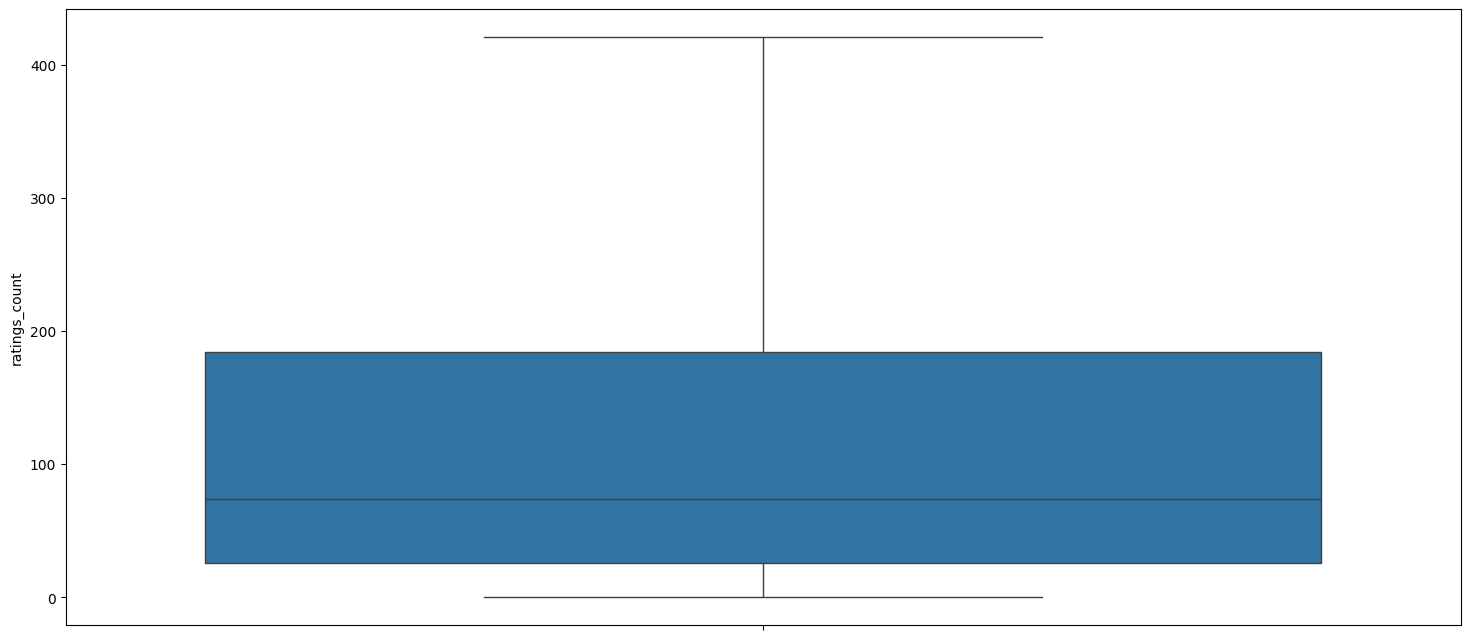

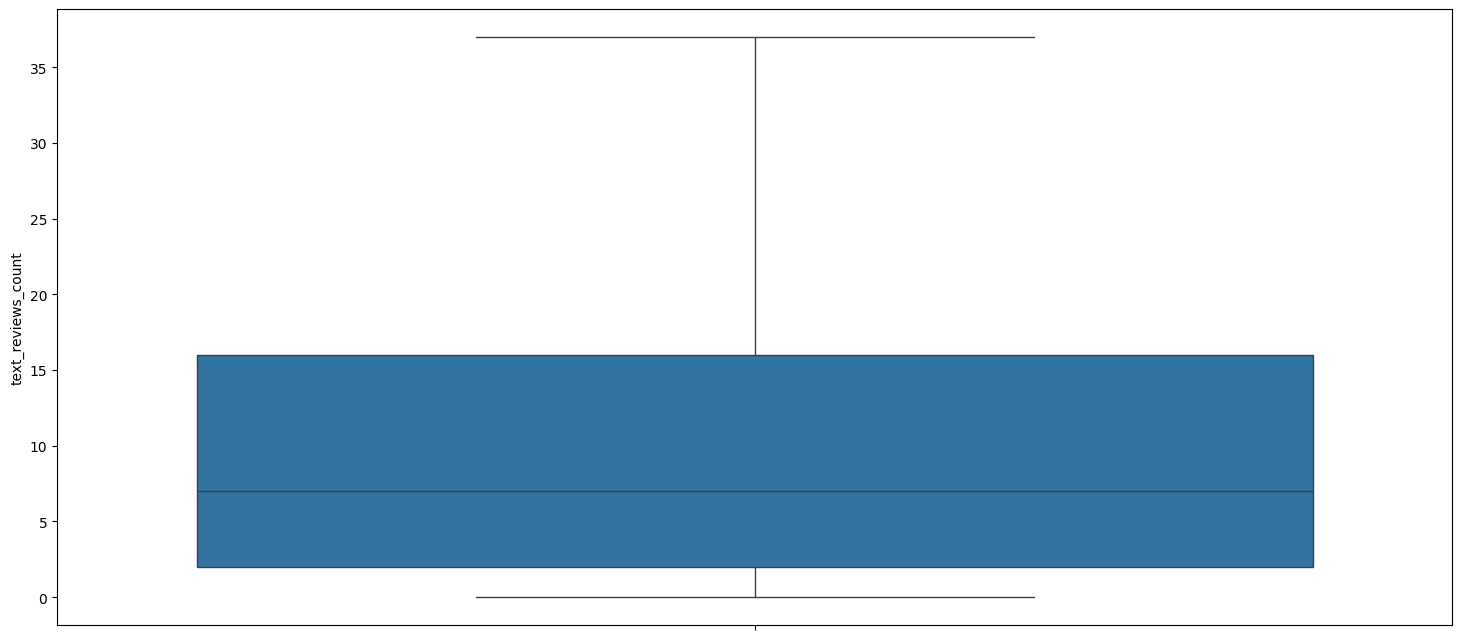

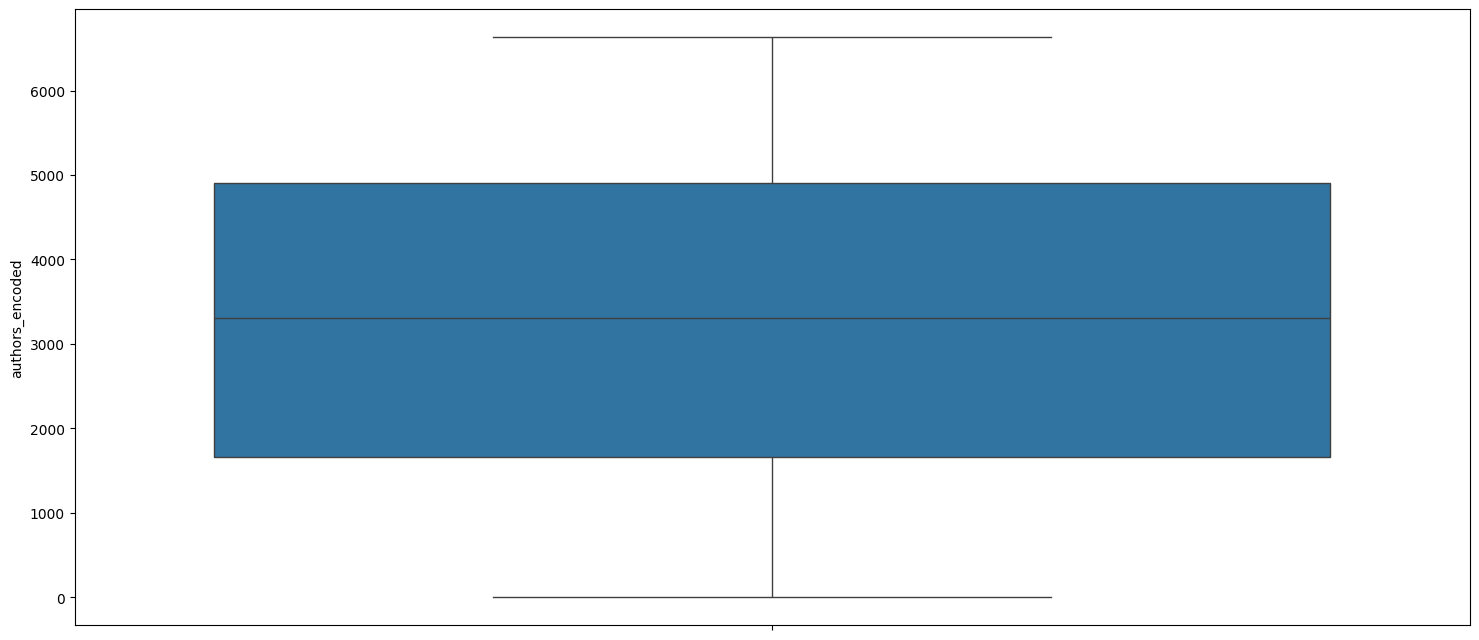

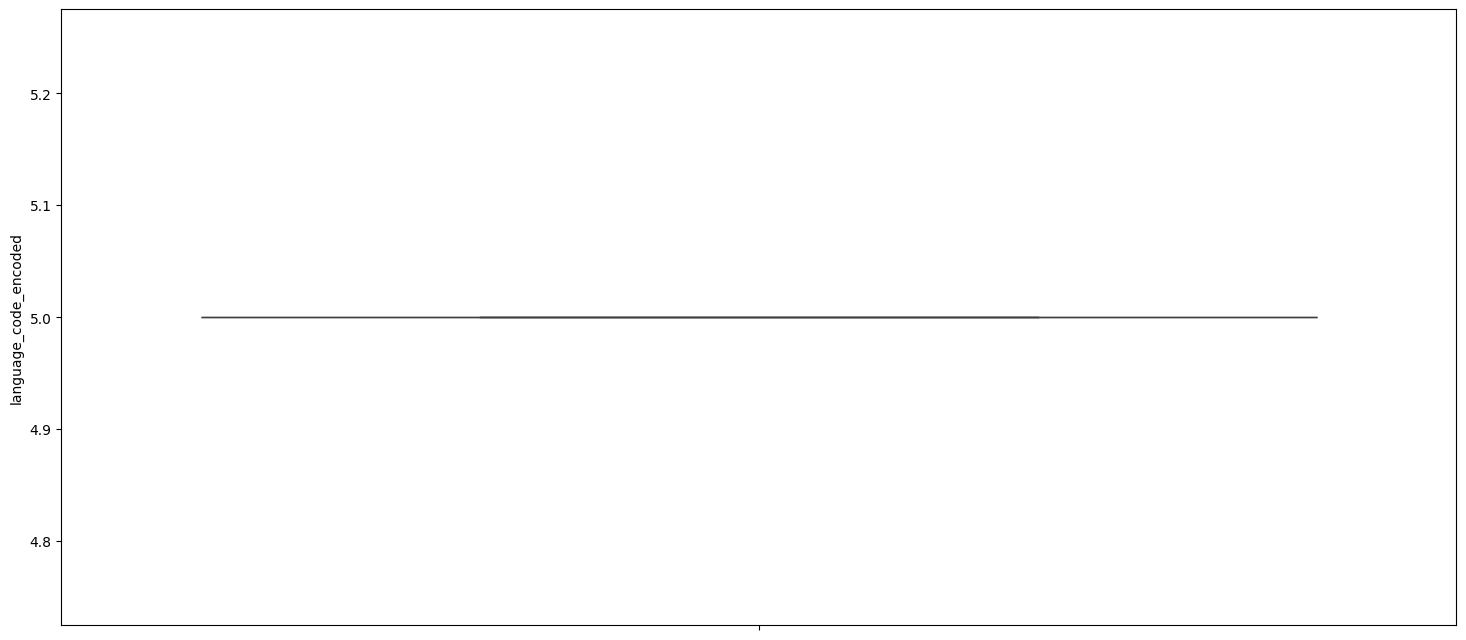

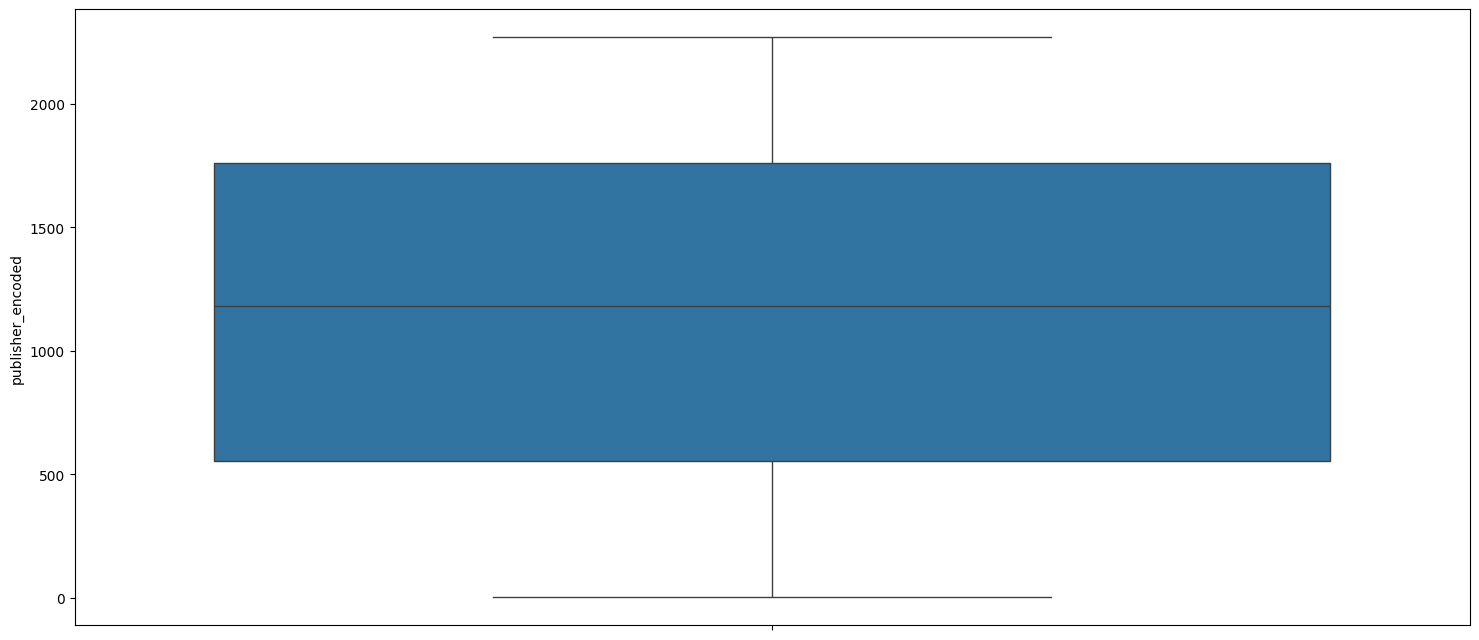

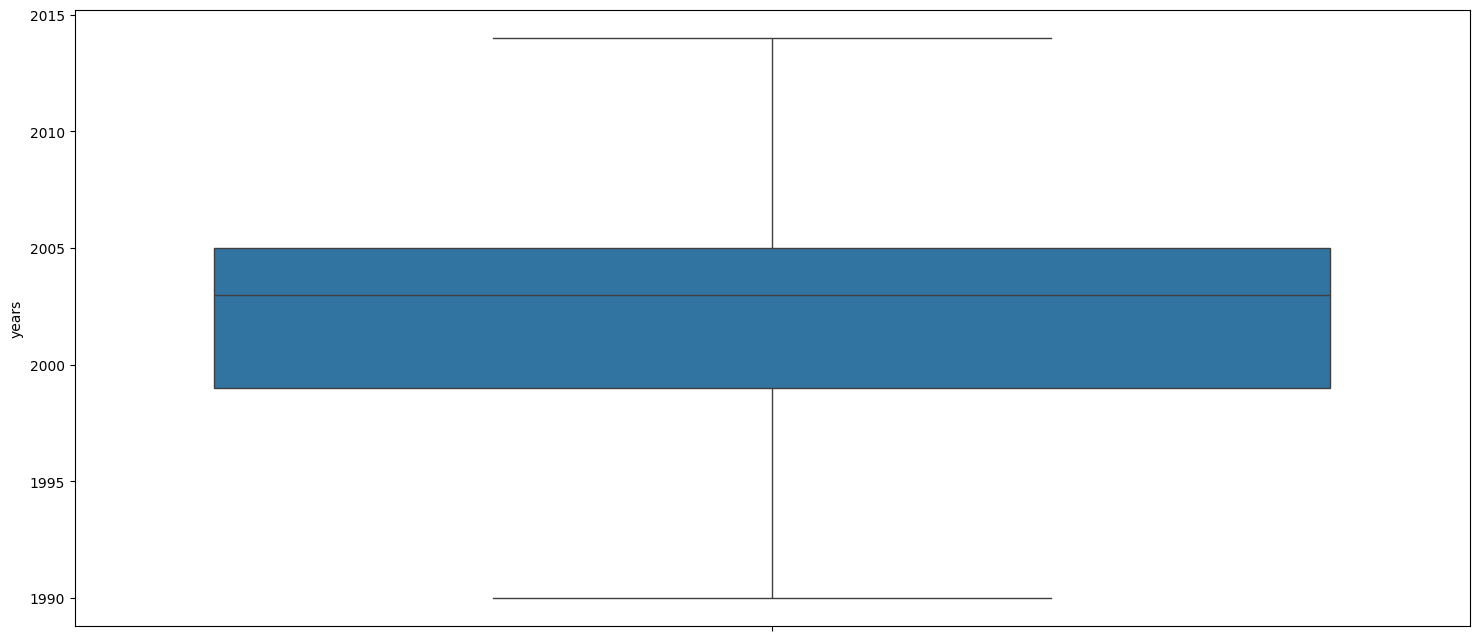

In [84]:
df7=remove_outliers(df7,['ratings_count'])
for column in df7:
    plt.figure(figsize=(18,8))
    sns.boxplot(df7[column])
    plt.show()

In [85]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2494 entries, 26 to 11118
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   average_rating         2494 non-null   float64
 1     num_pages            2494 non-null   int64  
 2   ratings_count          2494 non-null   int64  
 3   text_reviews_count     2494 non-null   int64  
 4   authors_encoded        2494 non-null   int32  
 5   language_code_encoded  2494 non-null   int32  
 6   publisher_encoded      2494 non-null   int32  
 7   years                  2494 non-null   float64
dtypes: float64(2), int32(3), int64(3)
memory usage: 146.1 KB


In [87]:
df7.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,authors_encoded,language_code_encoded,publisher_encoded,years
count,2494.000000,2494.000000,2494.000000,2494.000000,2494.00000,2494.0,2494.000000,2494.000000
mean,3.915617,253.739775,115.670008,9.931836,3294.85004,5.0,1162.643144,2001.549719
std,0.273056,150.722919,109.030931,9.578322,1895.62770,0.0,667.471669,4.529767
min,3.250000,0.000000,0.000000,0.000000,0.00000,5.0,2.000000,1990.000000
25%,3.730000,144.000000,26.000000,2.000000,1656.50000,5.0,552.250000,1999.000000
50%,3.930000,242.000000,74.000000,7.000000,3307.50000,5.0,1180.500000,2003.000000
75%,4.100000,352.000000,184.000000,16.000000,4909.75000,5.0,1759.750000,2005.000000
max,4.630000,640.000000,421.000000,37.000000,6632.00000,5.0,2270.000000,2014.000000


In [89]:
df7['authors_encoded'] = label_encoder_authors.fit_transform(df7['authors_encoded'].astype(str))

In [92]:
df7['publisher_encoded'] = label_encoder_publisher.fit_transform(df7['publisher_encoded'].astype(str))
df7.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,authors_encoded,language_code_encoded,publisher_encoded,years
count,2494.000000,2494.000000,2494.000000,2494.000000,2494.000000,2494.0,2494.000000,2494.000000
mean,3.915617,253.739775,115.670008,9.931836,1074.995589,5.0,538.912991,2001.549719
std,0.273056,150.722919,109.030931,9.578322,625.049474,0.0,294.551317,4.529767
min,3.250000,0.000000,0.000000,0.000000,0.000000,5.0,0.000000,1990.000000
25%,3.730000,144.000000,26.000000,2.000000,529.250000,5.0,286.250000,1999.000000
50%,3.930000,242.000000,74.000000,7.000000,1075.500000,5.0,546.000000,2003.000000
75%,4.100000,352.000000,184.000000,16.000000,1622.750000,5.0,793.000000,2005.000000
max,4.630000,640.000000,421.000000,37.000000,2159.000000,5.0,1055.000000,2014.000000


In [104]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2494 entries, 26 to 11118
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   average_rating         2494 non-null   float64
 1     num_pages            2494 non-null   int64  
 2   ratings_count          2494 non-null   int64  
 3   text_reviews_count     2494 non-null   int64  
 4   authors_encoded        2494 non-null   int32  
 5   language_code_encoded  2494 non-null   int32  
 6   publisher_encoded      2494 non-null   int32  
 7   years                  2494 non-null   float64
dtypes: float64(2), int32(3), int64(3)
memory usage: 146.1 KB


In [108]:
df8=df7.copy()
# Define the threshold values
thresholds = {
    'average_rating': 3.730000,
    'num_pages': 144.000000,
    'ratings_count': 26.000000,
    'text_reviews_count': 9.931836,
}

# Apply the thresholds to create the 'bestseller' column
df8['bestseller'] = (
    (df7['average_rating'] >= thresholds['average_rating']) &
    (df7['  num_pages'] >= thresholds['num_pages']) &
    (df7['ratings_count'] >= thresholds['ratings_count']) &
    (df7['text_reviews_count'] >= thresholds['text_reviews_count'])).astype(int)


In [110]:
df8[df8['bestseller']==0].count()

average_rating           1895
  num_pages              1895
ratings_count            1895
text_reviews_count       1895
authors_encoded          1895
language_code_encoded    1895
publisher_encoded        1895
years                    1895
bestseller               1895
dtype: int64

In [112]:
df8.head()

,average_rating,num_pages,ratings_count,text_reviews_count,authors_encoded,language_code_encoded,publisher_encoded,years,bestseller
26,4.50,224,359,6,866,5,1053,2004.0,0
29,4.00,48,36,2,190,5,476,1994.0,0
31,4.33,56,6,0,1290,5,741,2003.0,0
33,3.76,304,167,4,798,5,731,2005.0,0
38,3.98,369,345,12,1462,5,24,1990.0,1


In [113]:
df8.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,authors_encoded,language_code_encoded,publisher_encoded,years,bestseller
count,2494.000000,2494.000000,2494.000000,2494.000000,2494.000000,2494.0,2494.000000,2494.000000,2494.000000
mean,3.915617,253.739775,115.670008,9.931836,1074.995589,5.0,538.912991,2001.549719,0.240176
std,0.273056,150.722919,109.030931,9.578322,625.049474,0.0,294.551317,4.529767,0.427276
min,3.250000,0.000000,0.000000,0.000000,0.000000,5.0,0.000000,1990.000000,0.000000
25%,3.730000,144.000000,26.000000,2.000000,529.250000,5.0,286.250000,1999.000000,0.000000
50%,3.930000,242.000000,74.000000,7.000000,1075.500000,5.0,546.000000,2003.000000,0.000000
75%,4.100000,352.000000,184.000000,16.000000,1622.750000,5.0,793.000000,2005.000000,0.000000
max,4.630000,640.000000,421.000000,37.000000,2159.000000,5.0,1055.000000,2014.000000,1.000000


In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [126]:
X = df8[['average_rating', '  num_pages', 'ratings_count', 'text_reviews_count',
        'authors_encoded', 'language_code_encoded', 'publisher_encoded', 'years']]
y = df8['bestseller']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [127]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8577154308617234
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       376
           1       0.75      0.64      0.69       123

    accuracy                           0.86       499
   macro avg       0.82      0.79      0.80       499
weighted avg       0.85      0.86      0.85       499



In [128]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       376
           1       0.75      0.64      0.69       123

    accuracy                           0.86       499
   macro avg       0.82      0.79      0.80       499
weighted avg       0.85      0.86      0.85       499



In [131]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose a different value for n_neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9278557114228457
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       376
           1       0.87      0.84      0.85       123

    accuracy                           0.93       499
   macro avg       0.91      0.90      0.90       499
weighted avg       0.93      0.93      0.93       499



In [132]:
import pickle

In [133]:
with open('knn_books.pkl','wb') as f:
    pickle.dump(knn,f)